# Q1: Find out the normal price change for each raw material

# Q2: Find the raw-material that has lowest price over years

# Q3: which raw material has the highest and lowest price % change

# Q4: Find the raw materials with drastic price change

# Q5: Figure out the price range of low priced raw-materials


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("agricultural_raw_material.csv")
df_droped_na = pd.read_csv("agricultural_raw_material.csv")
df_i = pd.read_csv("united-states.inflation.monthly (statbureau.org).csv")
df_sp500 = pd.read_csv("S&P 500 Historical Data.csv")
df_urea = pd.read_csv("ODA-PUREA_USD.csv")
df_gas = pd.read_csv("Natural Gas Futures Historical Data.csv")

In [3]:
gas_price = []
change_gas_price = []

for i in range(len(df_gas)):
    gas_price.append(df_gas['Price'][i])
    
for i in range(len(df_gas)-1):
    change_gas_price.append(float(round(df_gas['Price'][i] / df_gas['Price'][i+1] * 100 - 100, 2)))
    
    
gas_price.append(1.59)
change_gas_price.append(1.60)
change_gas_price.append(1.60)

gas_price = gas_price[::-1]
df['Gas'] = gas_price
df_droped_na['Gas'] = gas_price

change_gas_price = change_gas_price[::-1]
df['Change gas price'] = change_gas_price
df_droped_na['Change gas price'] = change_gas_price

In [4]:
change_urea_price = []

for i in range(len(df_urea)-1):
    change_urea_price.append(float(round(df_urea['Value'][i] / df_urea['Value'][i+1] * 100 - 100, 2)))

df_urea = df_urea[35:396]
df_urea = df_urea.reset_index().drop(columns=['index'])

urea_price = []


for i in range(len(df_urea)):
    urea_price.append(df_urea['Value'][i])
    

urea_price = urea_price[::-1]
df['Urea'] = urea_price
df_droped_na['Urea'] = urea_price

change_urea_price = change_urea_price[35:396]
change_urea_price = change_urea_price[::-1]
df['Change urea price'] = change_urea_price
df_droped_na['Change urea price'] = change_urea_price

In [5]:
df_i = df_i[77:108]
df_i = df_i.reset_index().drop(columns=['index'])

months = [' Январь', ' Февраль', ' Март', ' Апрель', ' Май', ' Июнь',
       ' Июль', ' Август', ' Сентябрь', ' Октябрь', ' Ноябрь', ' Декабрь']

inflations = []

for i in range(len(df_i[months])):
    for month in months:
        inflations.append(df_i[month][i])

inflations = inflations[3:]
inflations = inflations[:-8]
df['inflations'] = inflations
df_droped_na['inflations'] = inflations

In [6]:
df_sp500 = df_sp500.replace(',', '', regex=True)
df_sp500['Price'] = df_sp500['Price'].astype("float")

sp500_price = []

for i in range(len(df_sp500['Price'])):
    sp500_price.append(df_sp500['Price'][i])
    
sp500_price = sp500_price[::-1]
df['S&P500'] = sp500_price
df_droped_na['S&P500'] = sp500_price

In [7]:
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)

prices = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
       'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

df[prices] = df[prices].astype("float")

for price in prices:
    for i in range(len(df[price])):
        if np.isnan(df[price][i]):
            df[price][i] = df[price][i-1]

changes = ['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change',
       'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 
       'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']

dictionary = dict(zip(prices, changes))

for prices, changes in dictionary.items():
    for i in range(len(df)-1):
        df[changes][i+1] = float(round(df[prices][i+1] / df[prices][i] * 100 - 100, 2))

df = df.replace('', np.nan)
df = df.dropna()
df[changes] = df[changes].astype("float")

C:\Users\User\AppData\Local\Temp\ipykernel_8672\2853636657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[price][i] = df[price][i-1]
C:\Users\User\AppData\Local\Temp\ipykernel_8672\2853636657.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[changes][i+1] = float(round(df[prices][i+1] / df[prices][i] * 100 - 100, 2))


In [8]:
df_droped_na = df_droped_na.replace(',', '', regex=True)

prices = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
       'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

changes = ['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change',
       'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 
       'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']

dictionary = dict(zip(prices, changes))

df_droped_na[prices] = df_droped_na[prices].astype("float")

for prices, changes in dictionary.items():
    for i in range(len(df_droped_na)-1):
         df_droped_na[changes][i+1] = float(round(df_droped_na[prices][i+1] / df_droped_na[prices][i] * 100 - 100, 2))

df_droped_na = df_droped_na[1:]
df_droped_na[changes] = df_droped_na[changes].astype("float")

df_droped_na = df_droped_na.replace('-', '', regex=True)
df_droped_na = df_droped_na.replace('%', '', regex=True)
df_droped_na = df_droped_na.replace('', np.nan)
df_droped_na = df_droped_na.replace('MAY90', np.nan)
df_droped_na = df_droped_na.dropna()



C:\Users\User\AppData\Local\Temp\ipykernel_8672\2886968727.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_droped_na[changes][i+1] = float(round(df_droped_na[prices][i+1] / df_droped_na[prices][i] * 100 - 100, 2))


In [9]:
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
Gas                             0
Change gas price                0
Urea                            0
Change urea price               0
inflations    

In [10]:
df_droped_na.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
Gas                             0
Change gas price                0
Urea                            0
Change urea price               0
inflations    

In [11]:
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [12]:
df_droped_na.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [13]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df = df.set_index('Month')

In [14]:
df_droped_na.Month  = pd.to_datetime(df_droped_na.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df_droped_na = df_droped_na.set_index('Month')

## Q1

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

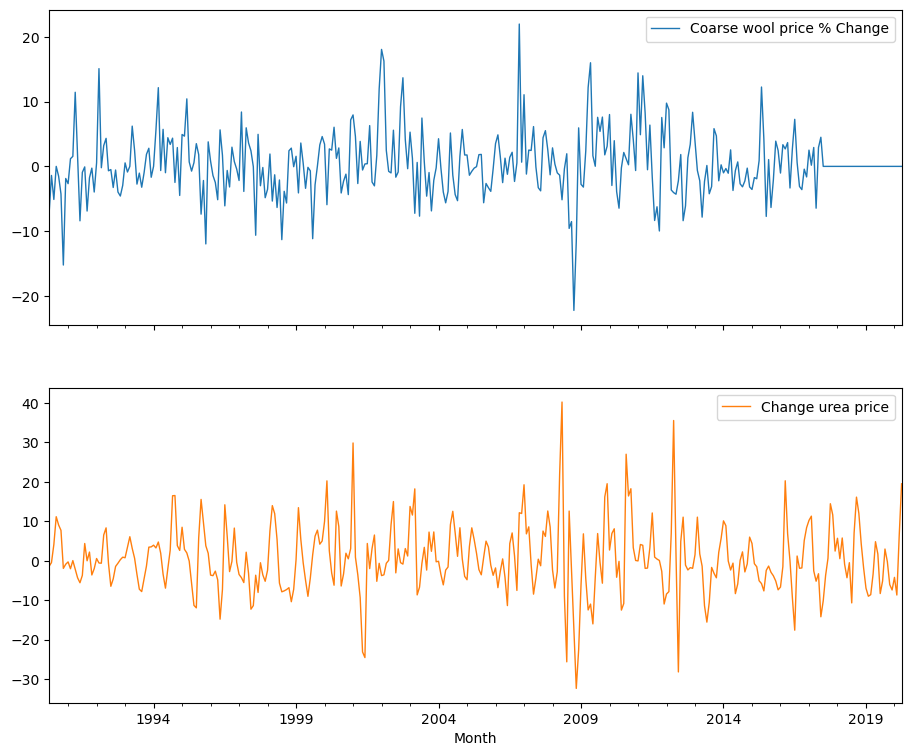

In [15]:
df[['Coarse wool price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

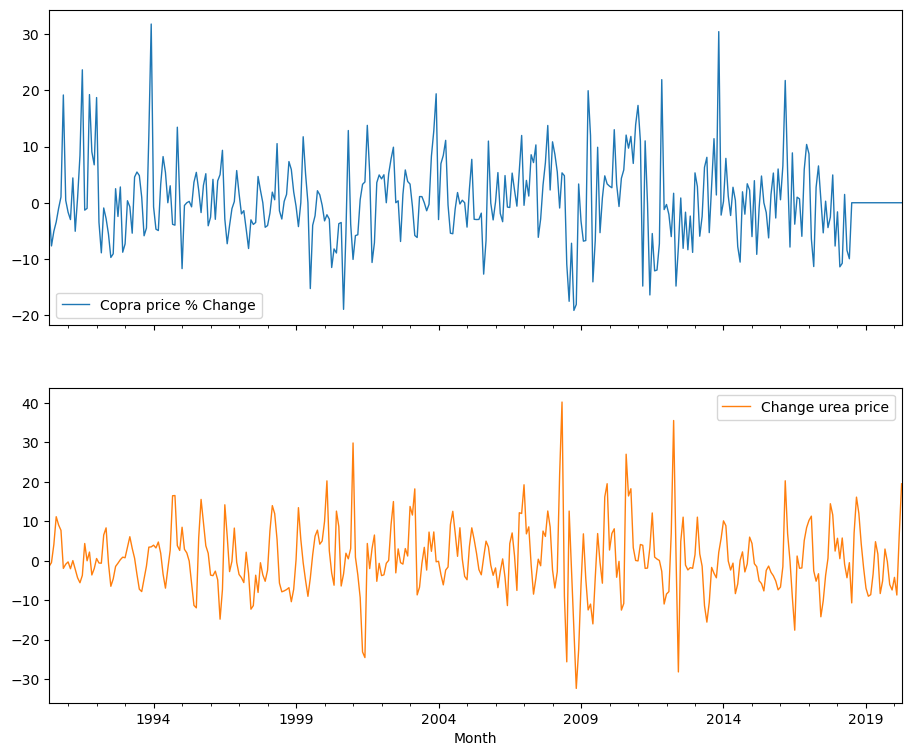

In [16]:
df[["Copra price % Change", 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

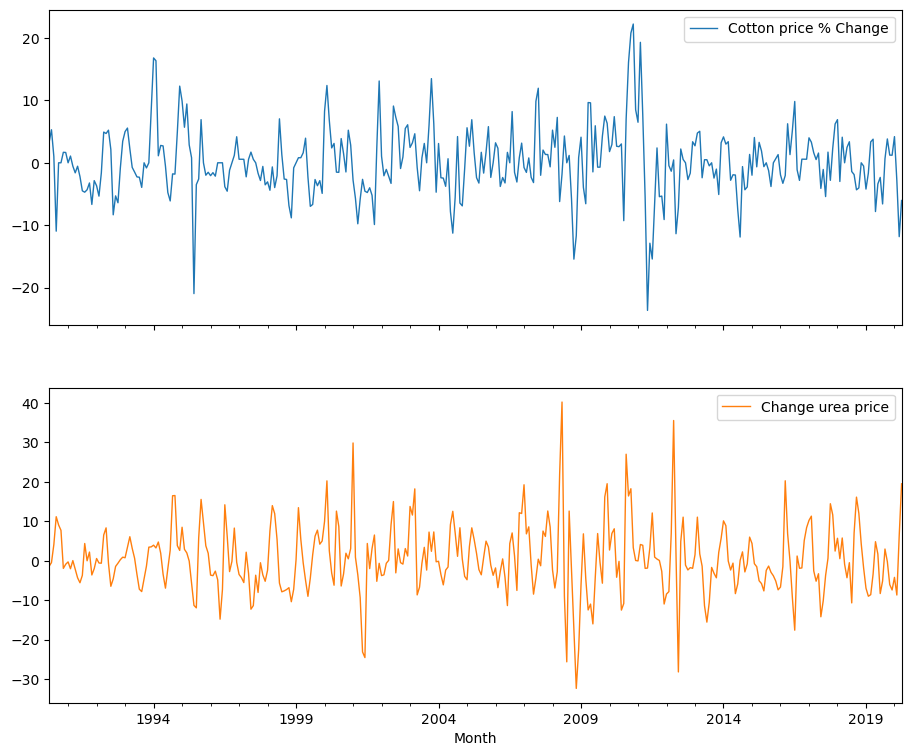

In [17]:
df[['Cotton price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

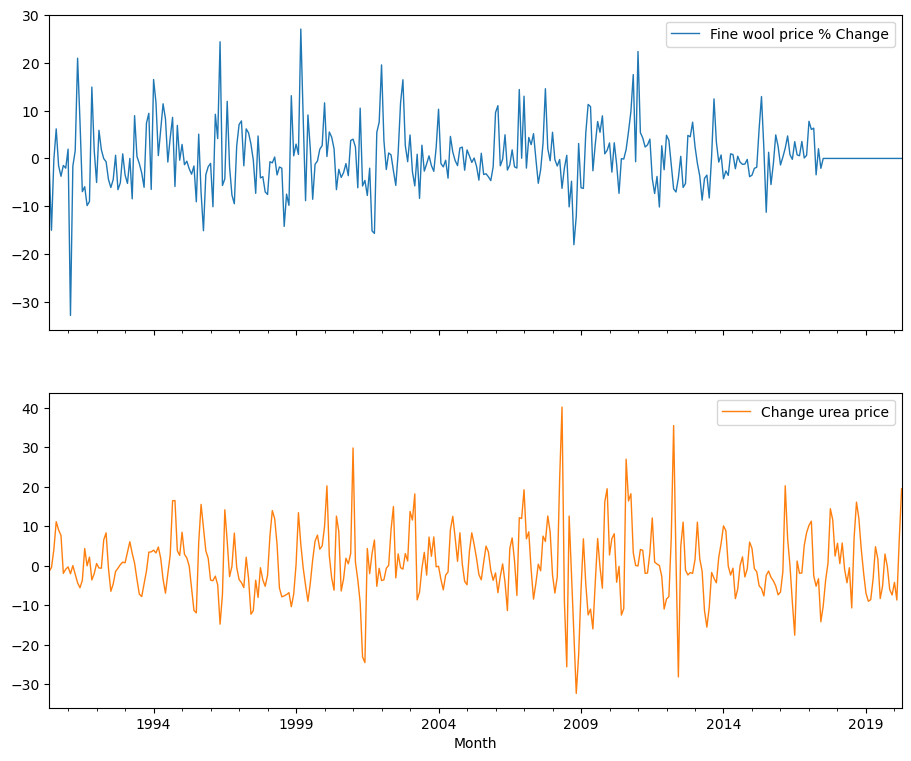

In [18]:
df[['Fine wool price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

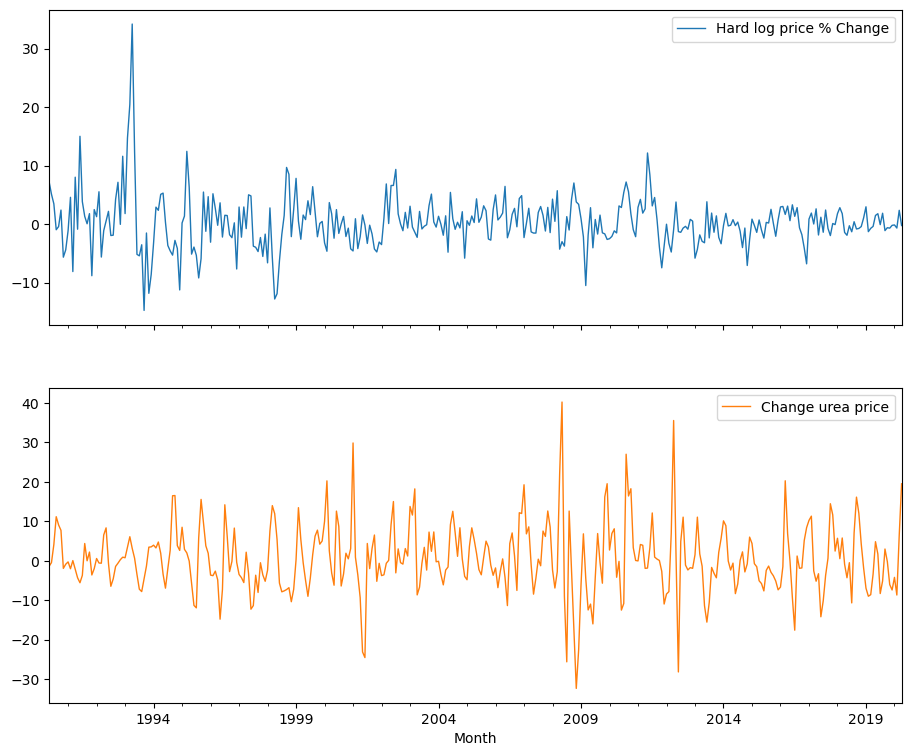

In [19]:
df[['Hard log price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

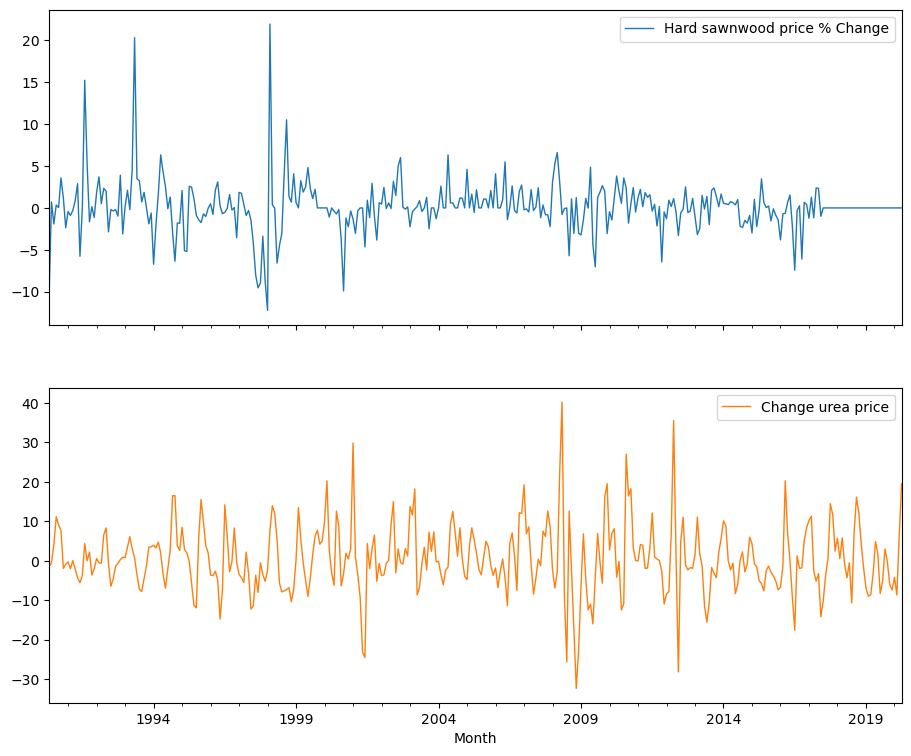

In [20]:
df[['Hard sawnwood price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

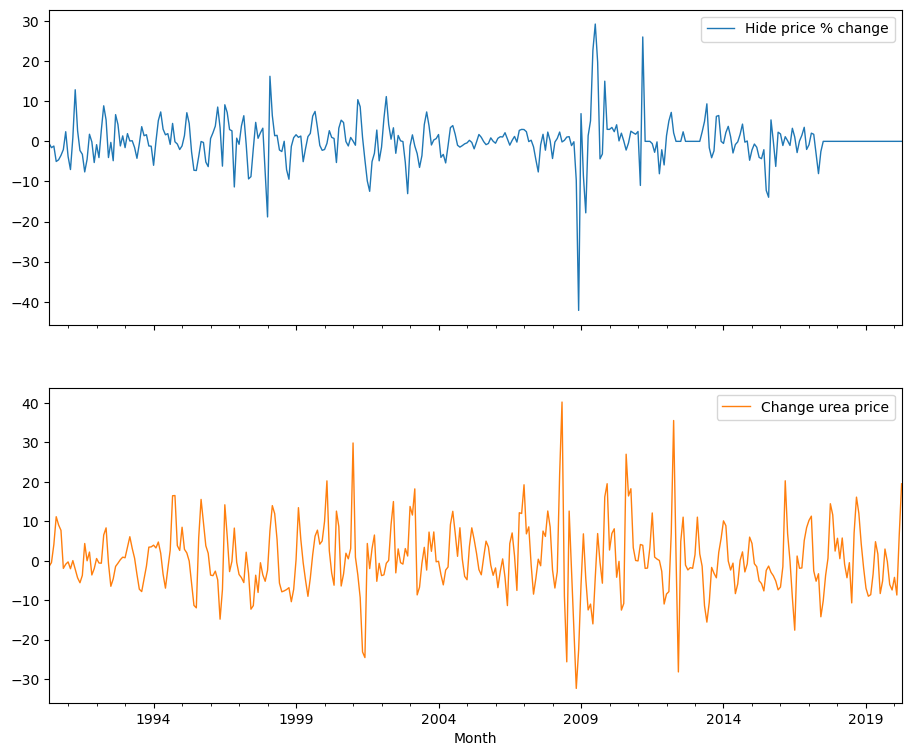

In [21]:
df[['Hide price % change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

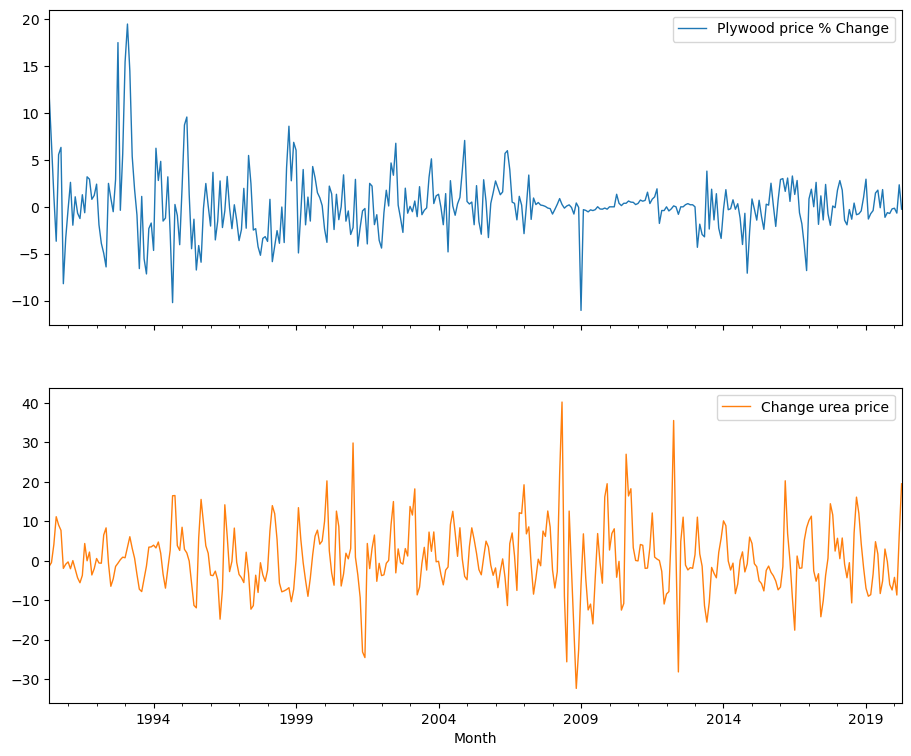

In [22]:
df[['Plywood price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

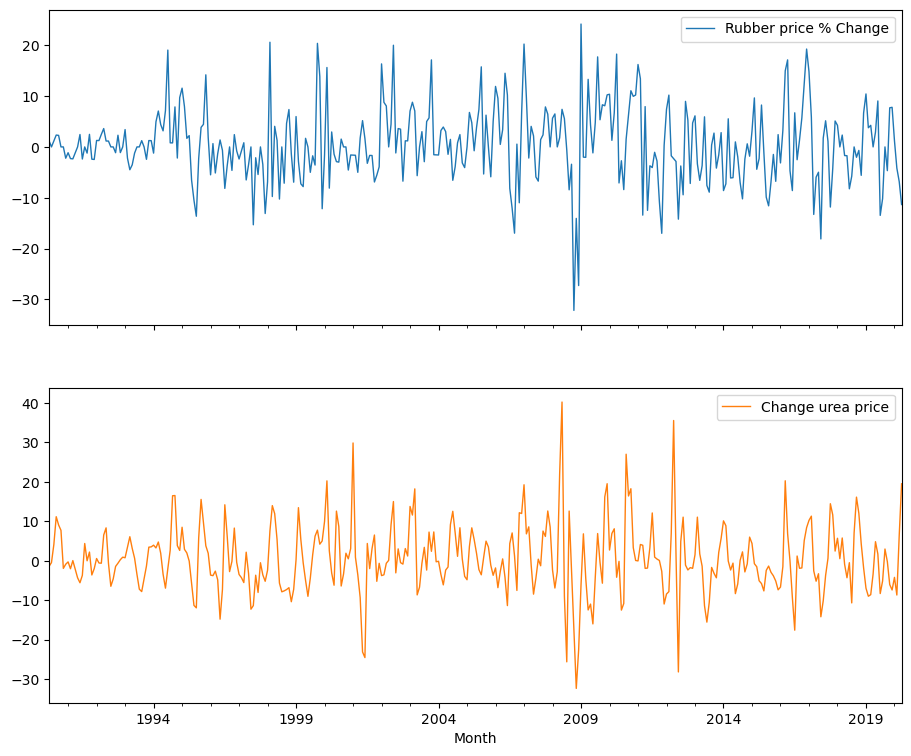

In [23]:
df[['Rubber price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

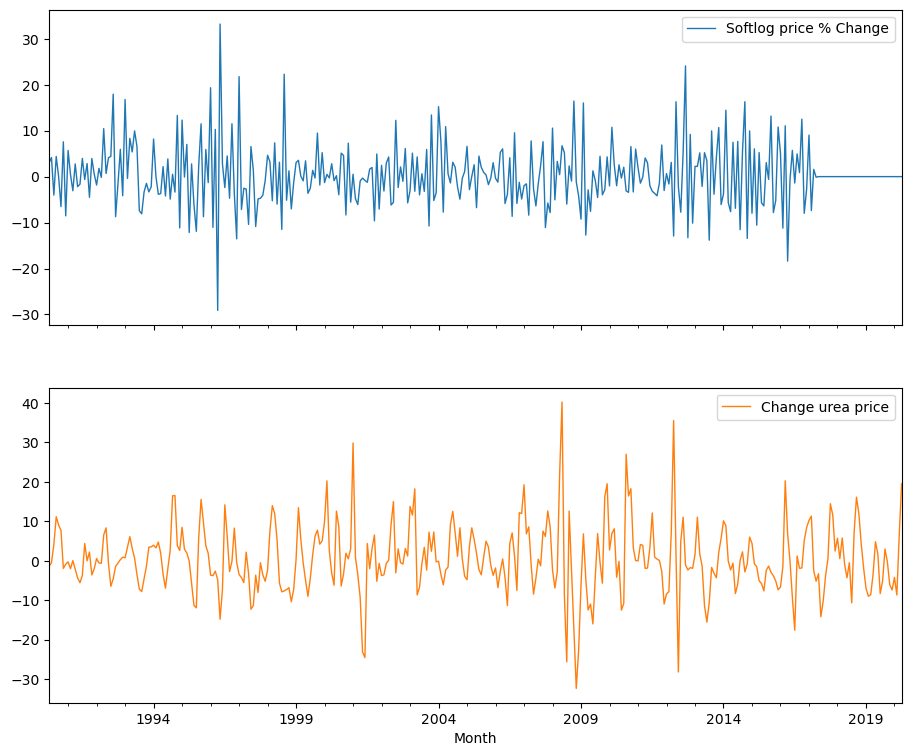

In [24]:
df[['Softlog price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

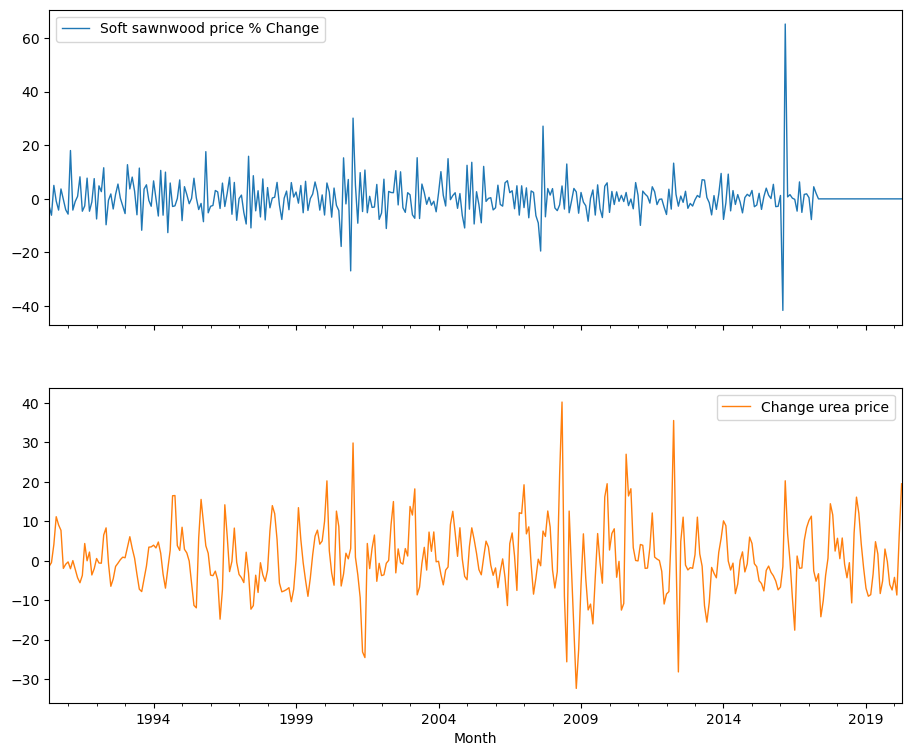

In [25]:
df[['Soft sawnwood price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

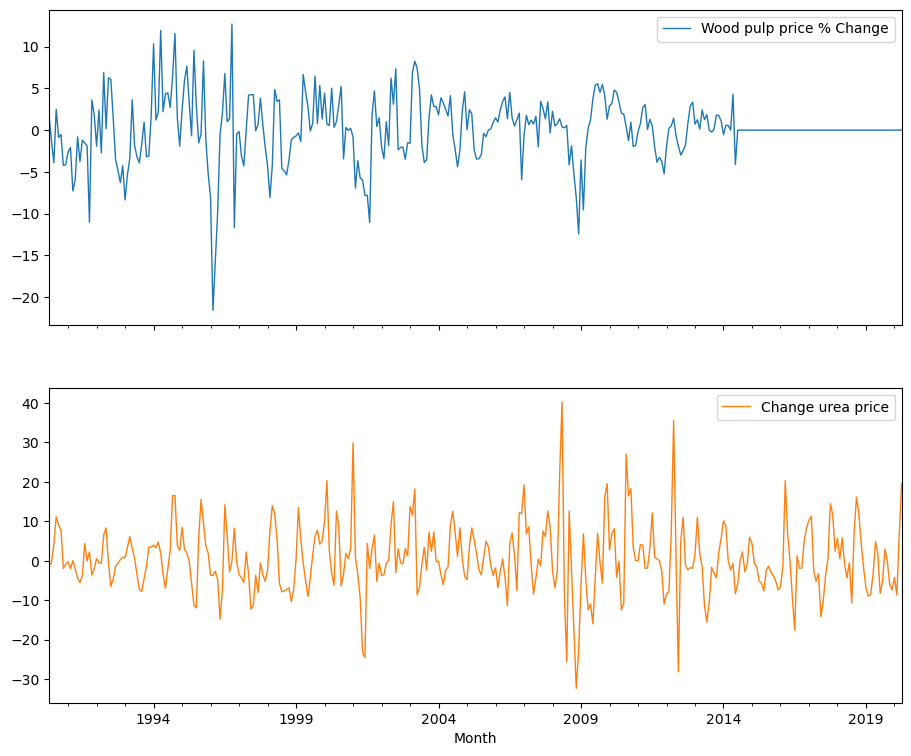

In [26]:
df[['Wood pulp price % Change', 'Change urea price']].plot(figsize=(11, 9), subplots=True, linewidth=1)

##  Посмотрим коррелляцию с S&P500

<Axes: xlabel='Month'>

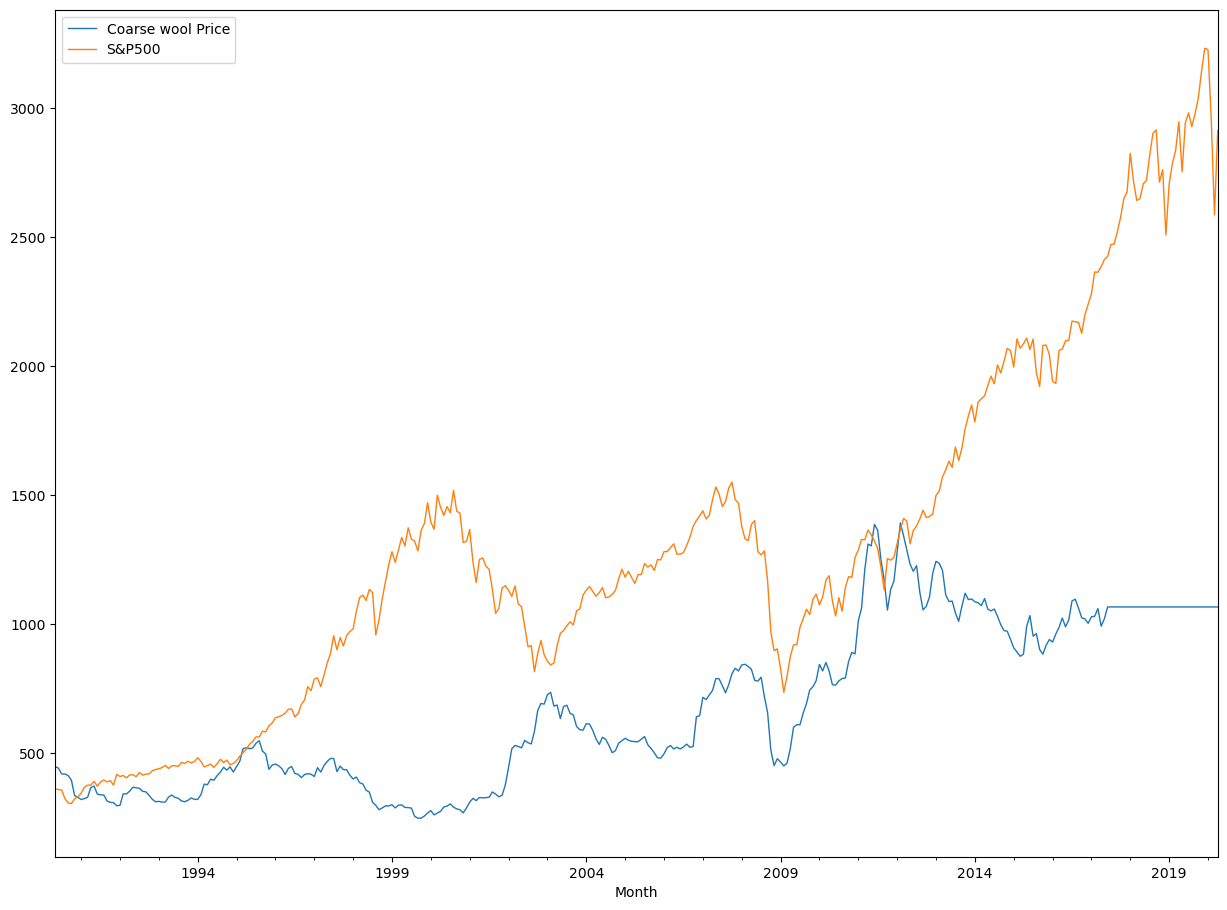

In [27]:
df[['Coarse wool Price', 'S&P500']].plot(figsize=(15, 11), subplots=False, linewidth=1)

<Axes: xlabel='Month'>

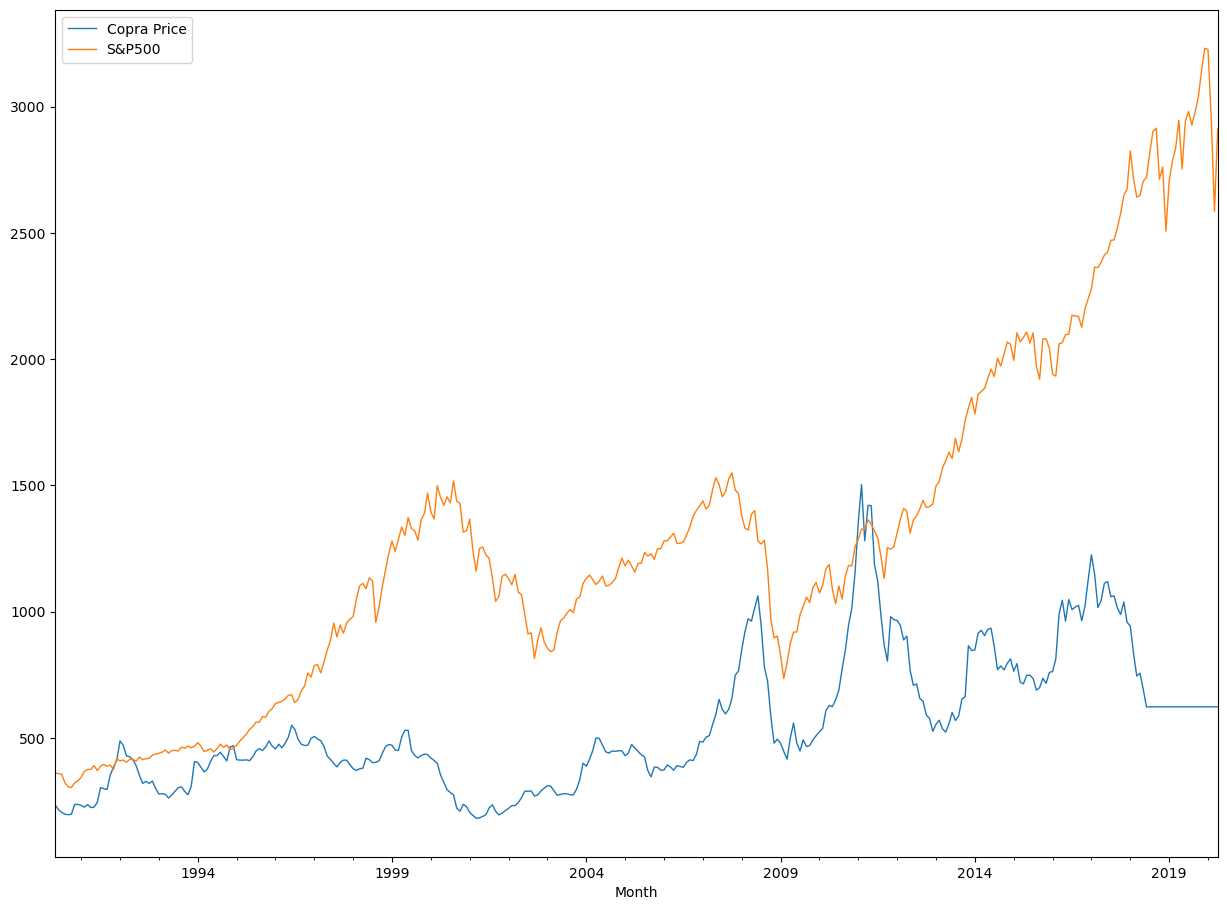

In [28]:
df[['Copra Price', 'S&P500']].plot(figsize=(15, 11), subplots=False, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

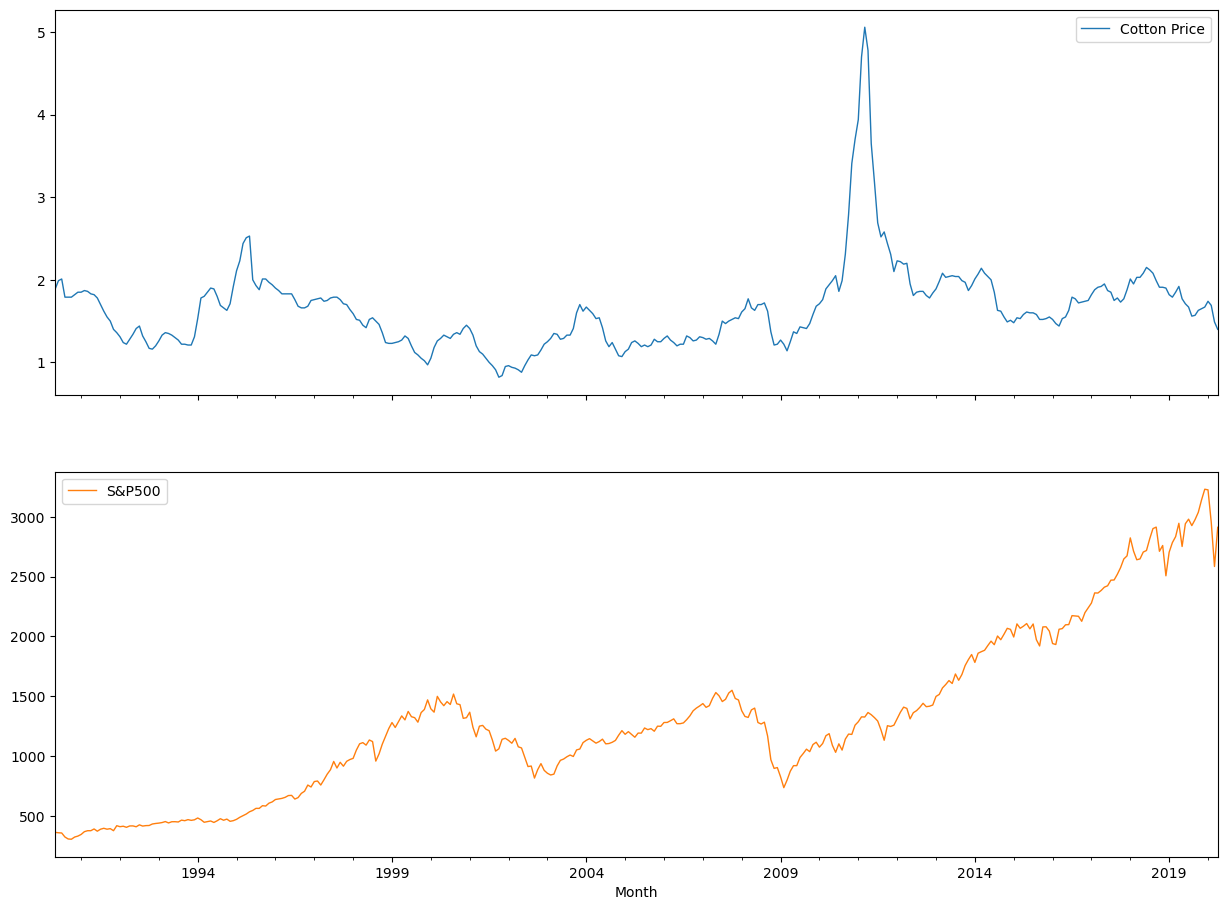

In [29]:
df[['Cotton Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

<Axes: xlabel='Month'>

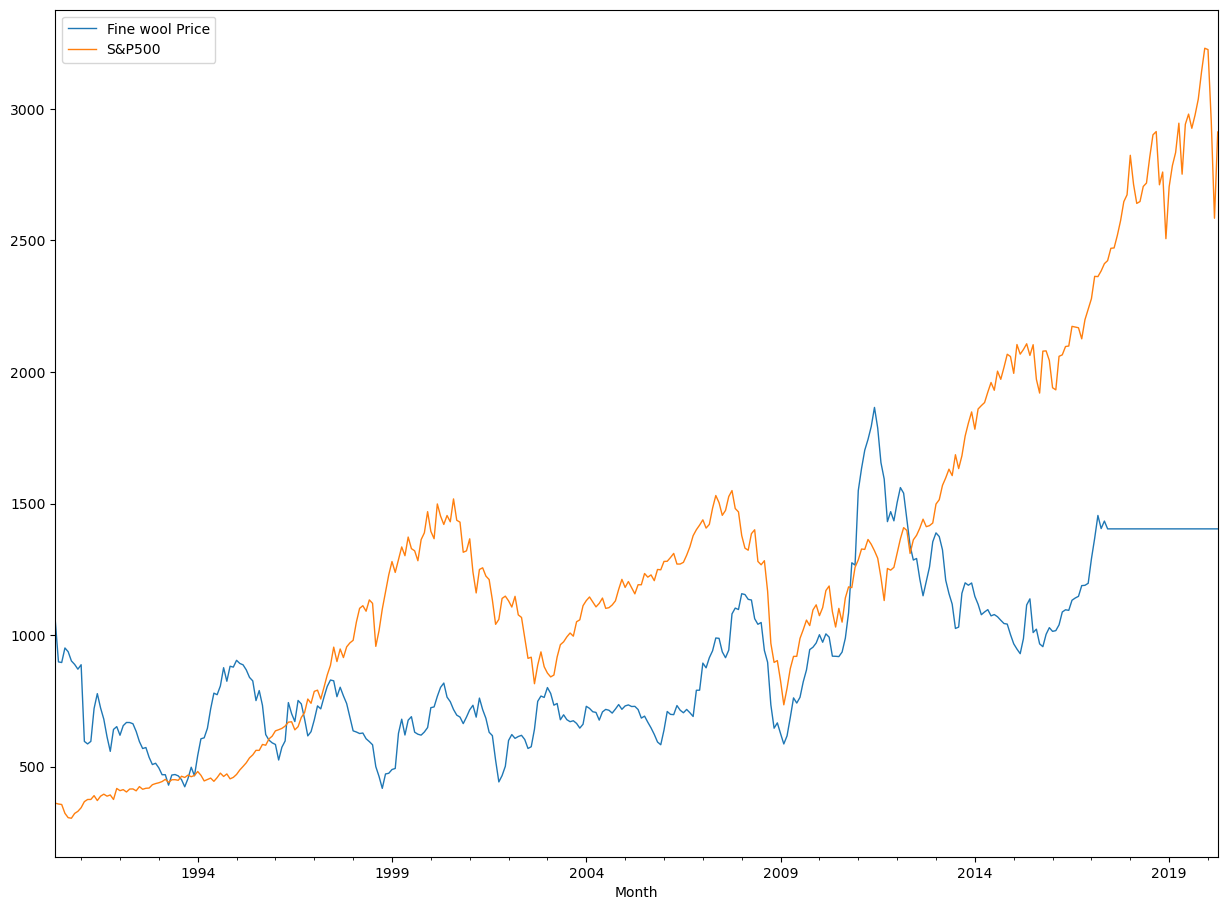

In [30]:
df[['Fine wool Price', 'S&P500']].plot(figsize=(15, 11), subplots=False, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

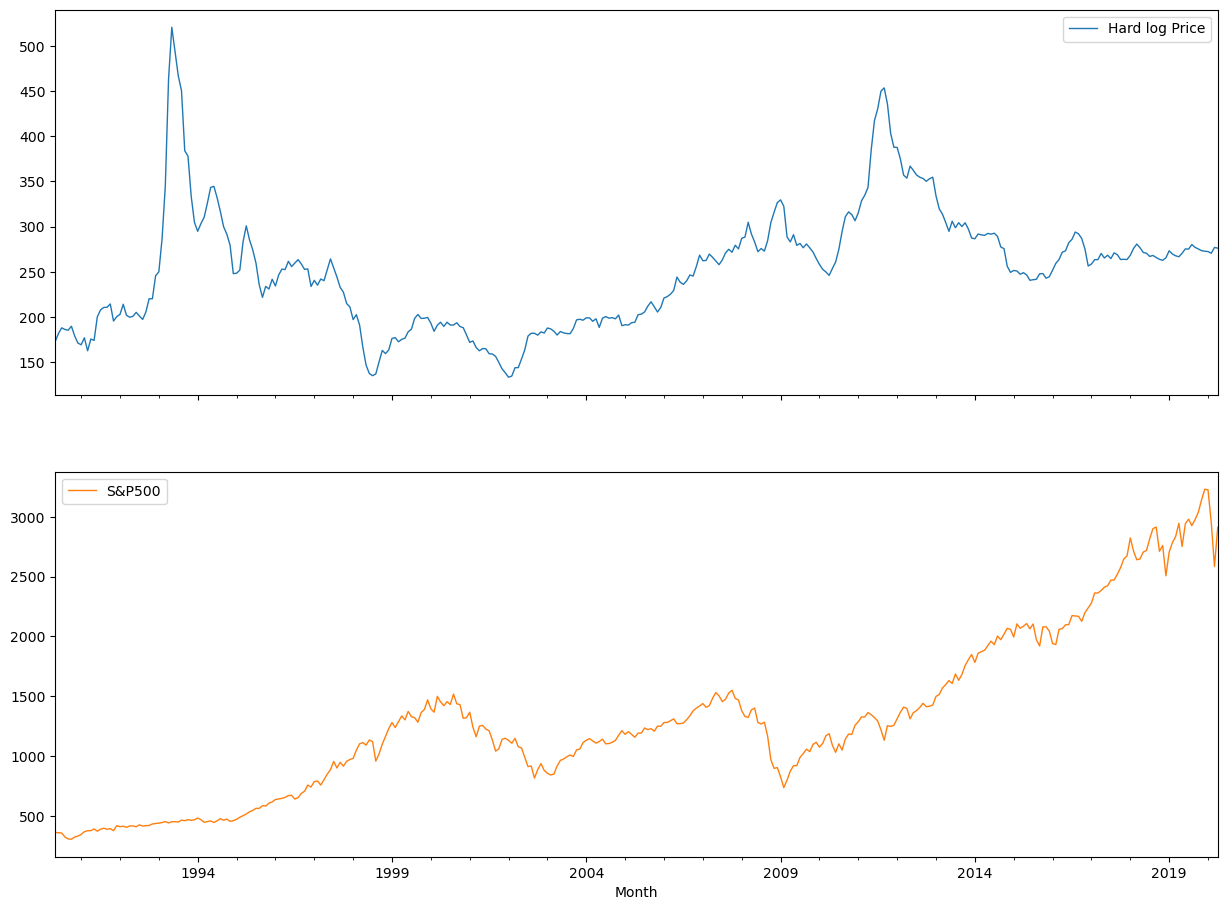

In [31]:
df[['Hard log Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

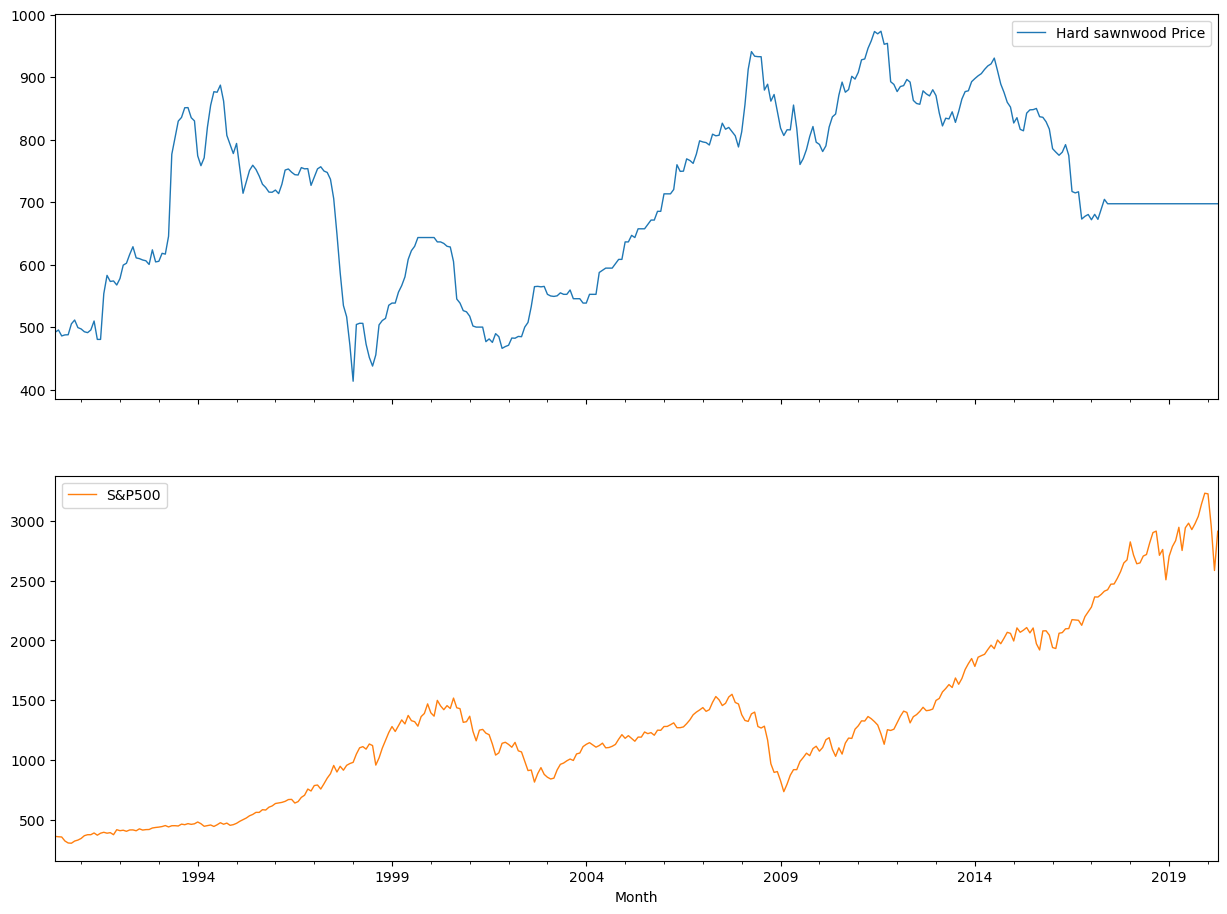

In [32]:
df[['Hard sawnwood Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

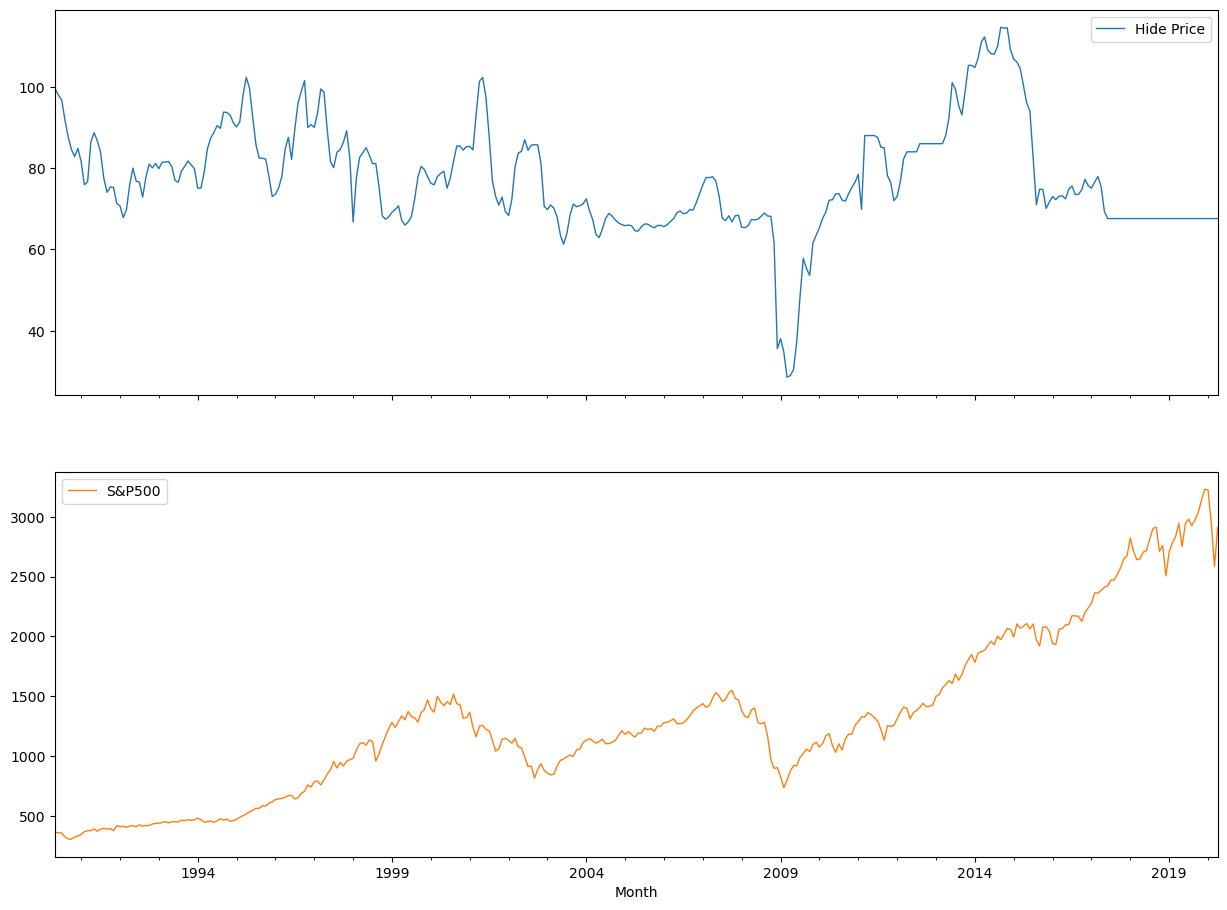

In [33]:
df[['Hide Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

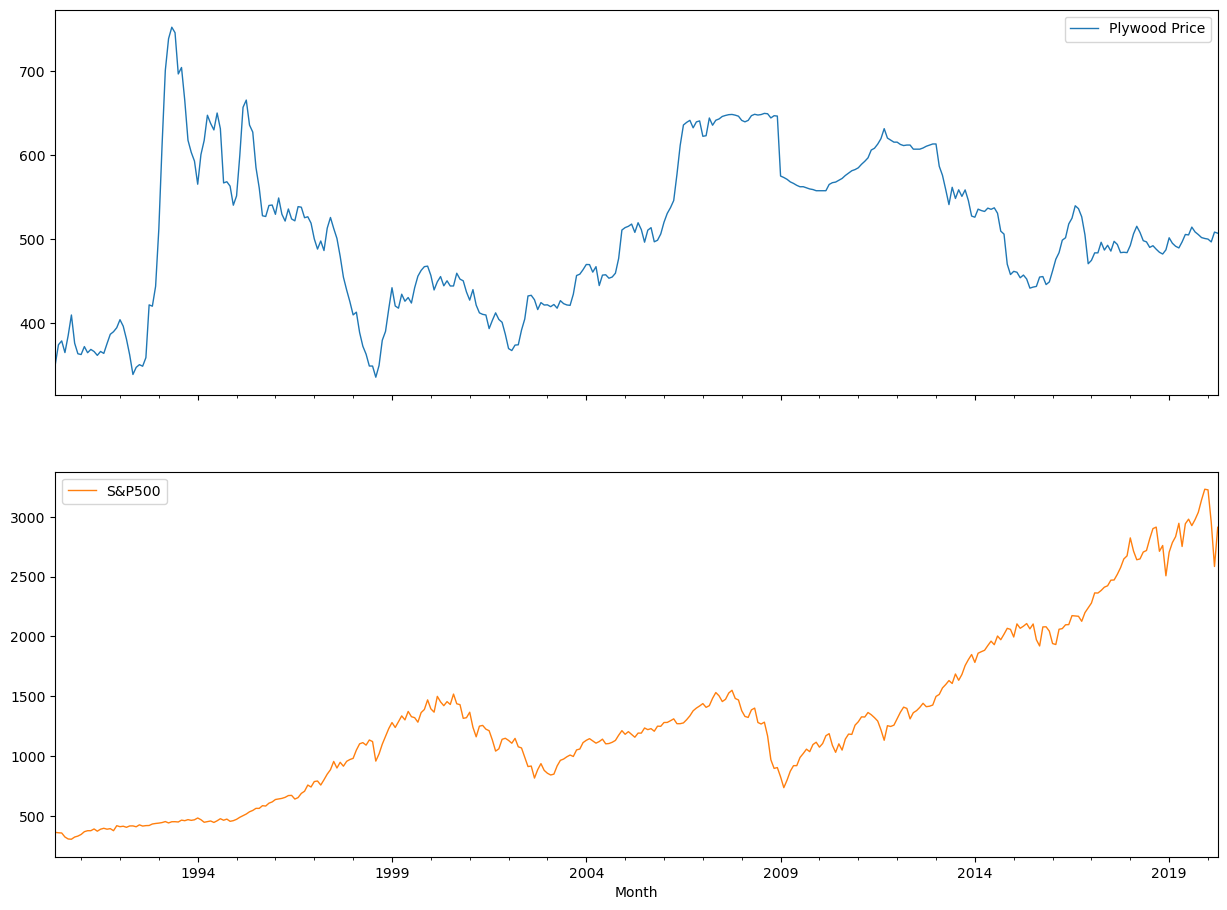

In [34]:
df[['Plywood Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

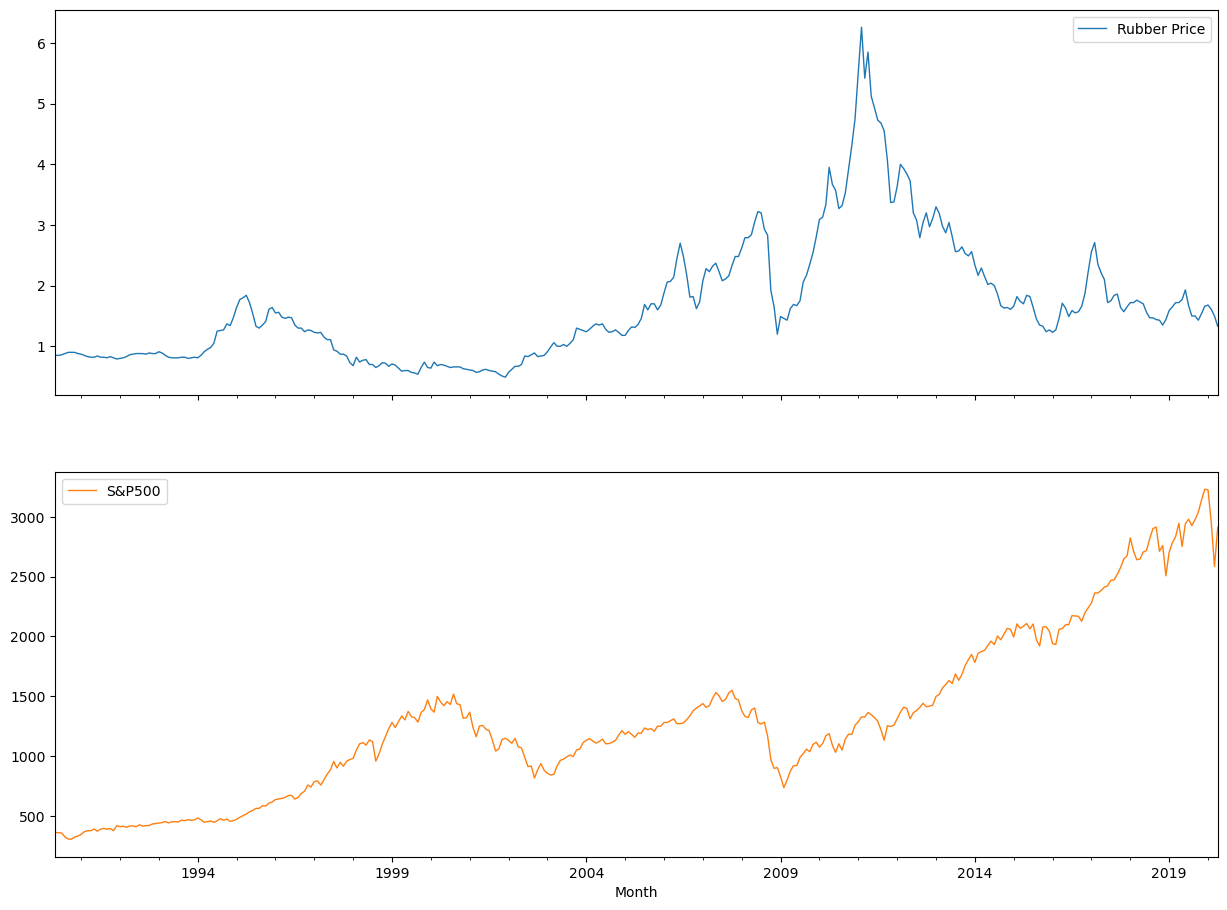

In [35]:
df[['Rubber Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

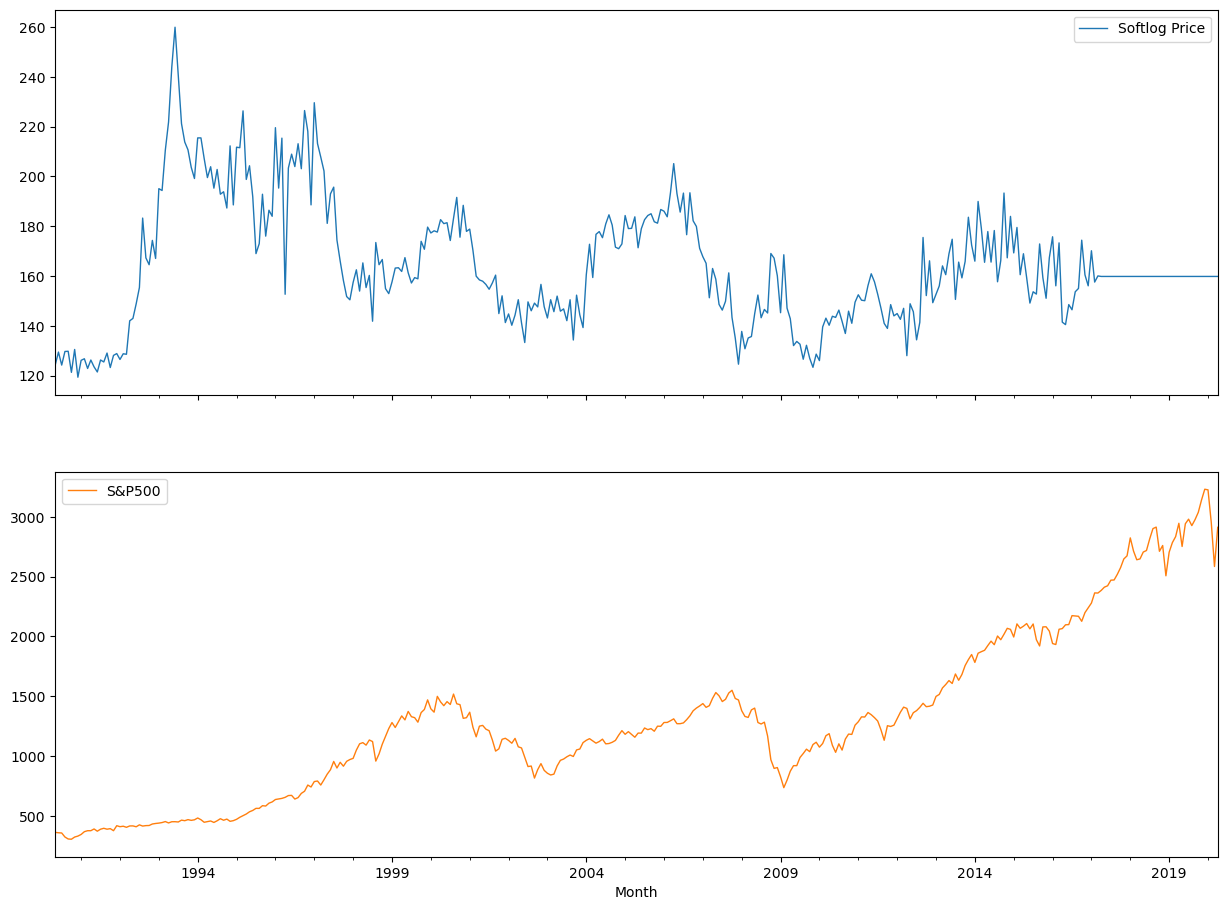

In [36]:
df[['Softlog Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

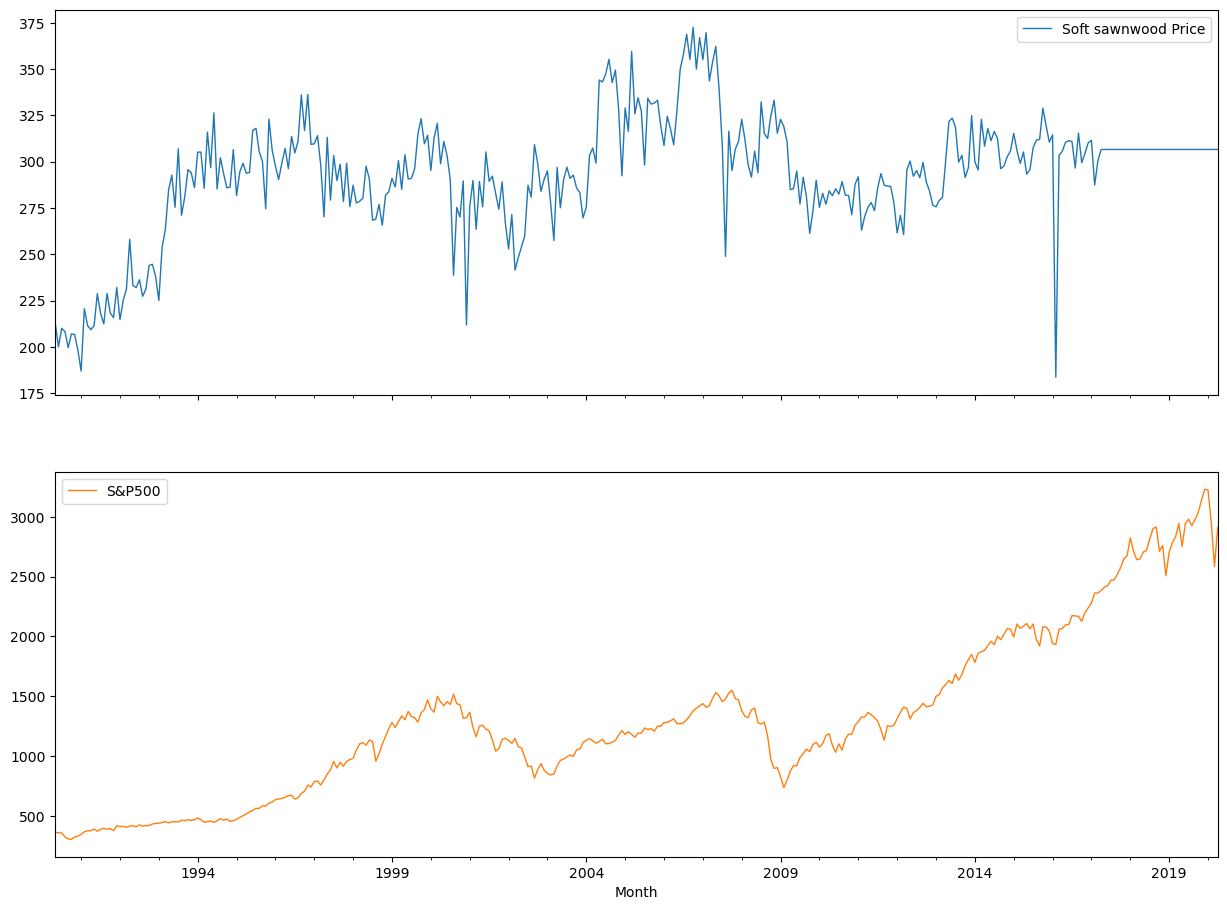

In [37]:
df[['Soft sawnwood Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

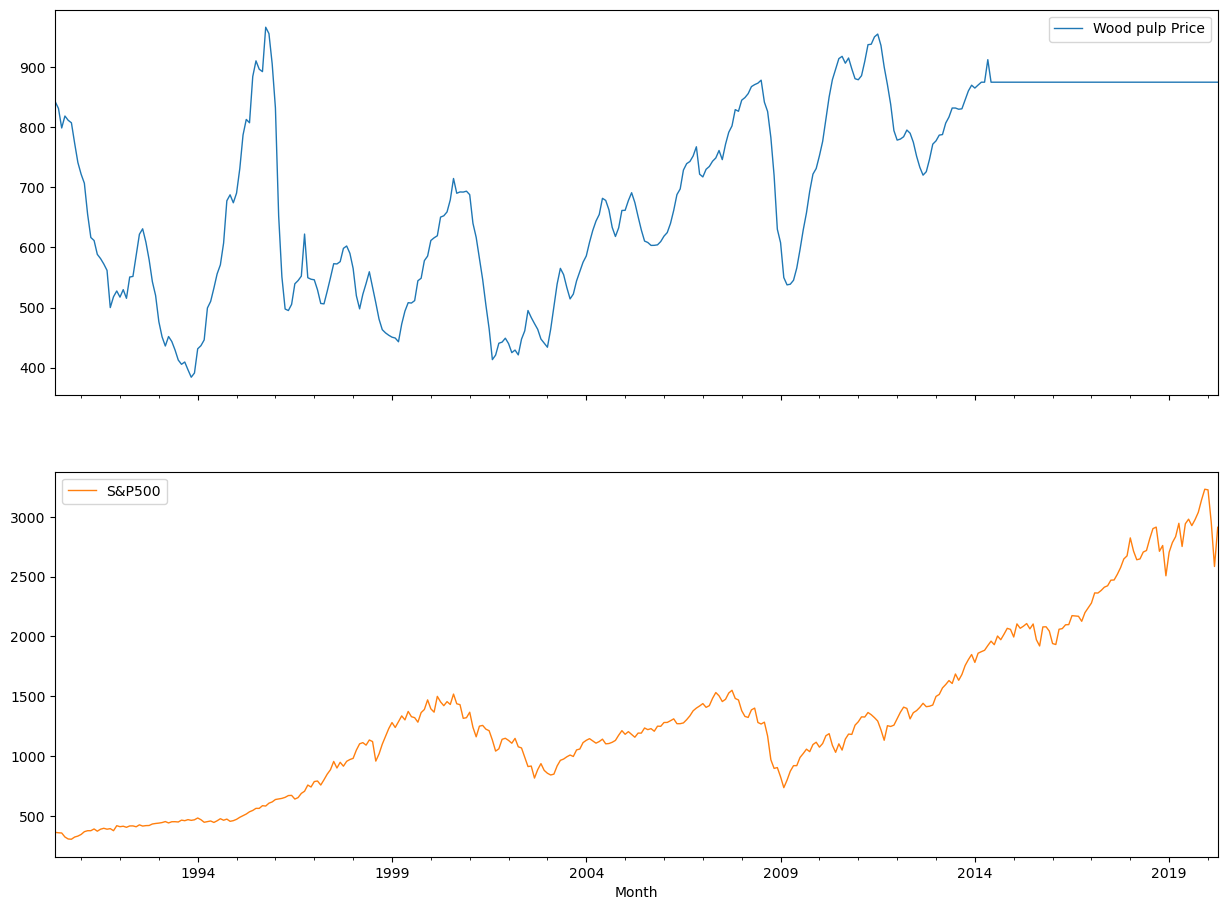

In [38]:
df[['Wood pulp Price', 'S&P500']].plot(figsize=(15, 11), subplots=True, linewidth=1)

## Посмотрим коррелляцию с ценой карбамида

<Axes: xlabel='Month'>

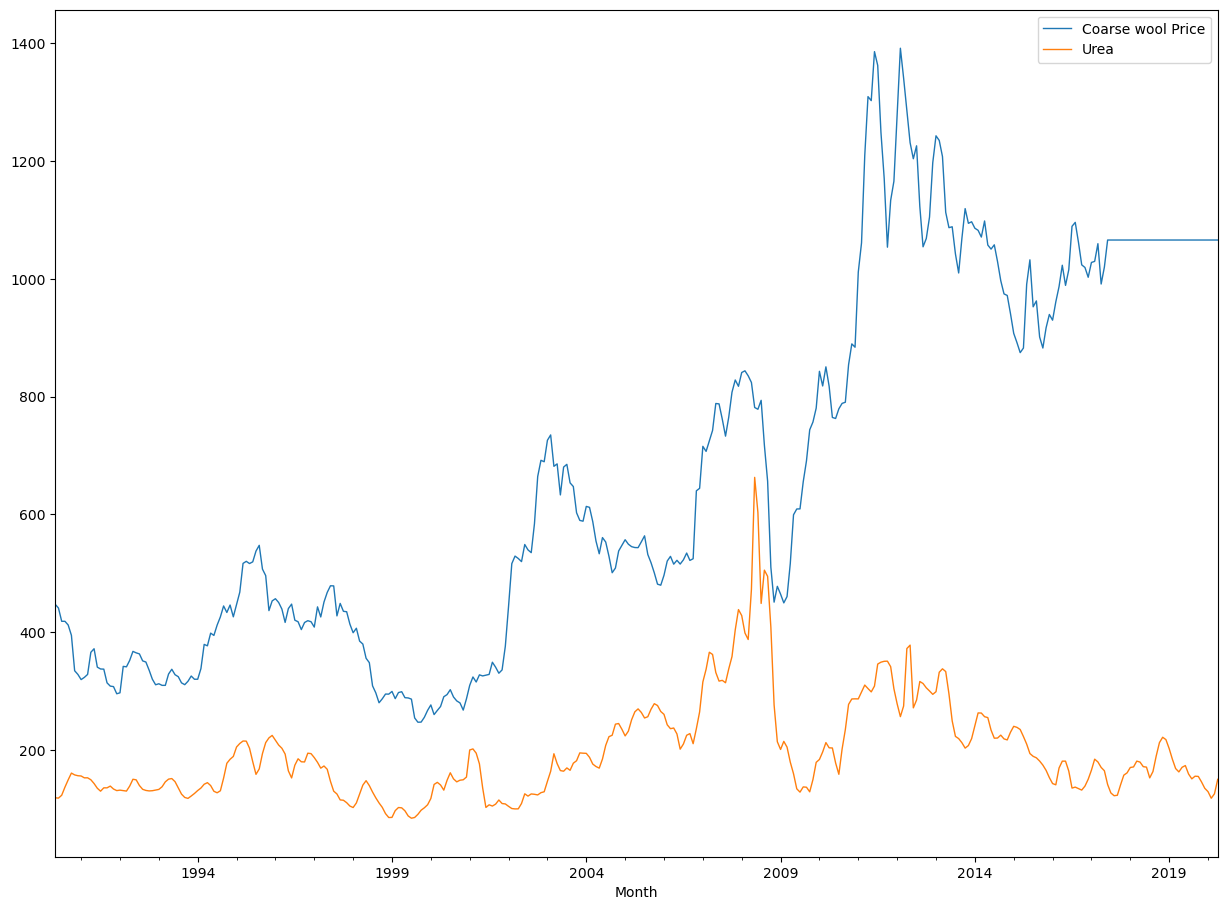

In [39]:
df[['Coarse wool Price', 'Urea']].plot(figsize=(15, 11), subplots=False, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

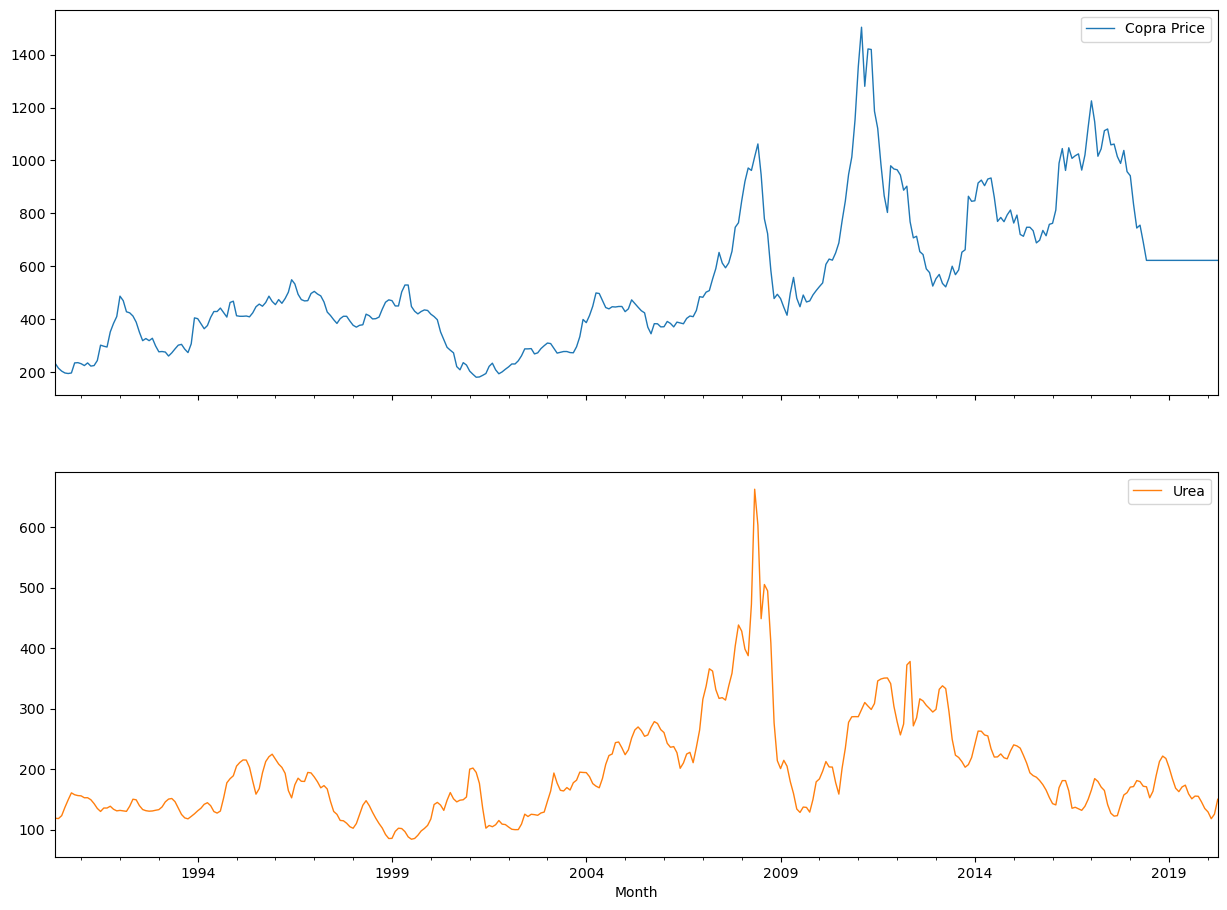

In [40]:
df[['Copra Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

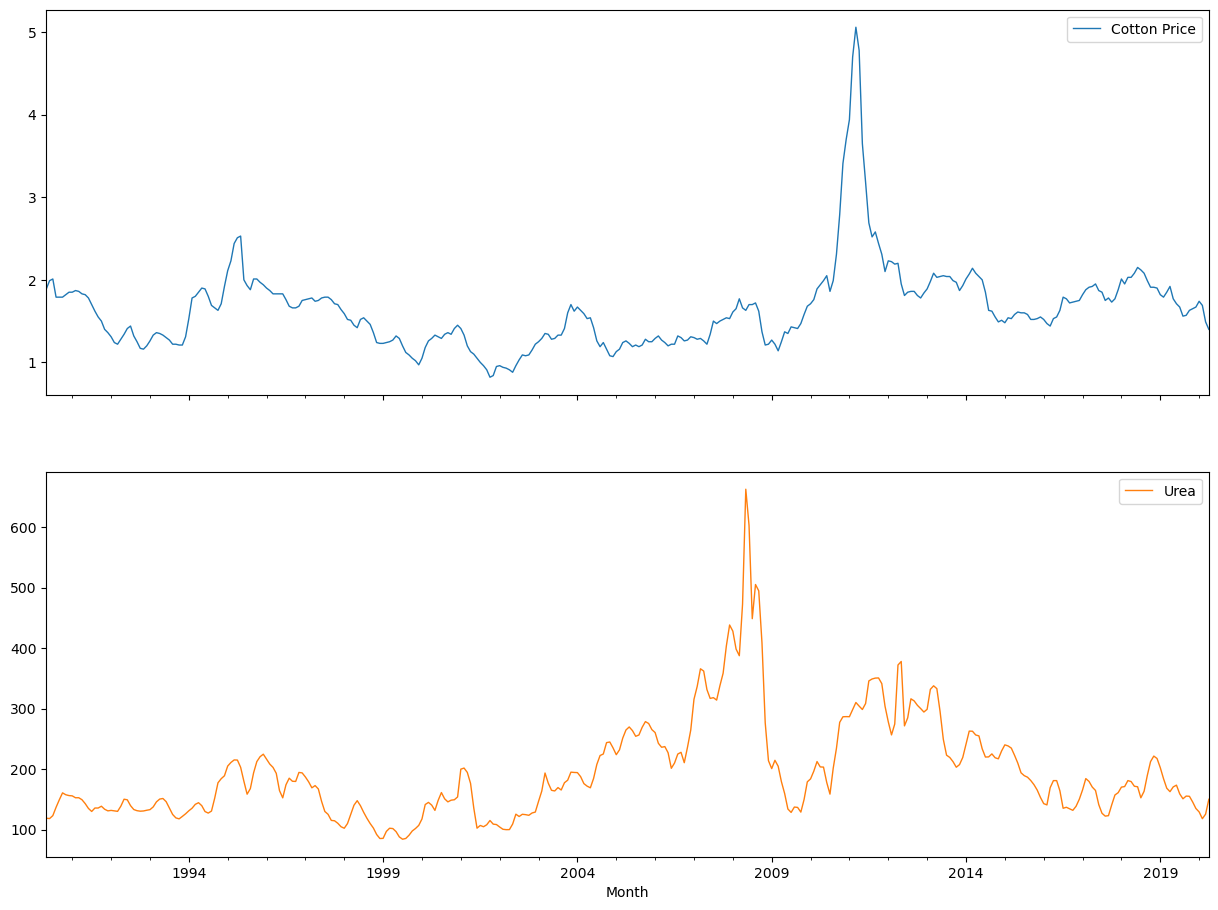

In [41]:
df[['Cotton Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

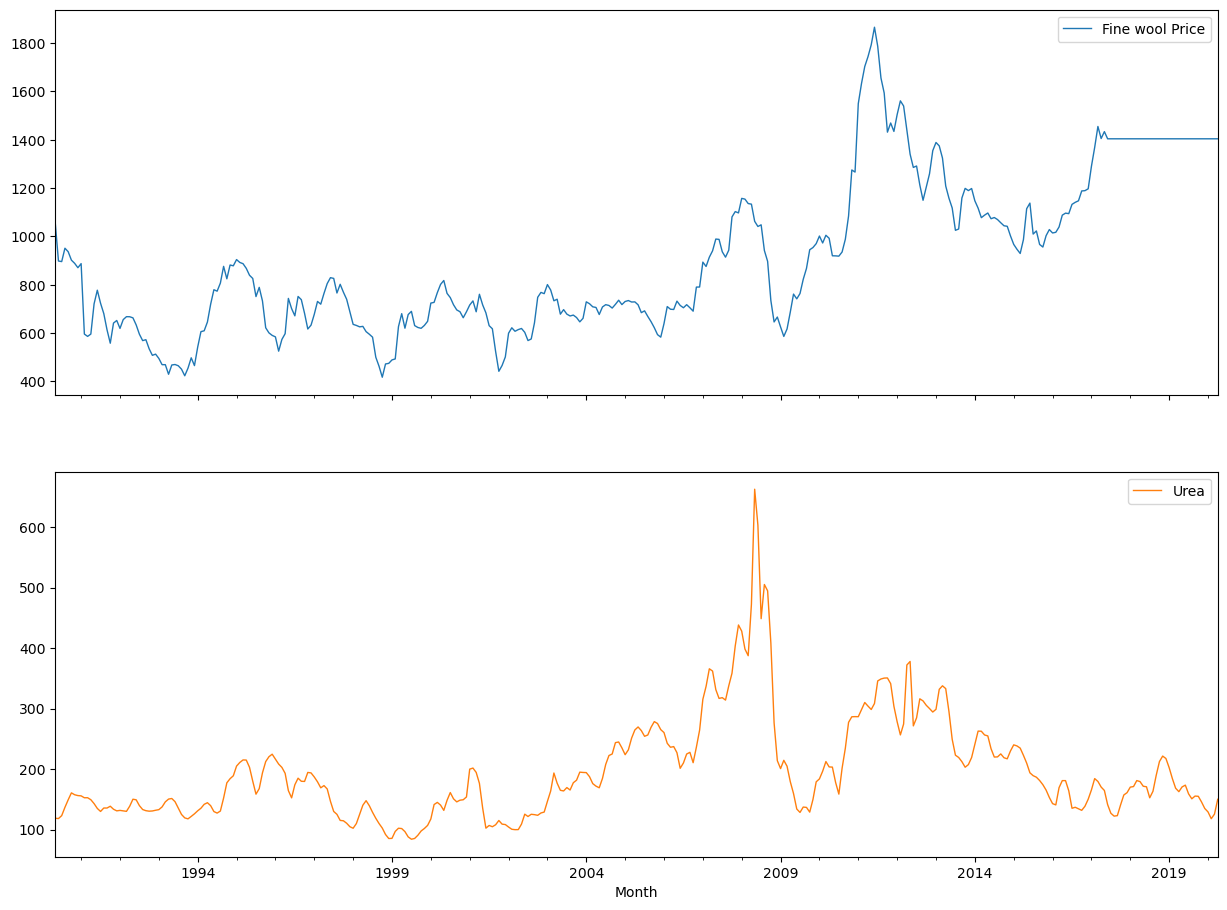

In [42]:
df[['Fine wool Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

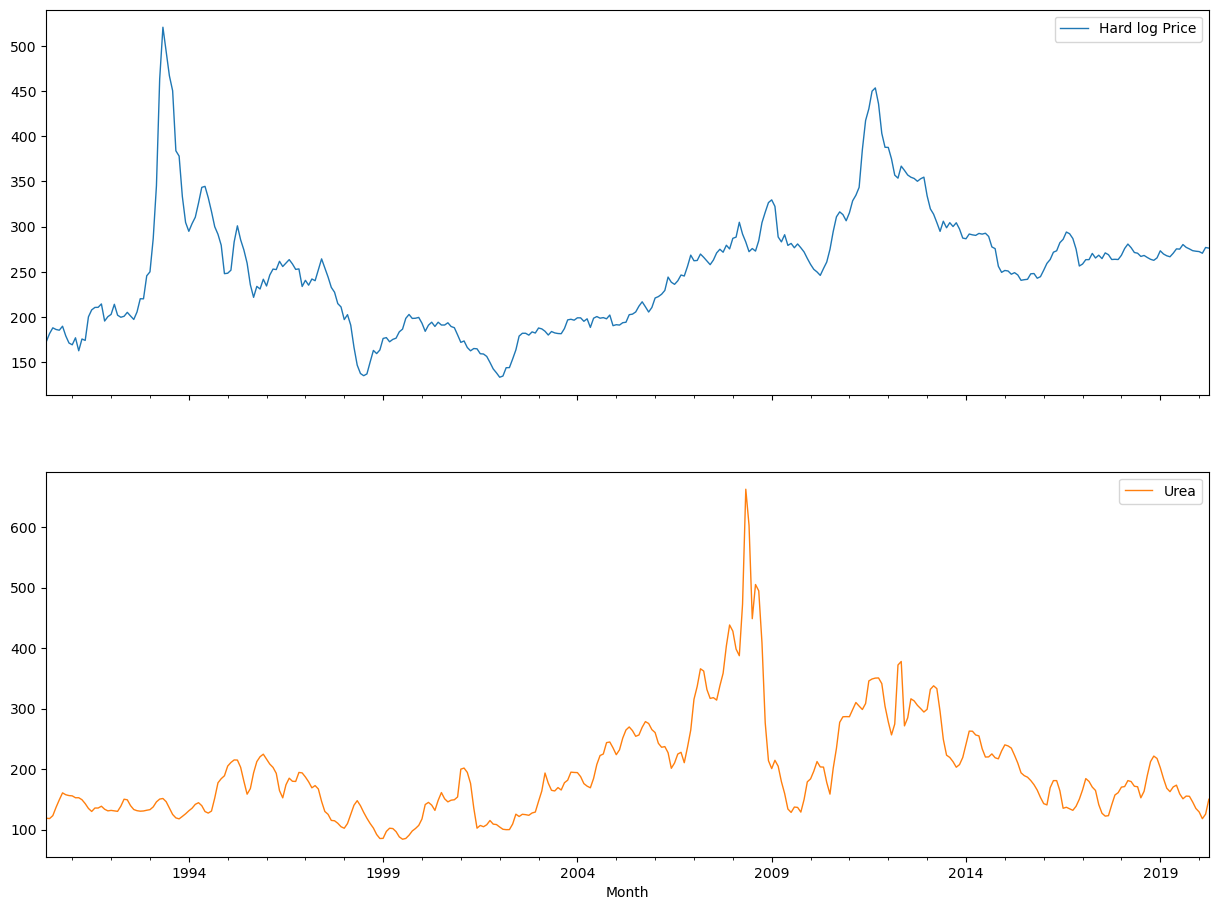

In [43]:
df[['Hard log Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

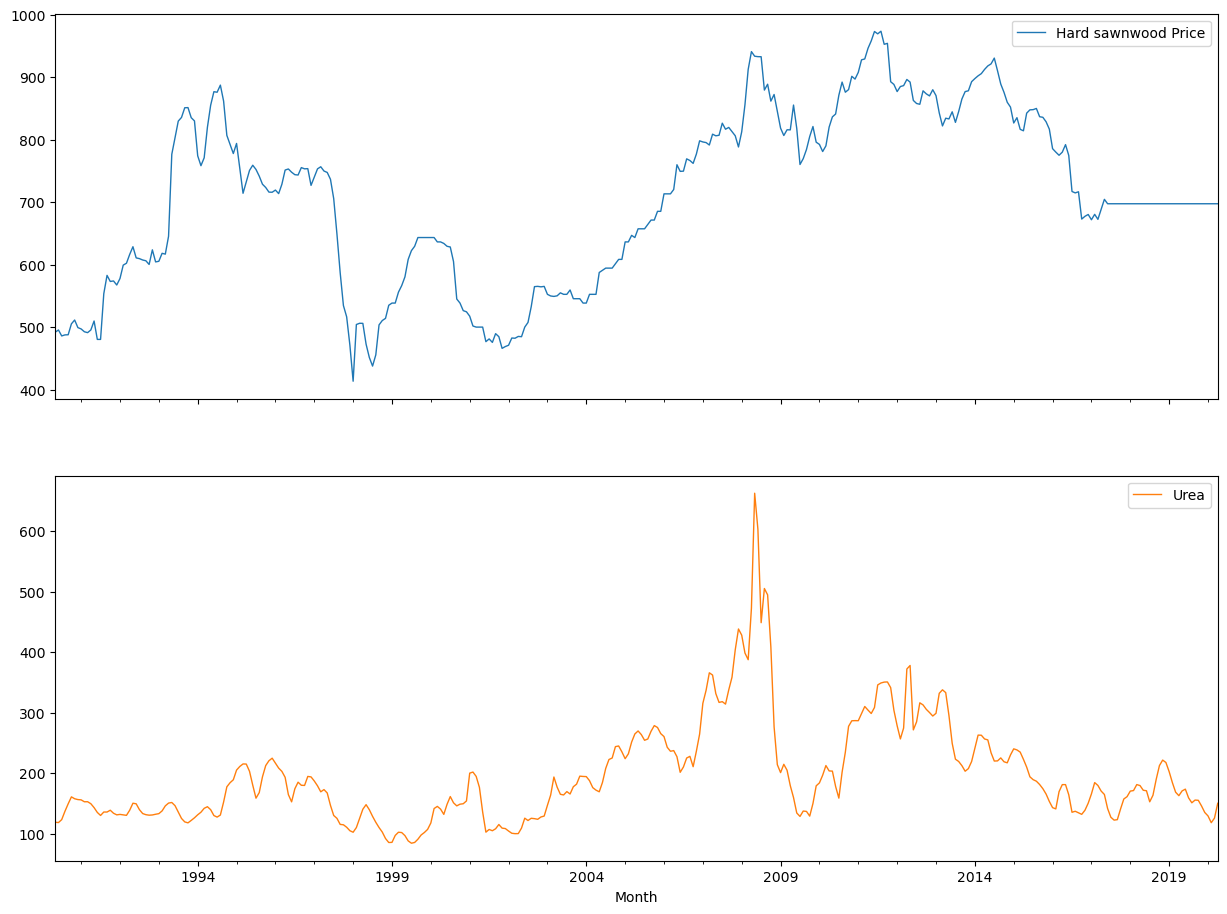

In [44]:
df[['Hard sawnwood Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

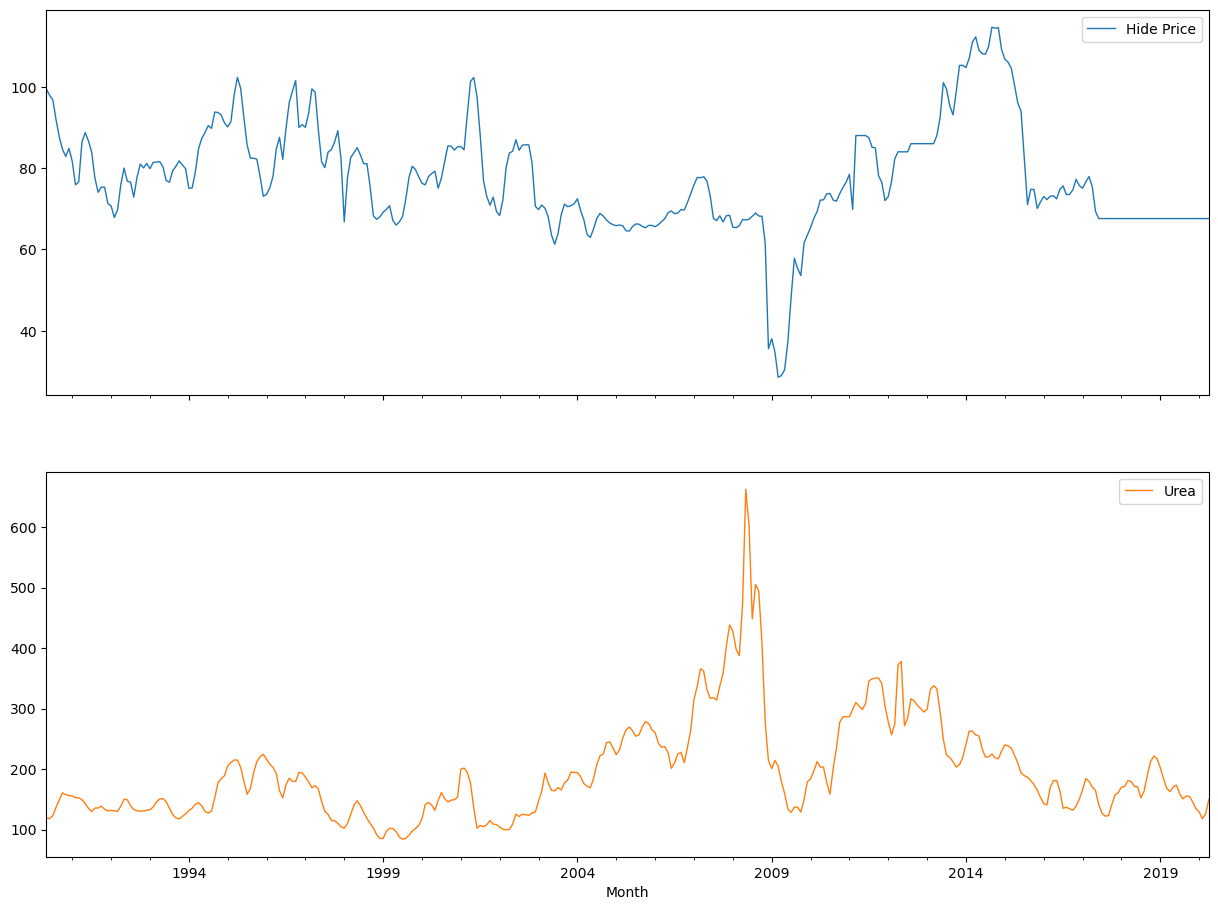

In [45]:
df[['Hide Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

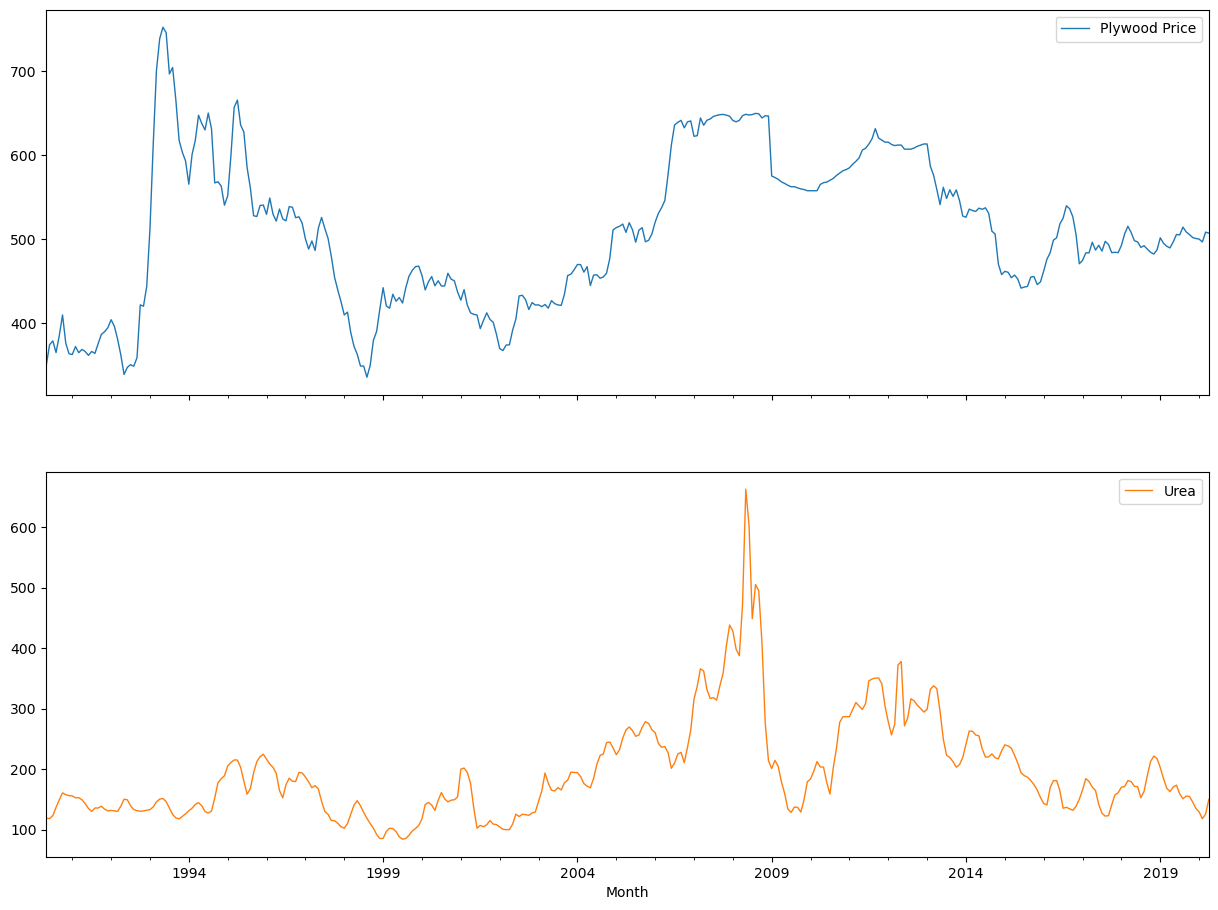

In [46]:
df[['Plywood Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

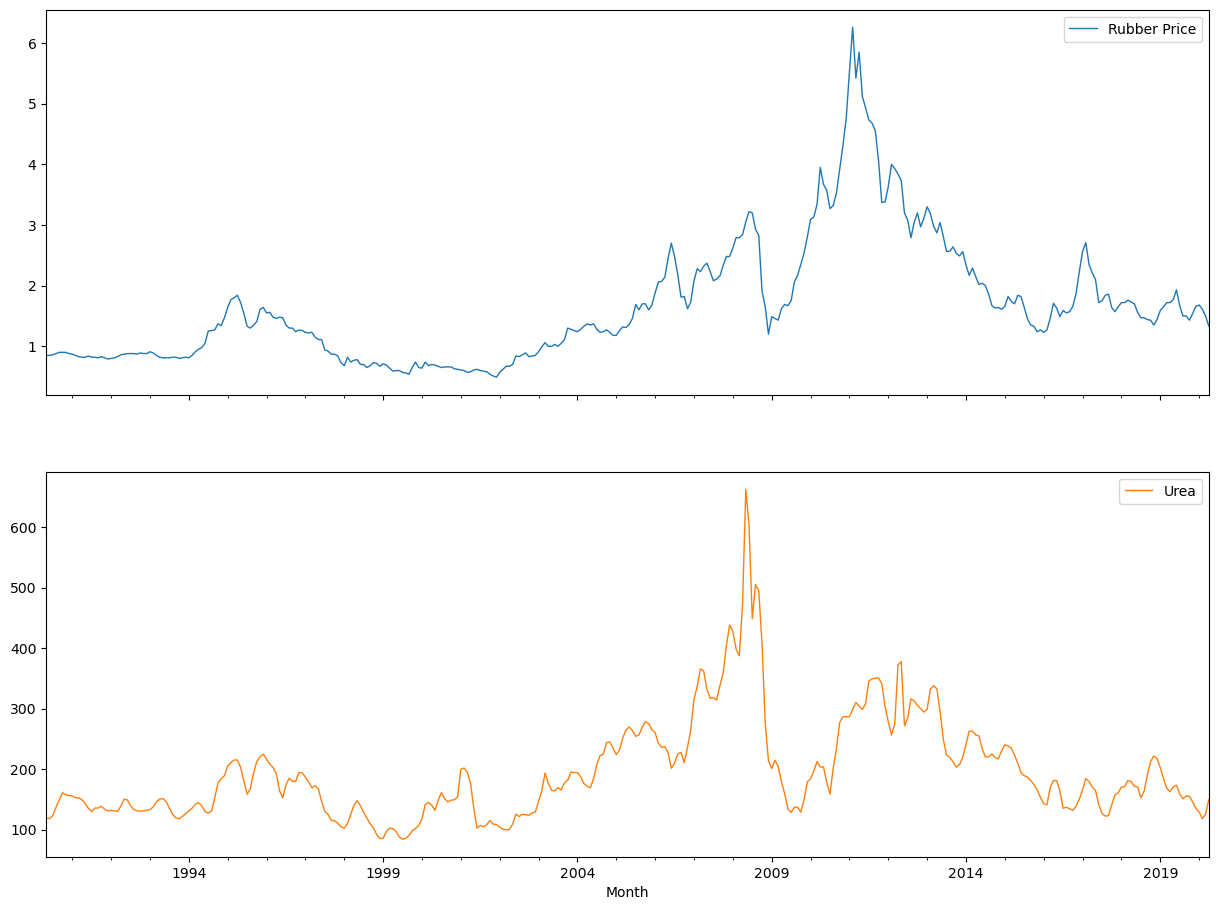

In [47]:
df[['Rubber Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

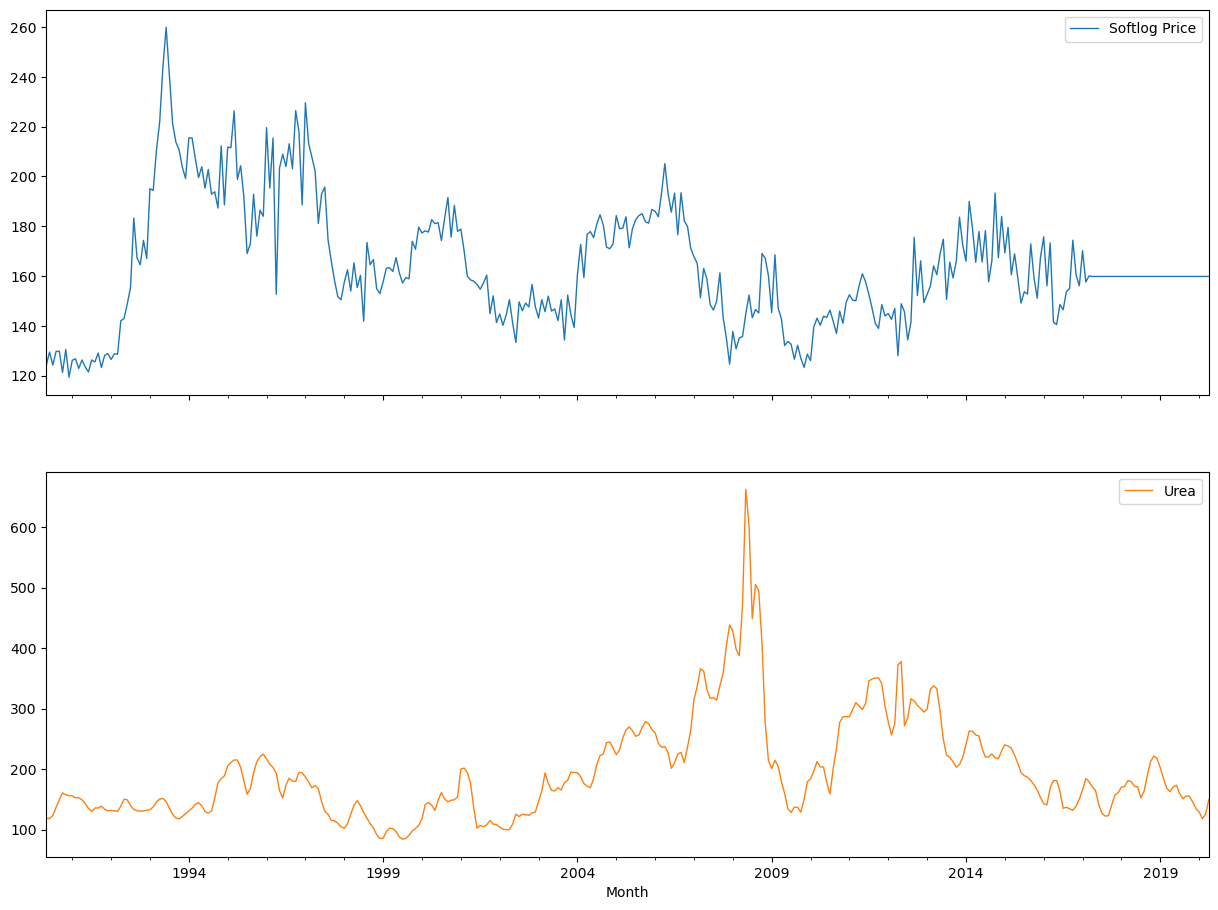

In [48]:
df[['Softlog Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

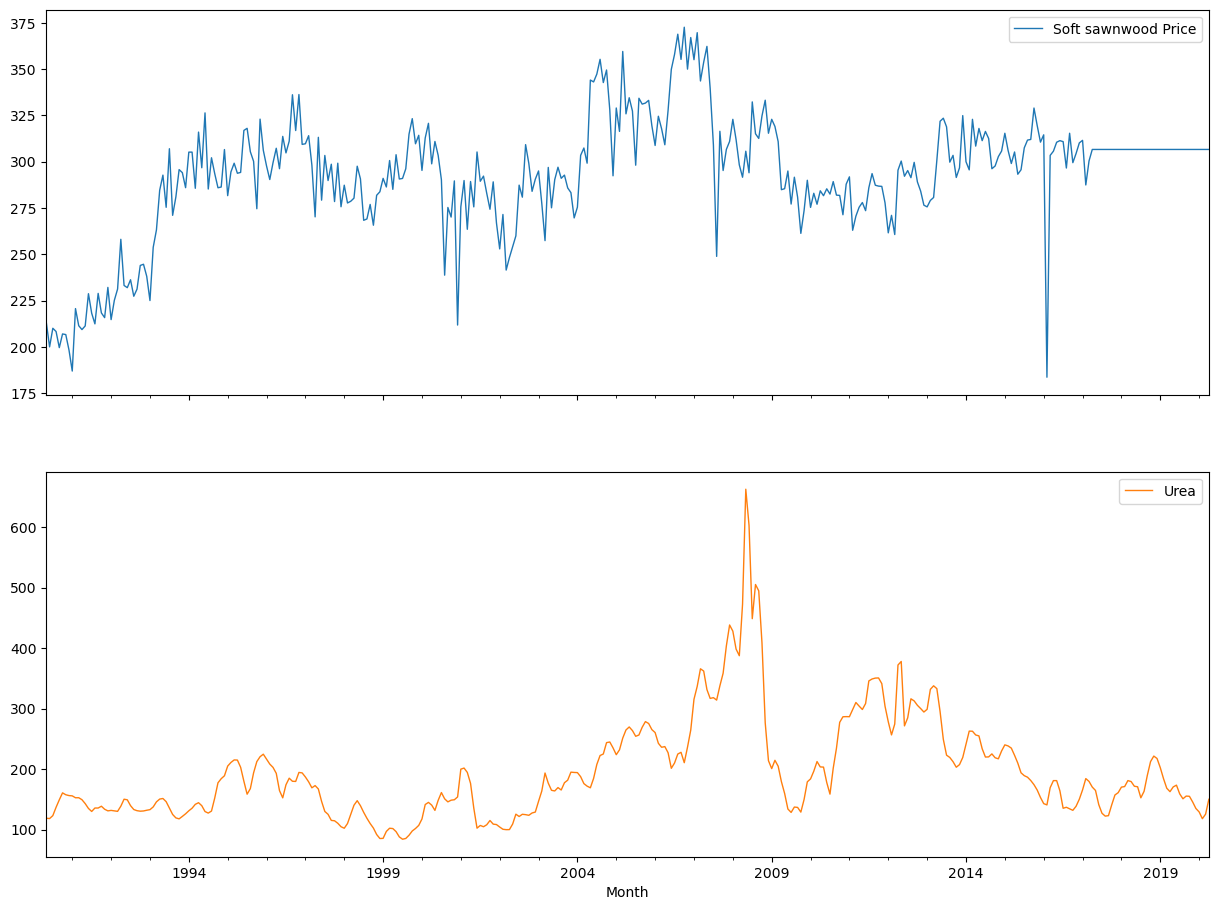

In [49]:
df[['Soft sawnwood Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

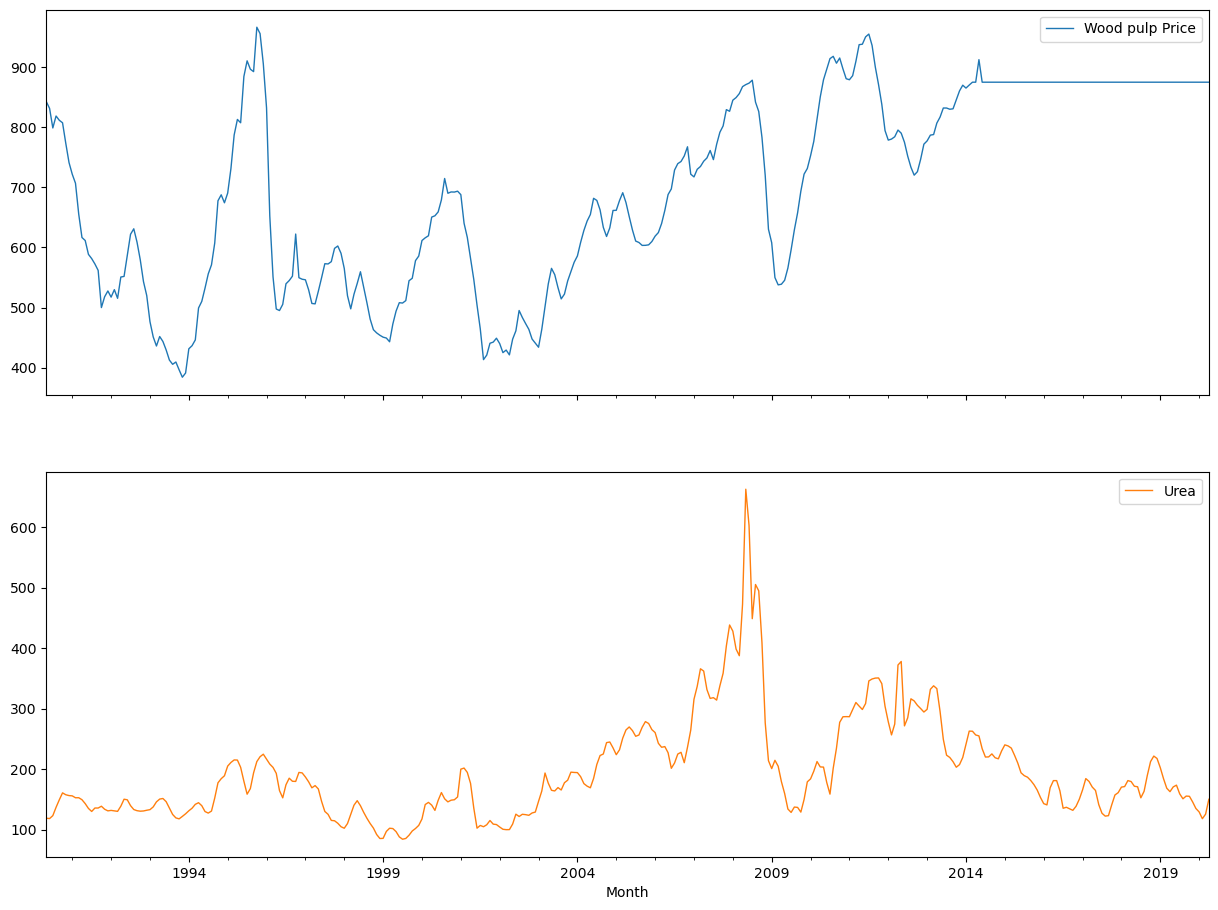

In [50]:
df[['Wood pulp Price', 'Urea']].plot(figsize=(15, 11), subplots=True, linewidth=1)

## Посмотрим коррелляцию с ценой газа

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

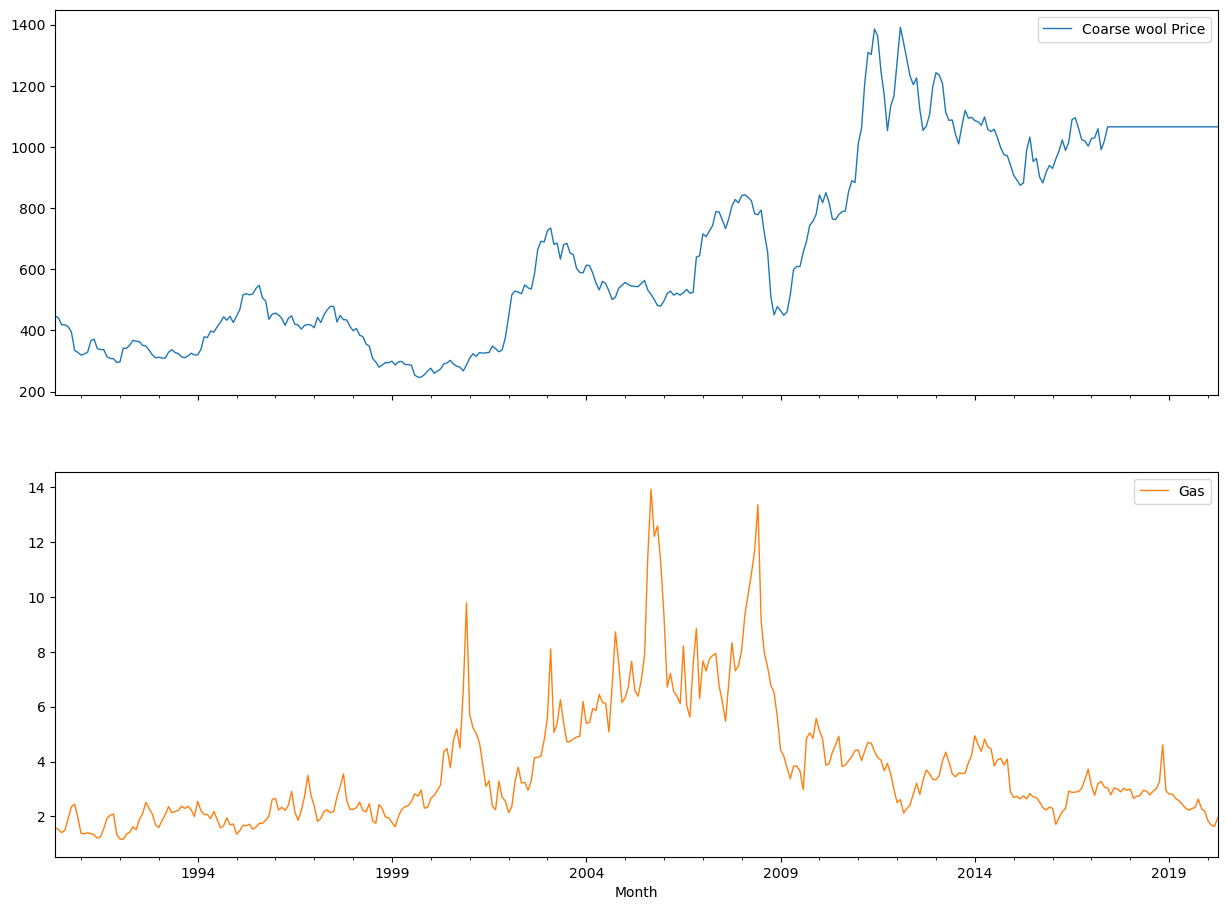

In [51]:
df[['Coarse wool Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

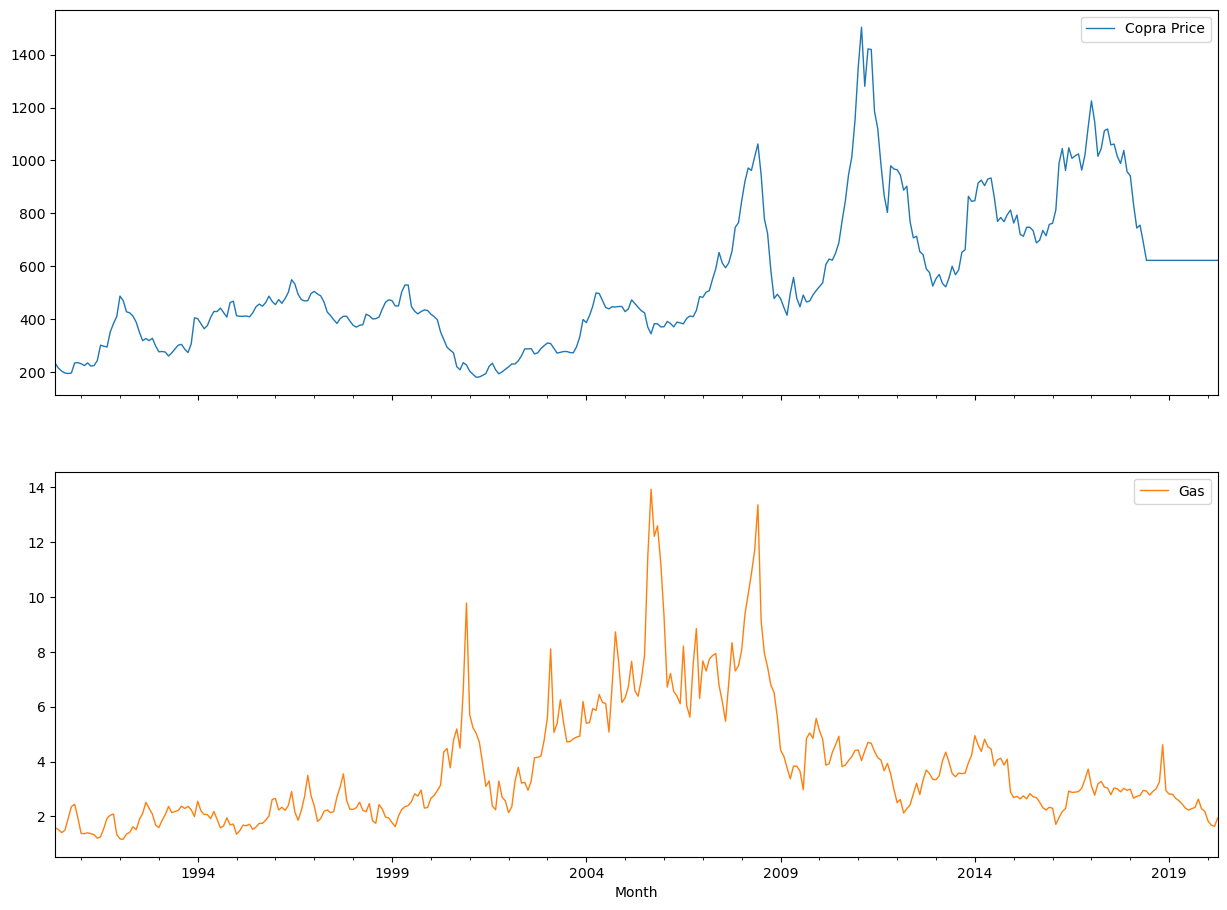

In [52]:
df[['Copra Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

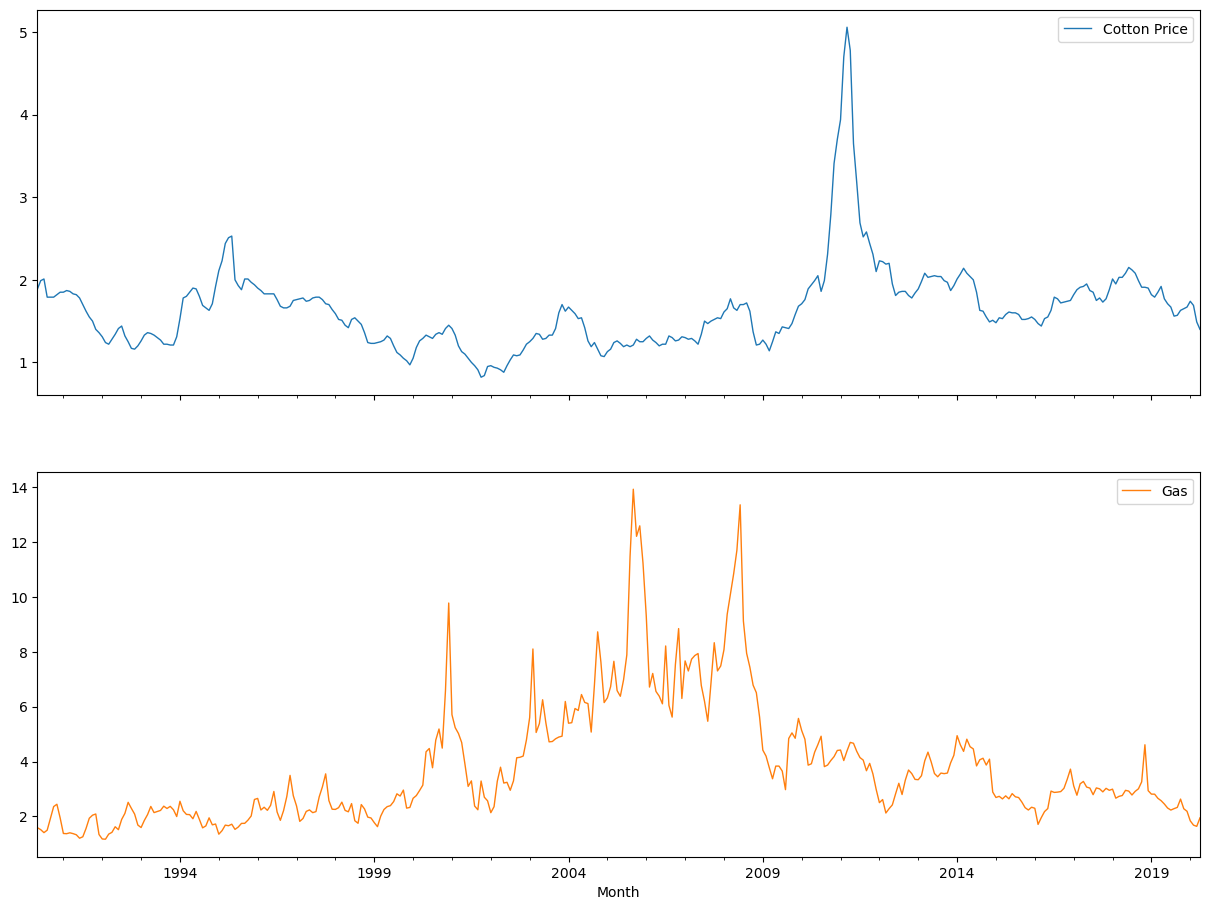

In [53]:
df[['Cotton Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

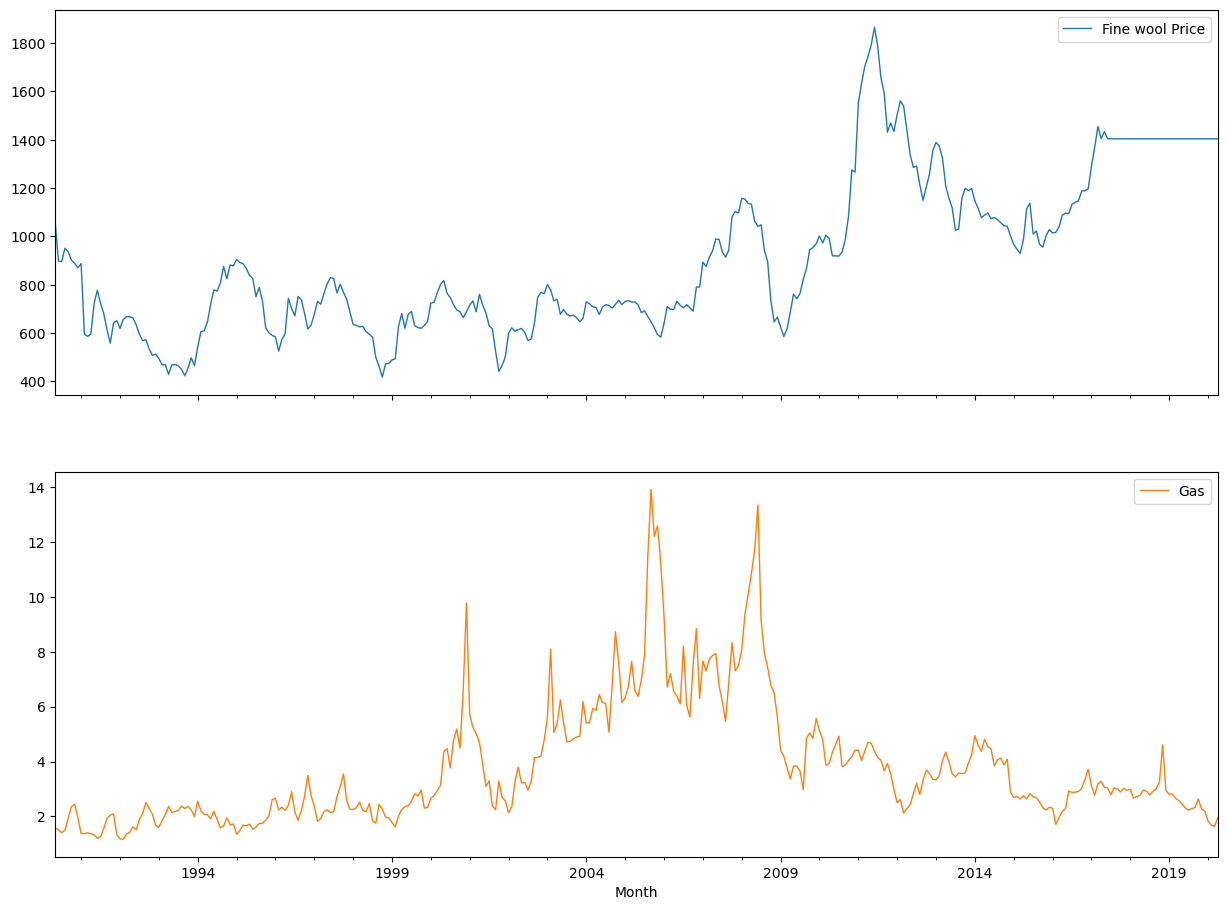

In [54]:
df[['Fine wool Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

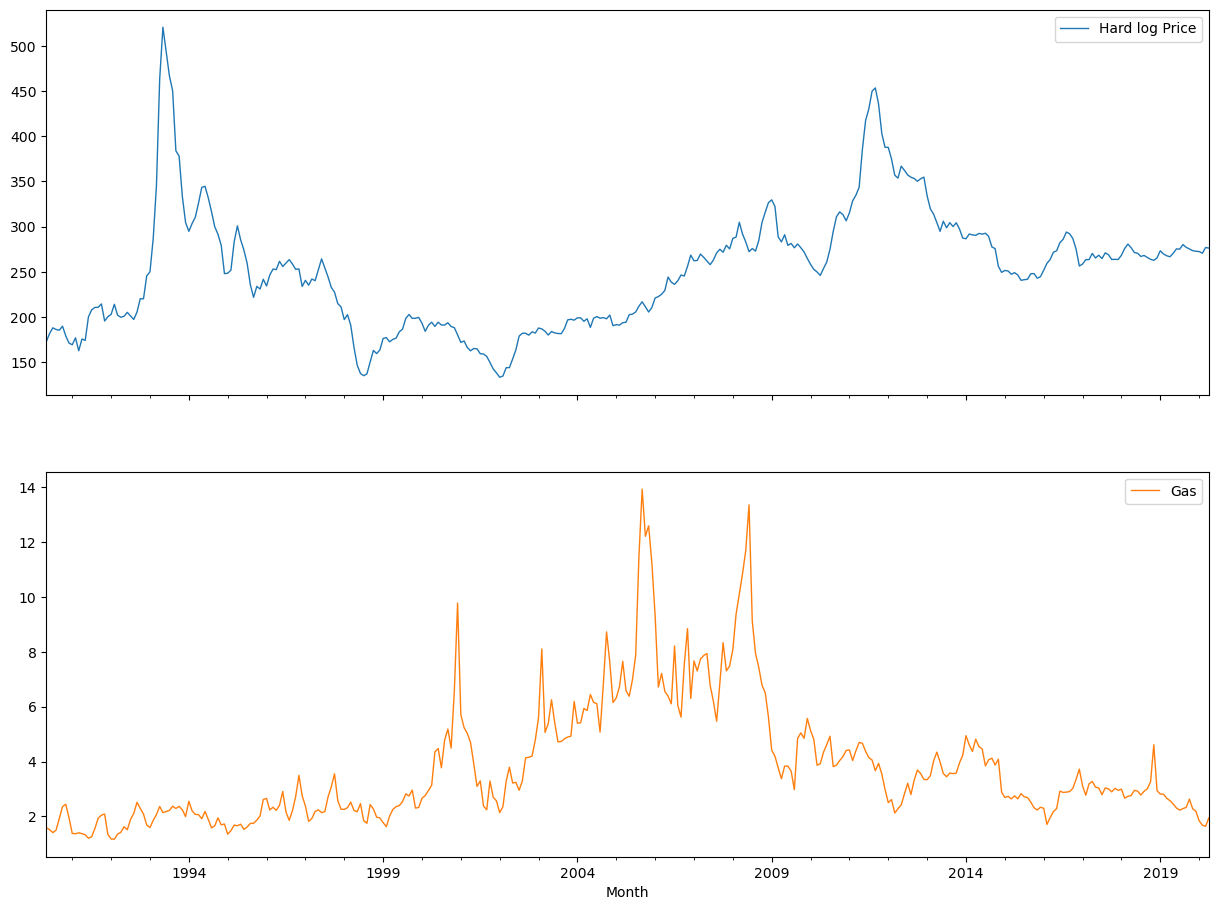

In [55]:
df[['Hard log Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

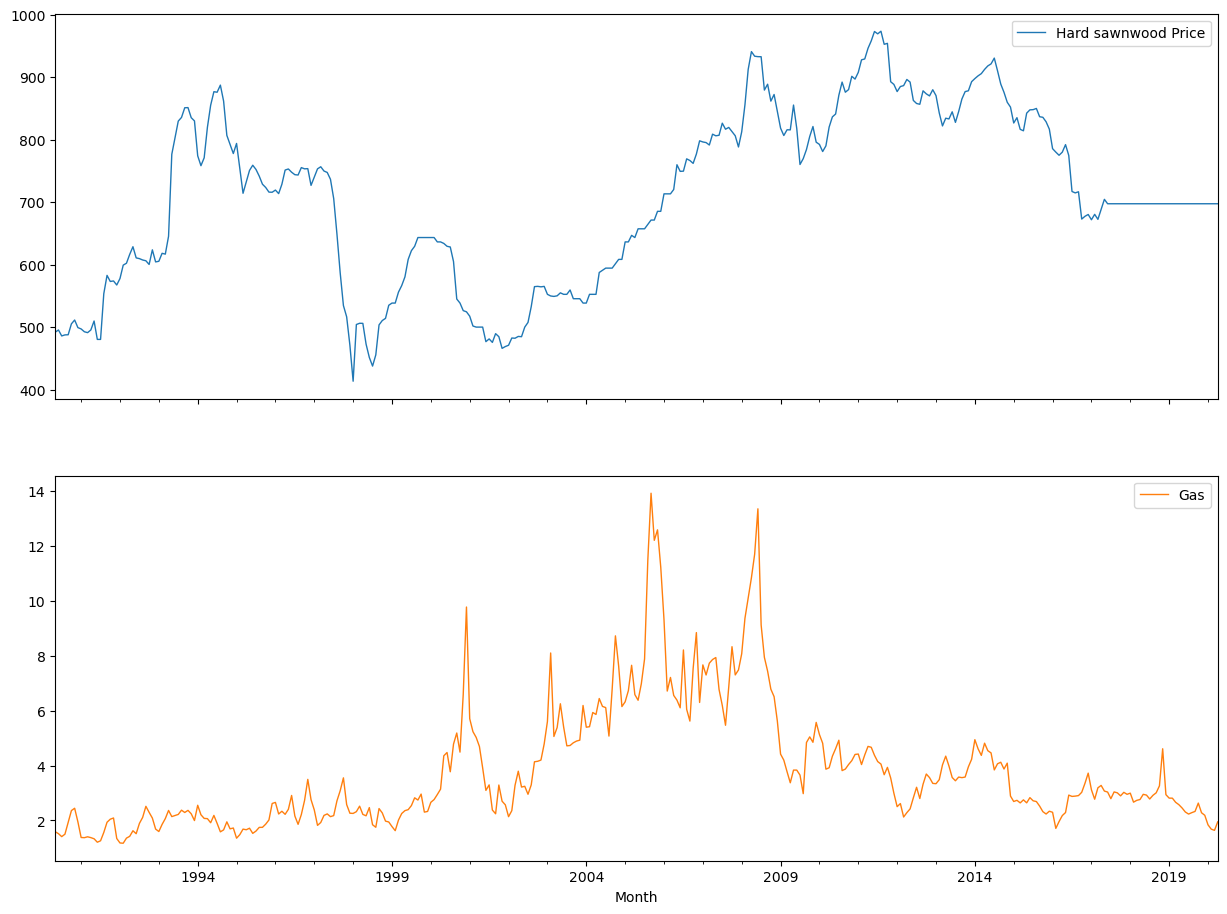

In [56]:
df[['Hard sawnwood Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

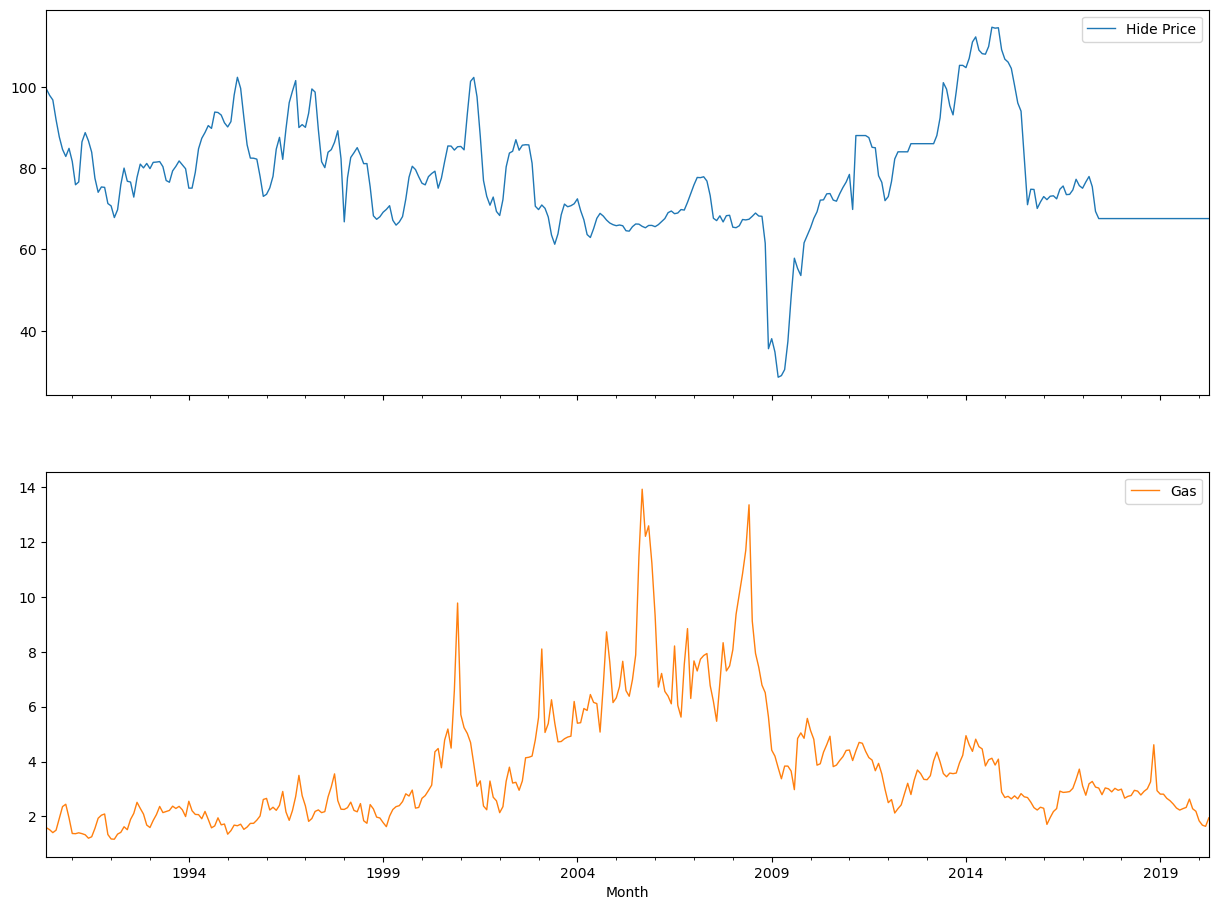

In [57]:
df[['Hide Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

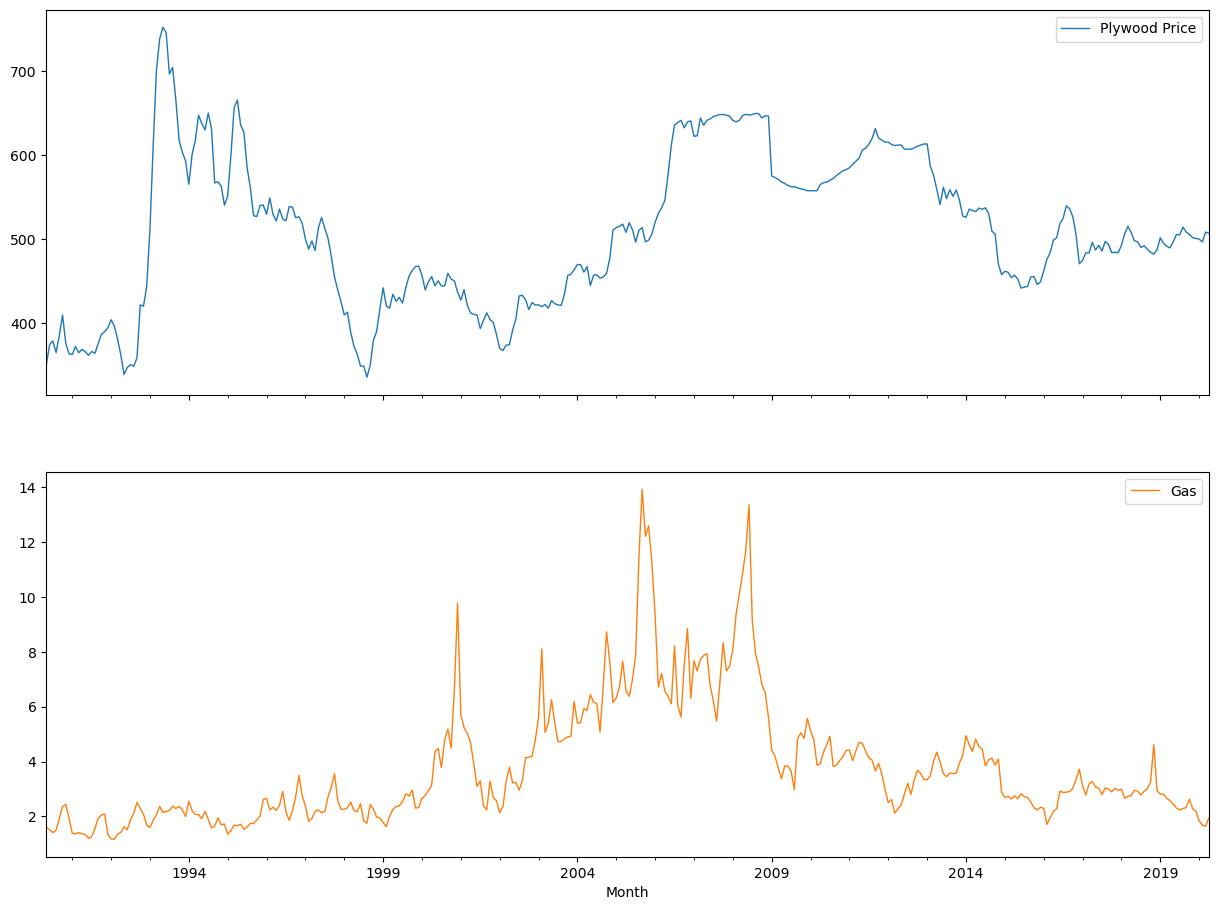

In [58]:
df[['Plywood Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

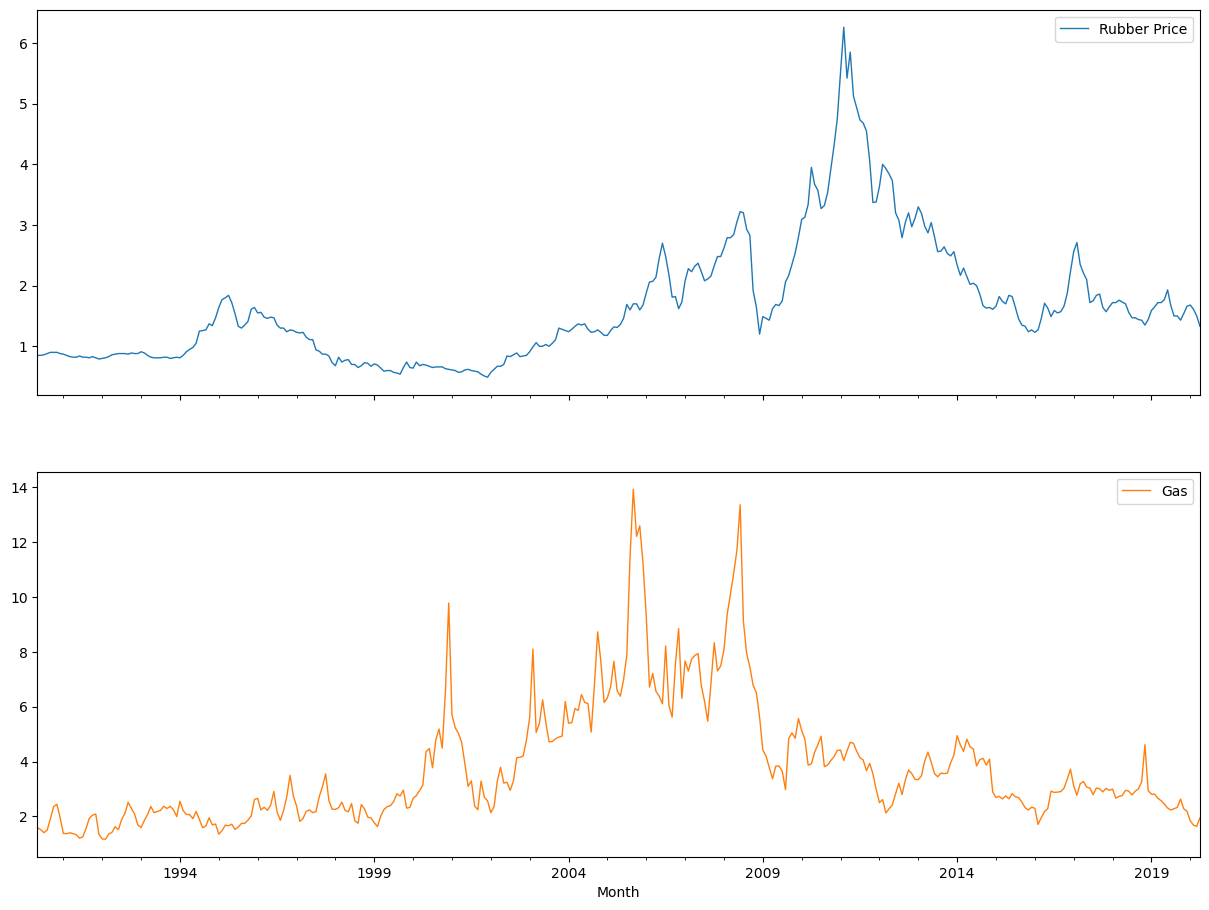

In [59]:
df[['Rubber Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

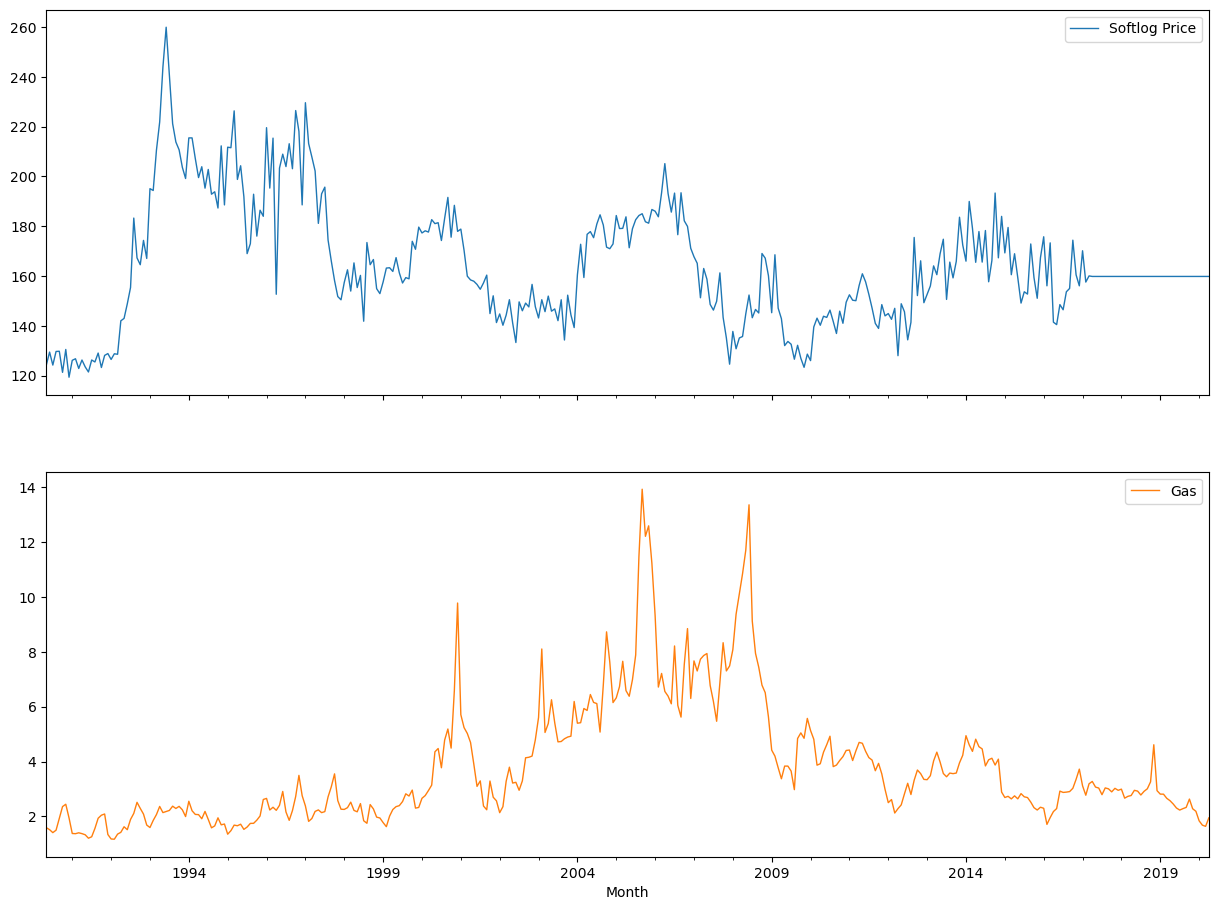

In [60]:
df[['Softlog Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

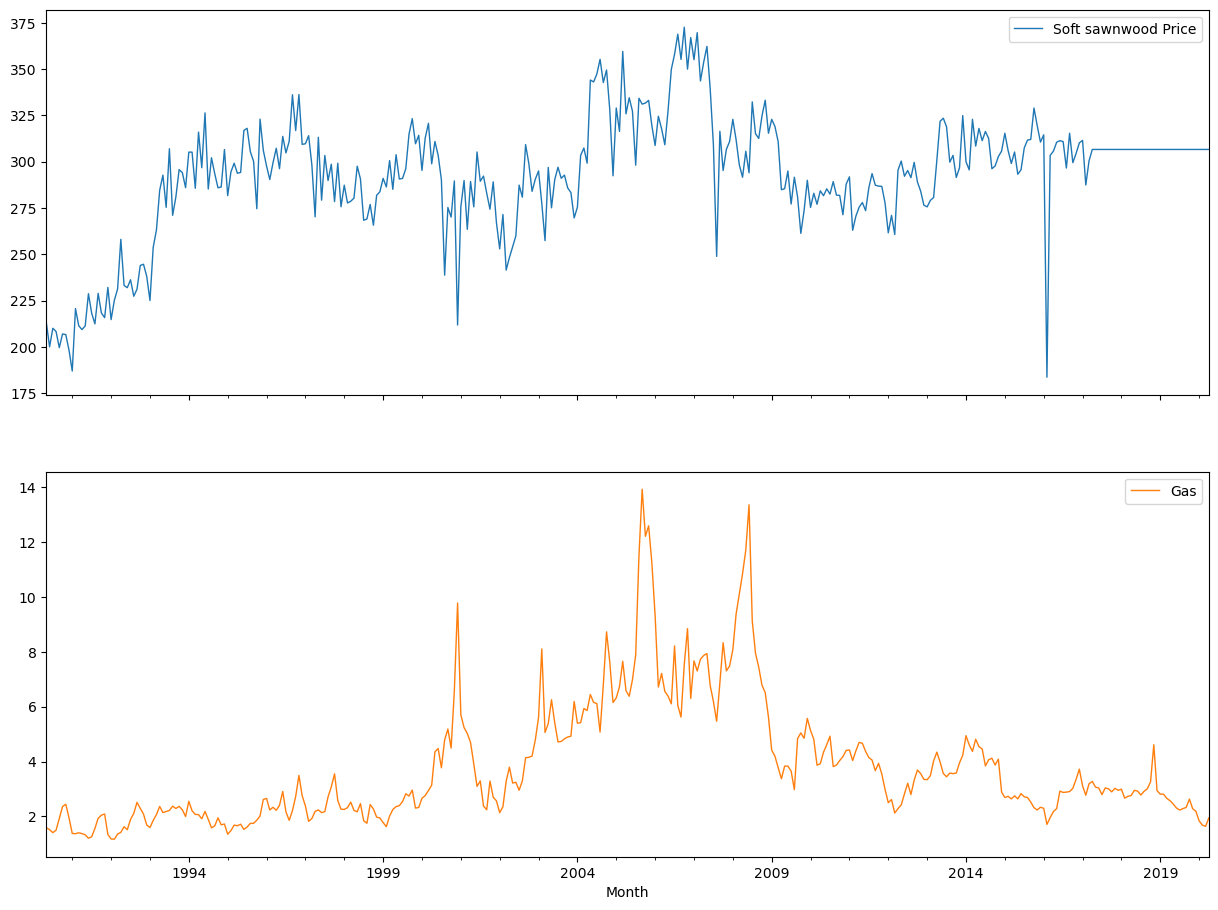

In [61]:
df[['Soft sawnwood Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

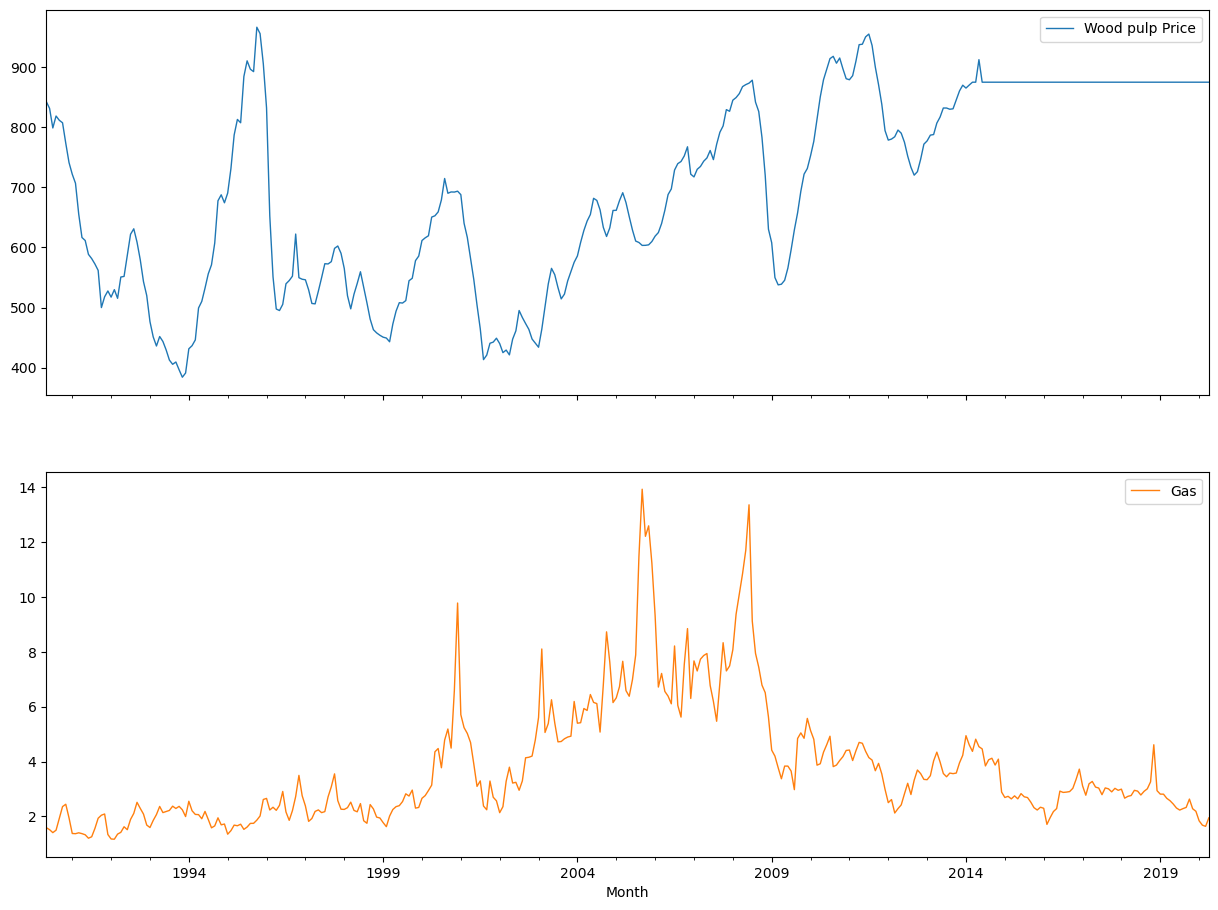

In [62]:
df[['Wood pulp Price', 'Gas']].plot(figsize=(15, 11), subplots=True, linewidth=1)

In [63]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

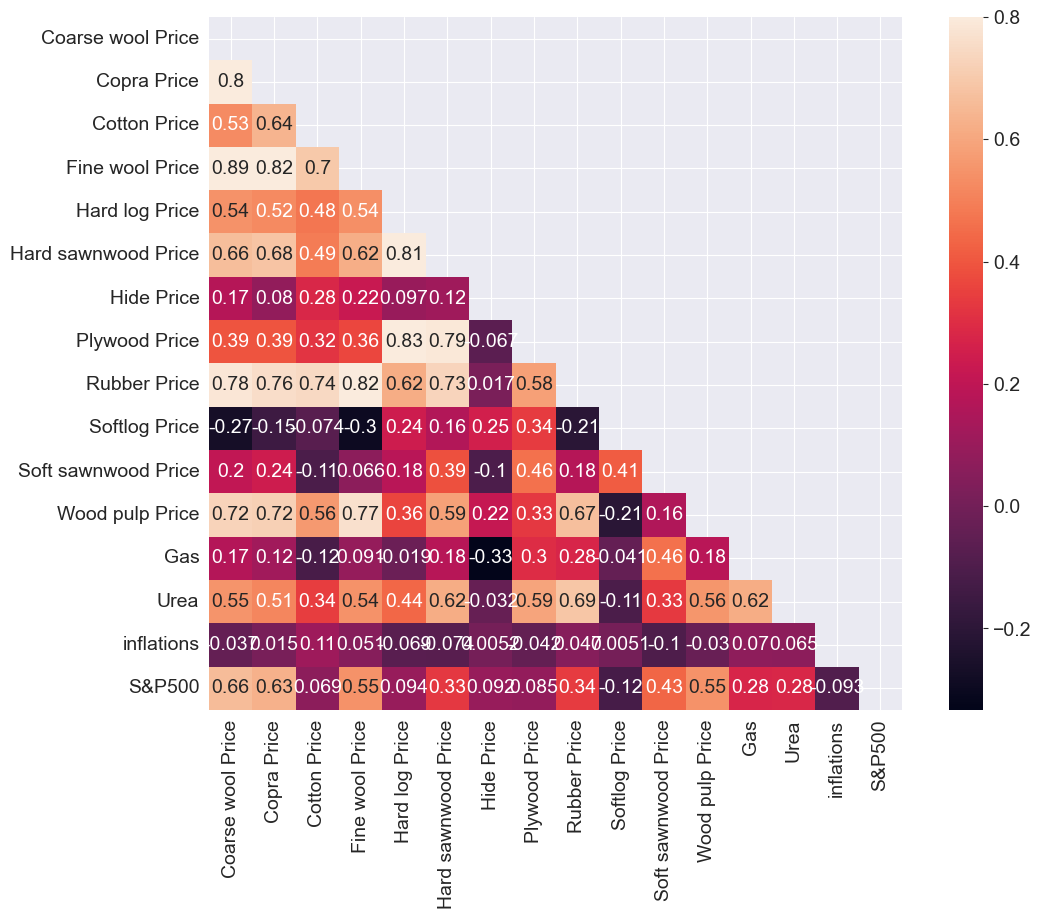

In [64]:
#raw-materials list
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price', 'Gas', 'Urea', 'inflations', 'S&P500']
#getting the correlation matrix
corrmat = df_droped_na[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (12, 9))
#masking the upper traingle part since matrix is symmetric(repetitive) 
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

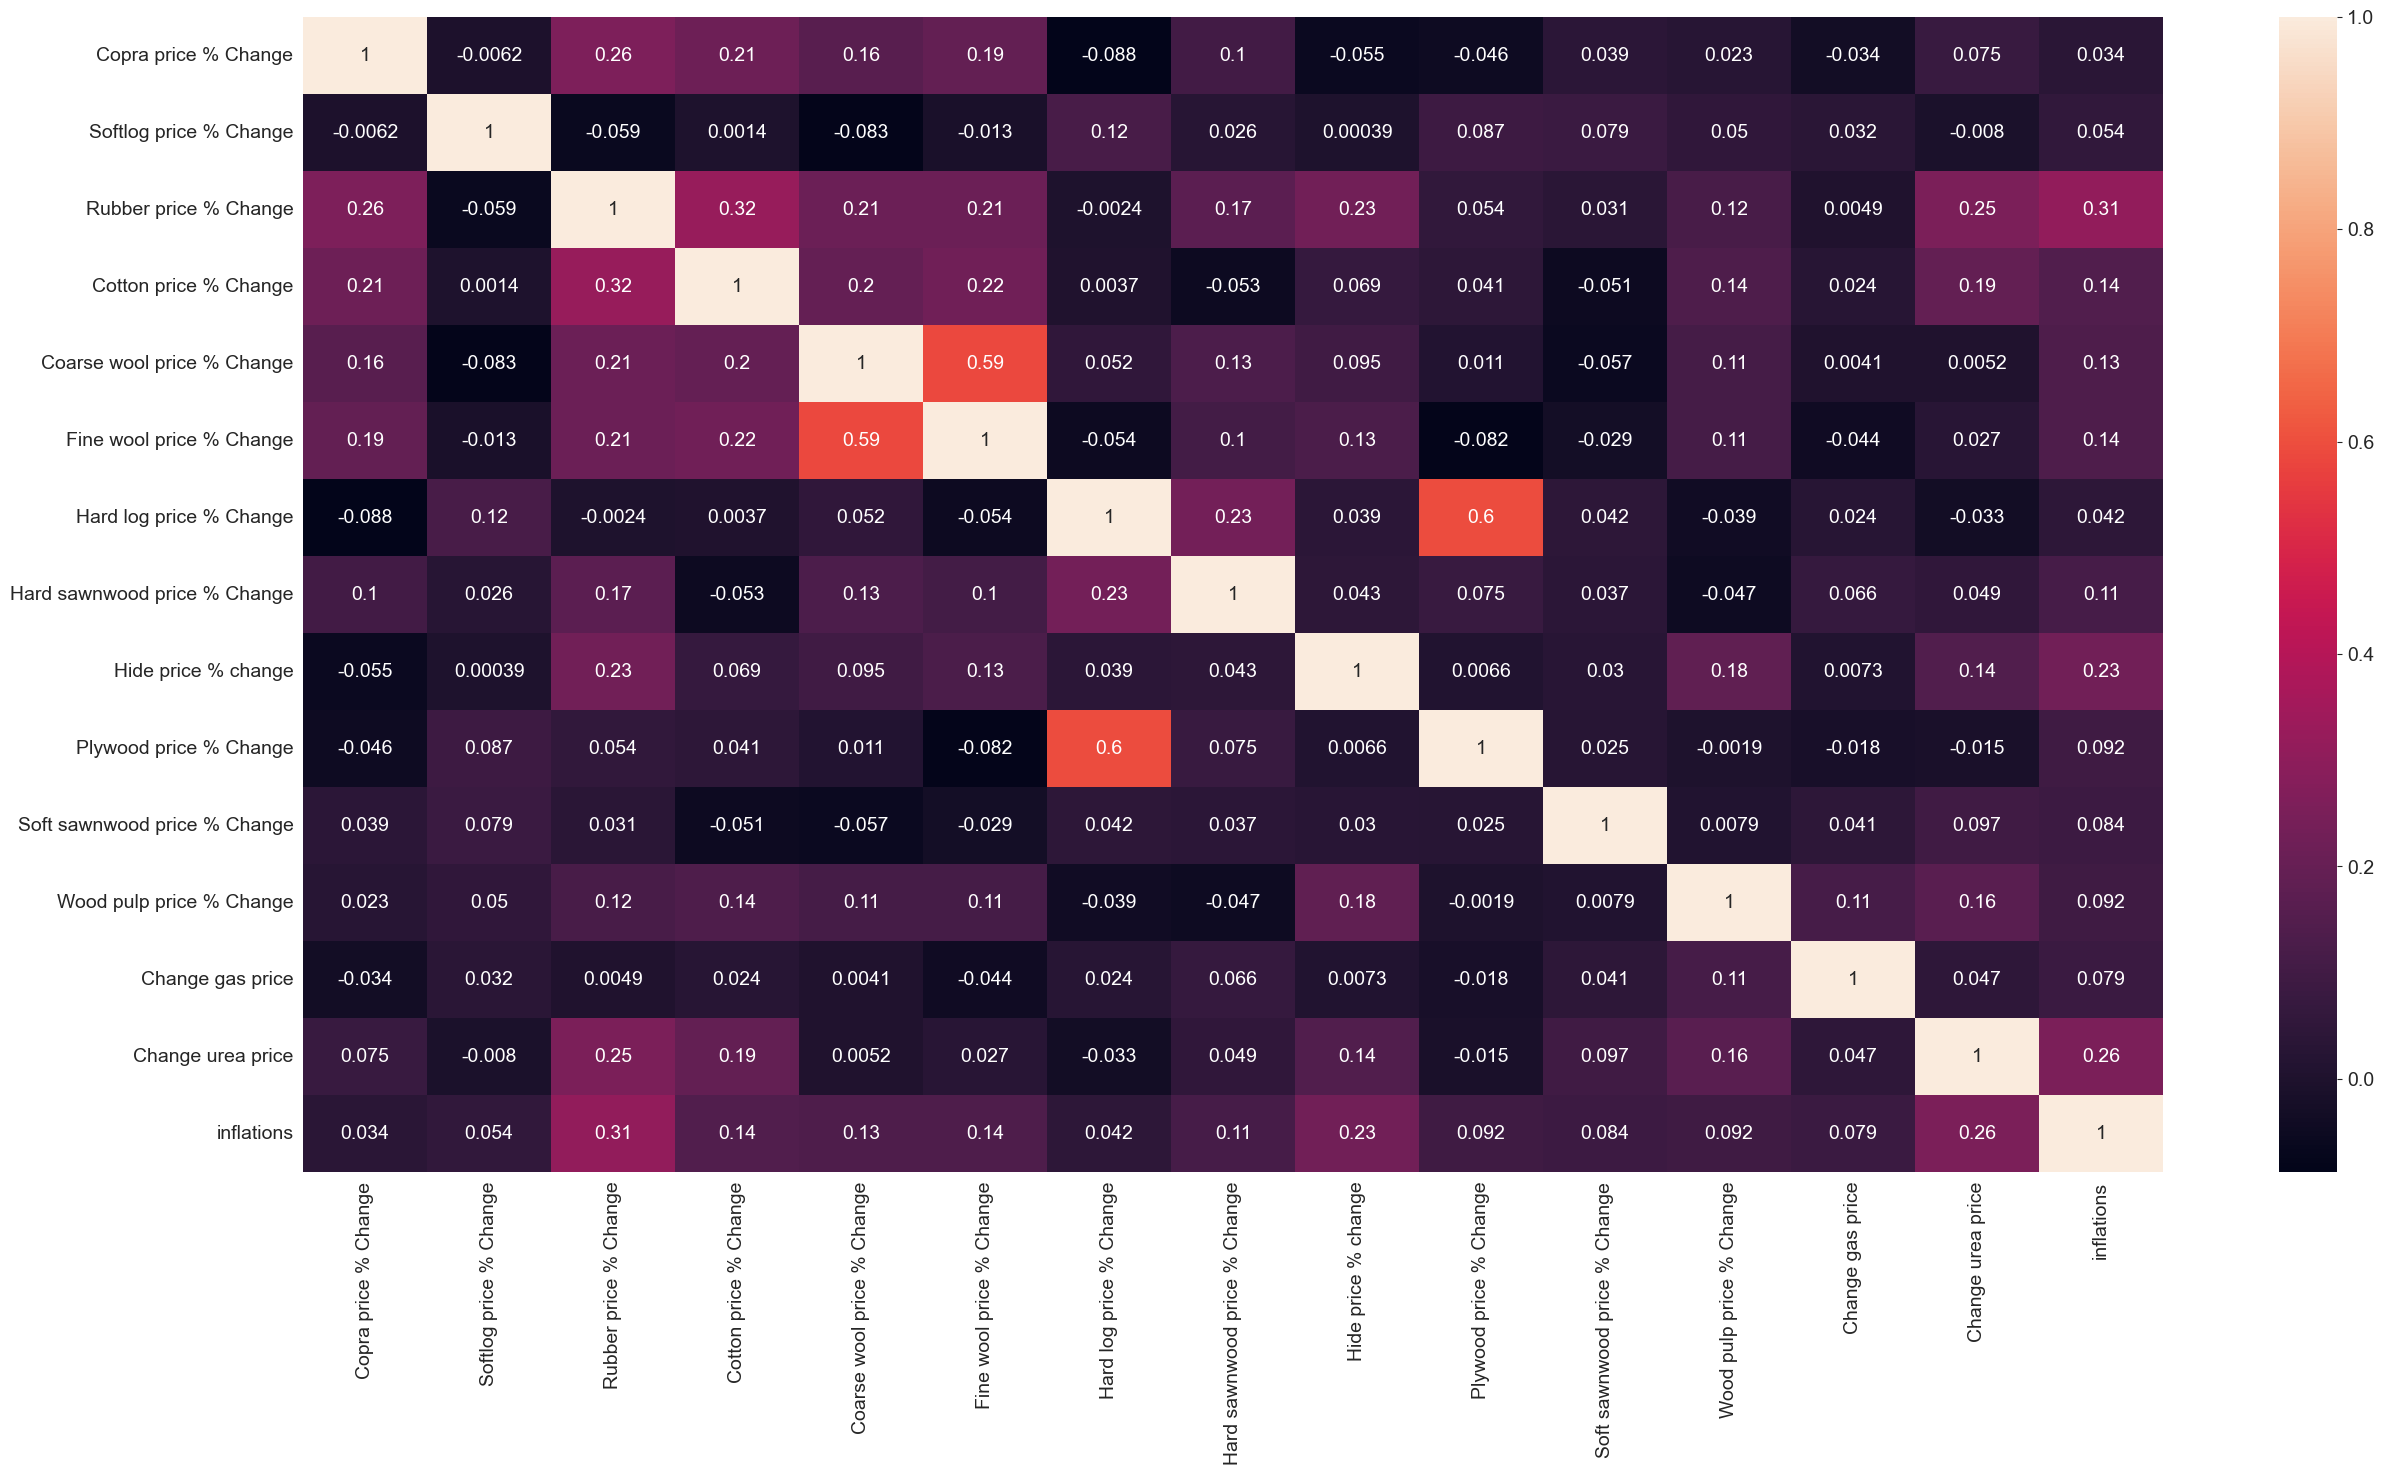

In [65]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change', 'Change gas price', 'Change urea price', 'inflations']
#generate a correlation matrix for the whole dataset
corrMatrix = df_droped_na[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

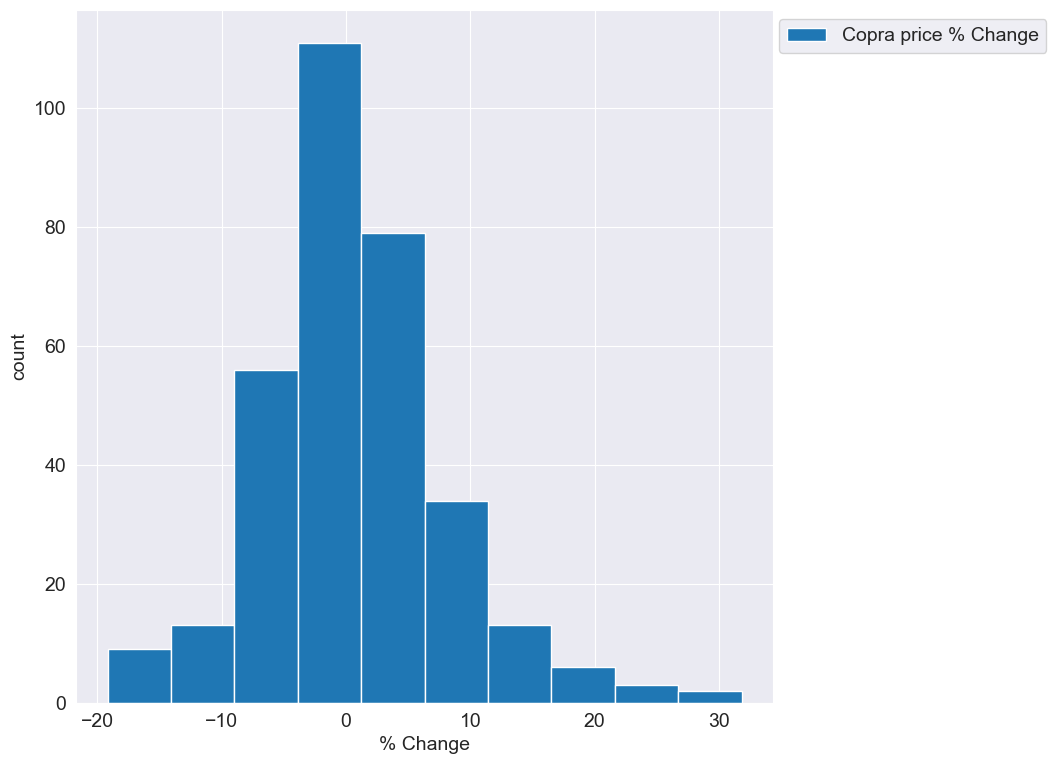

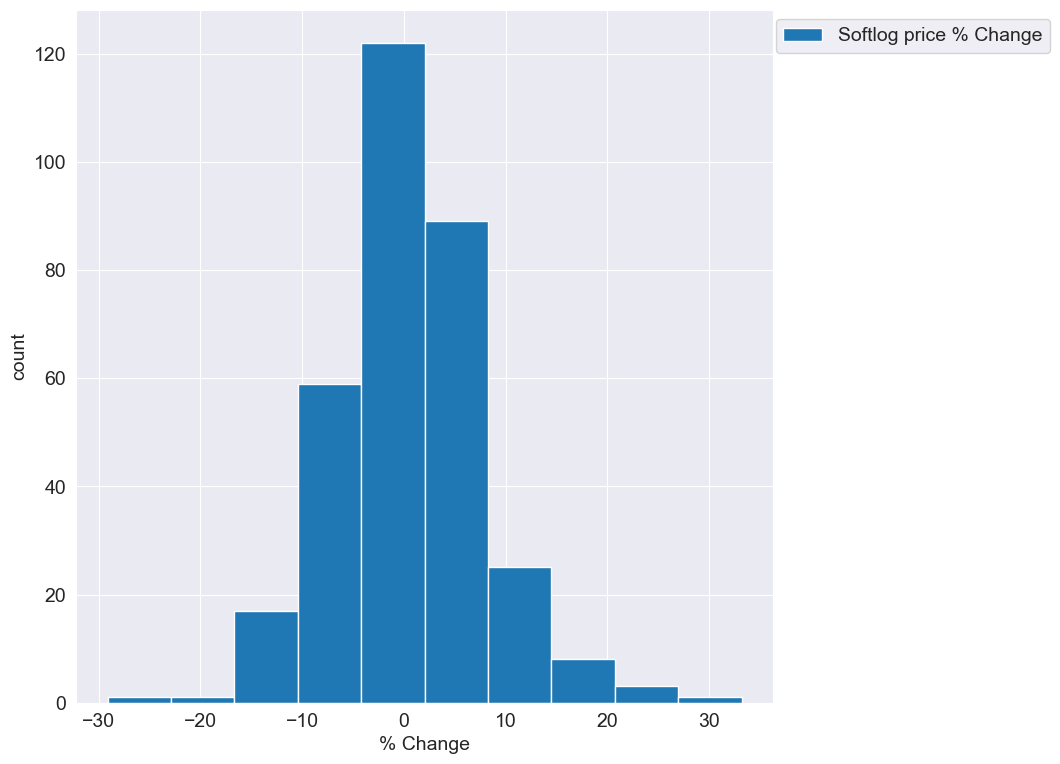

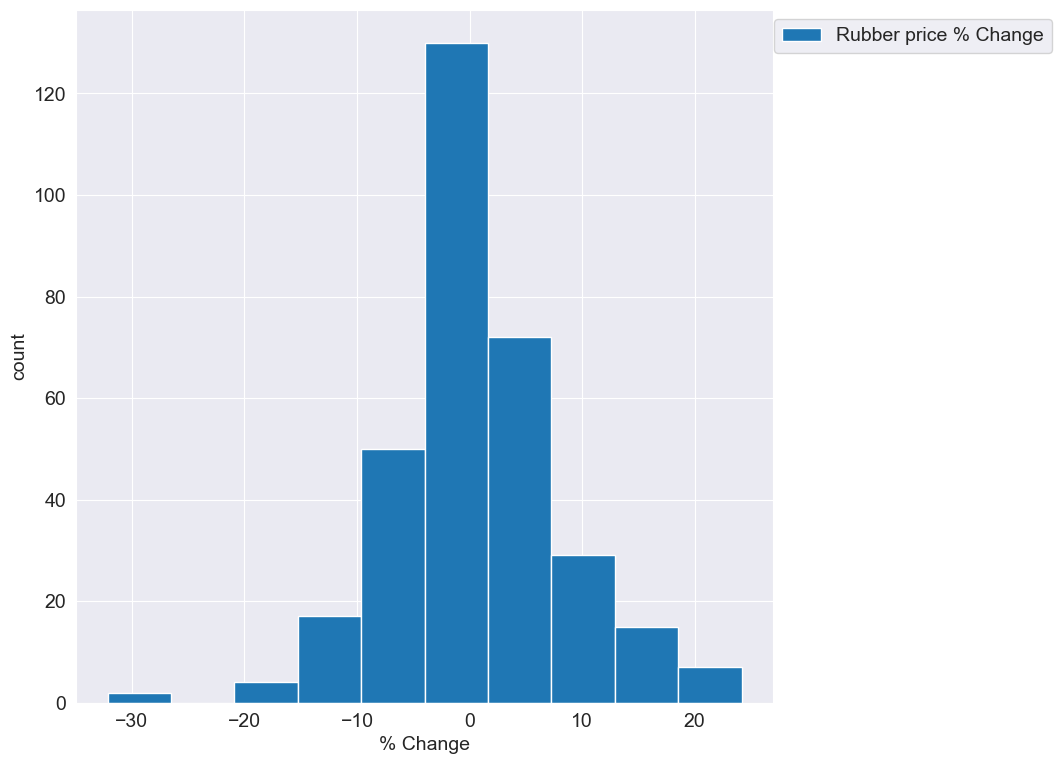

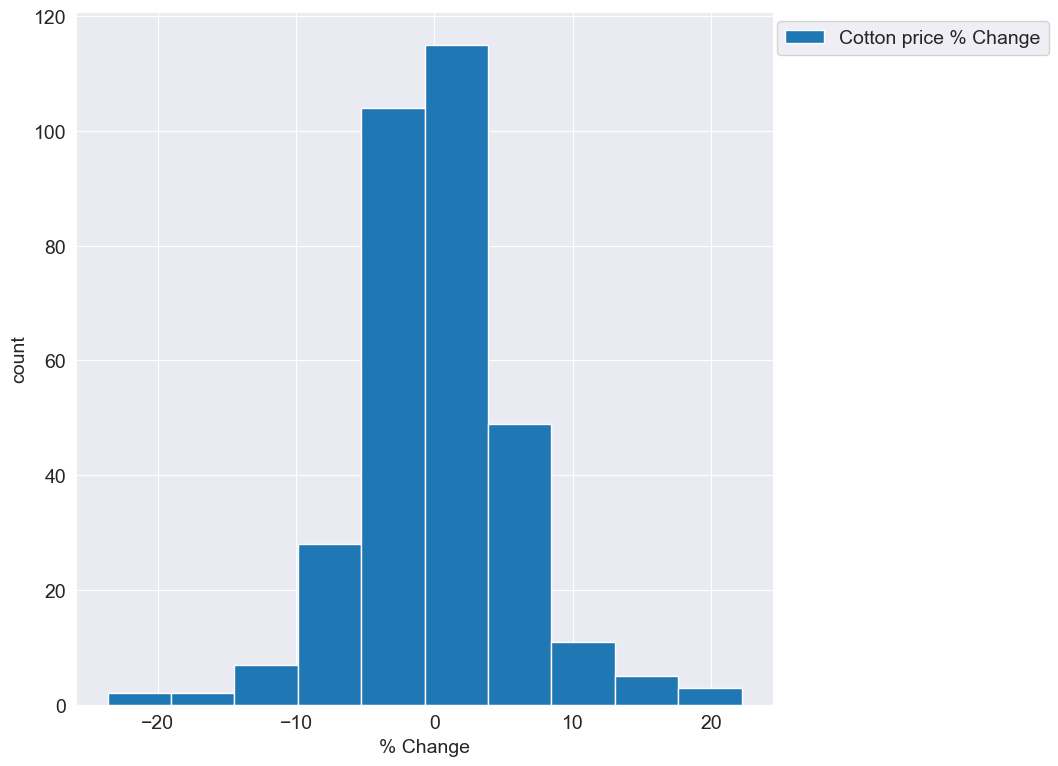

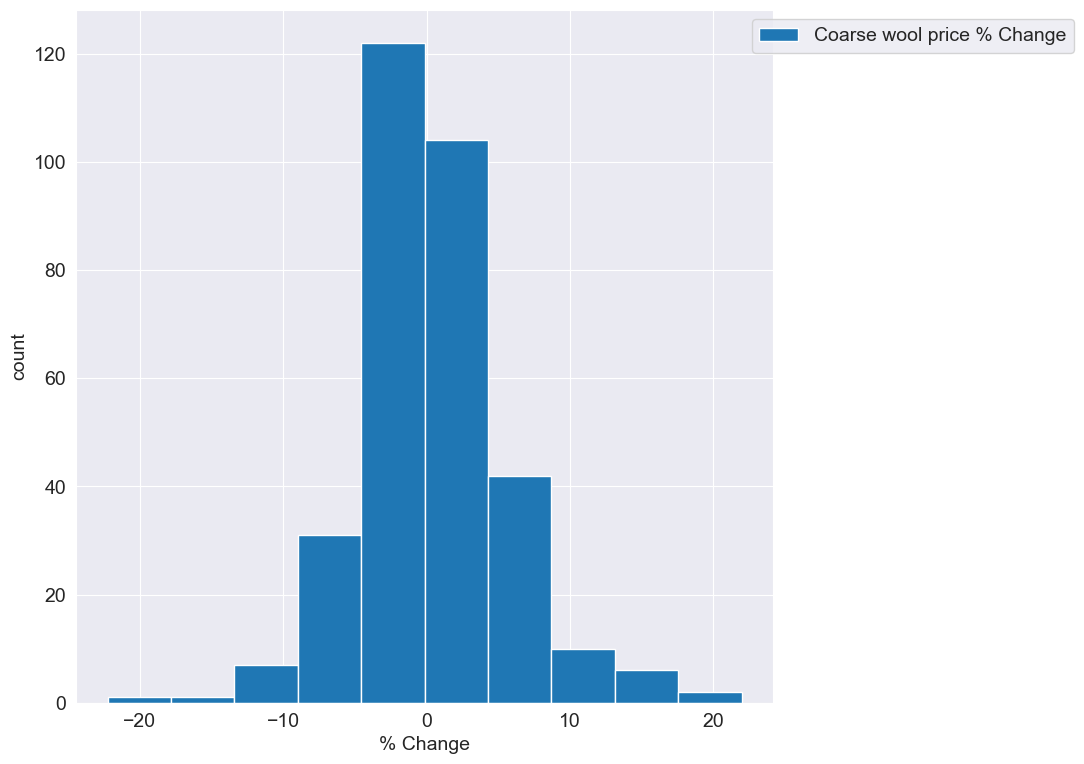

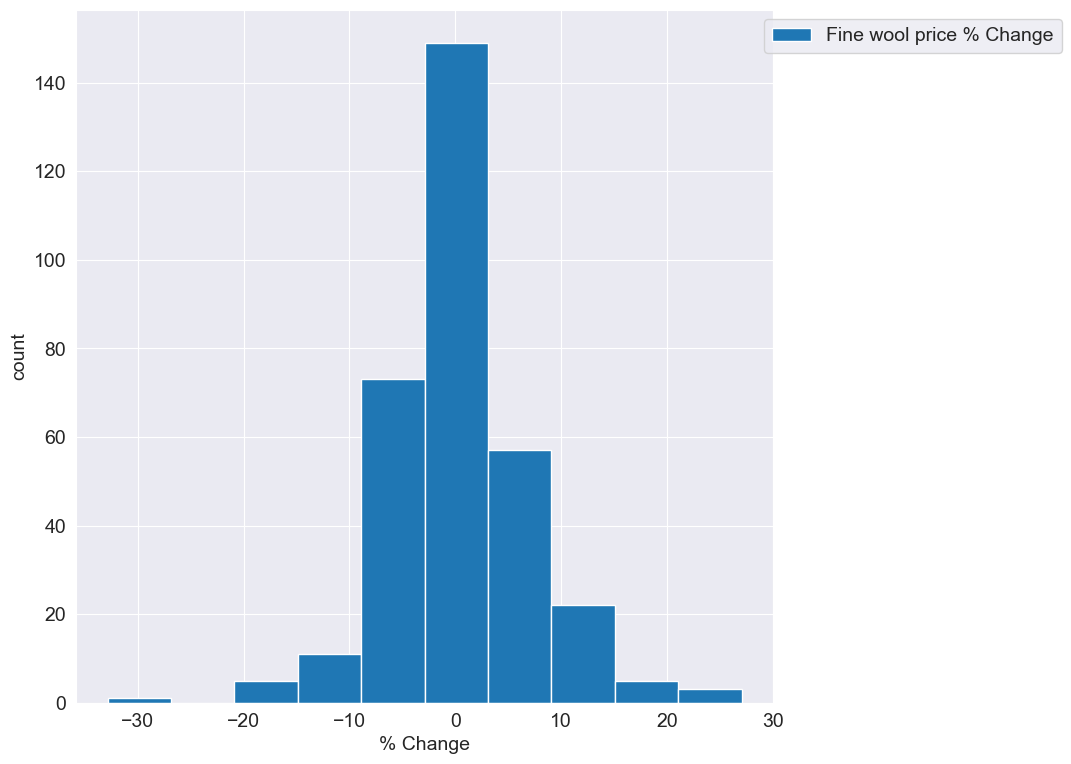

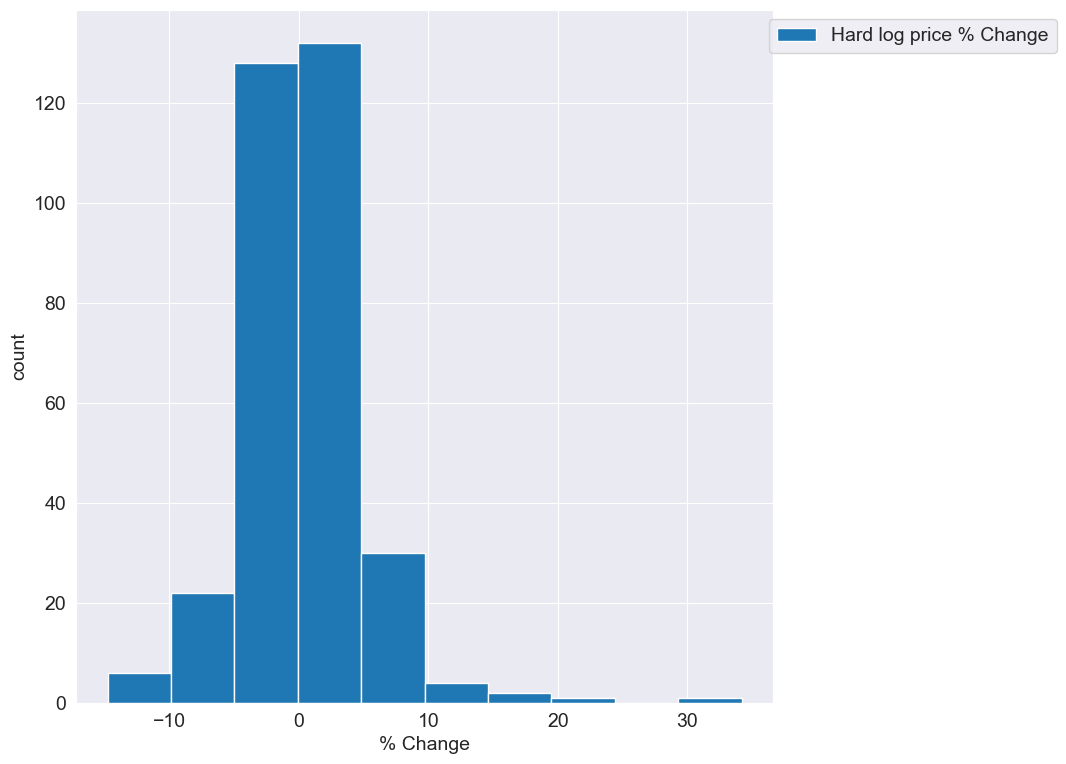

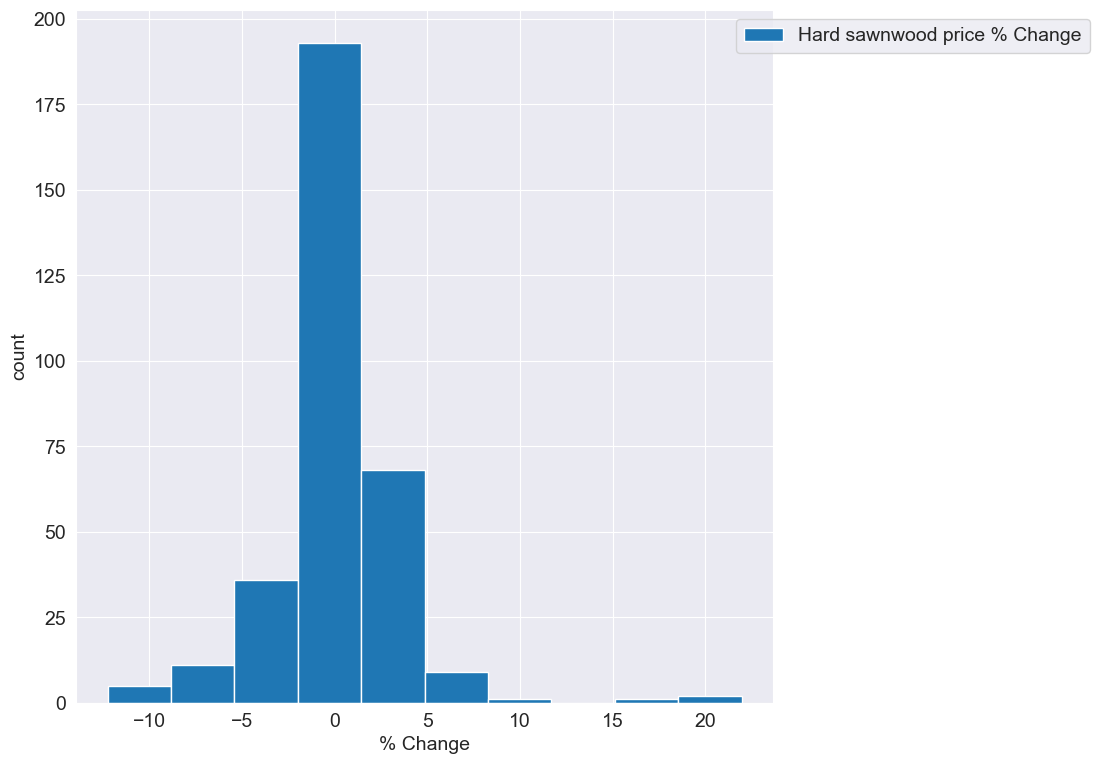

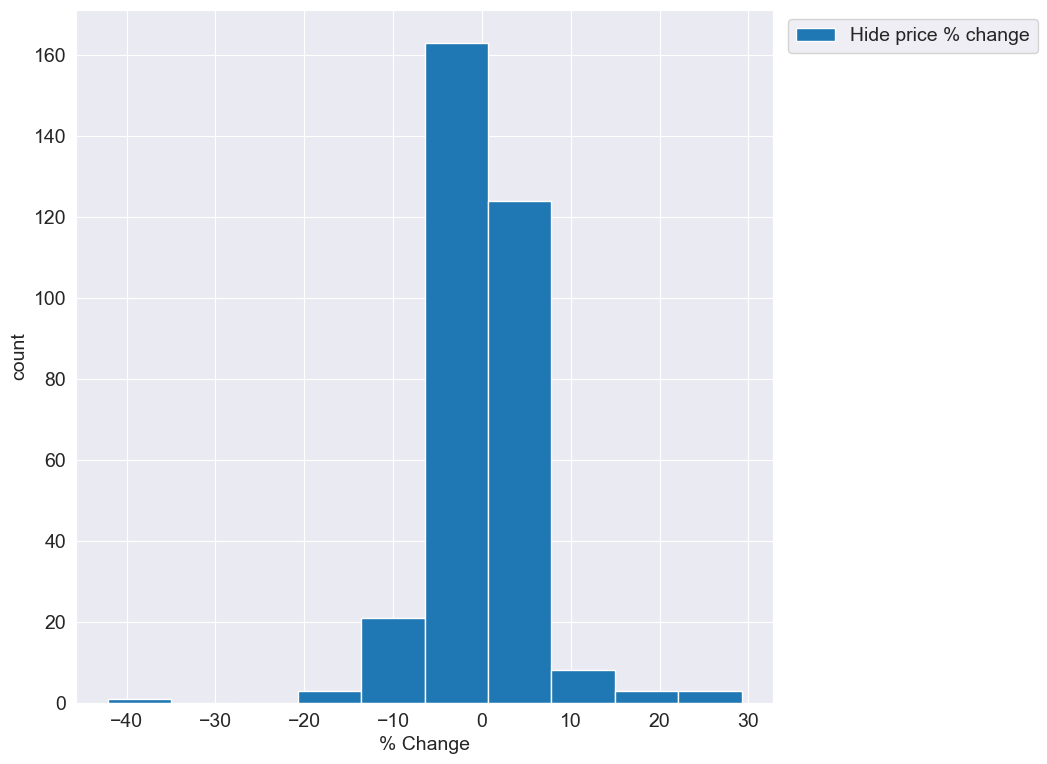

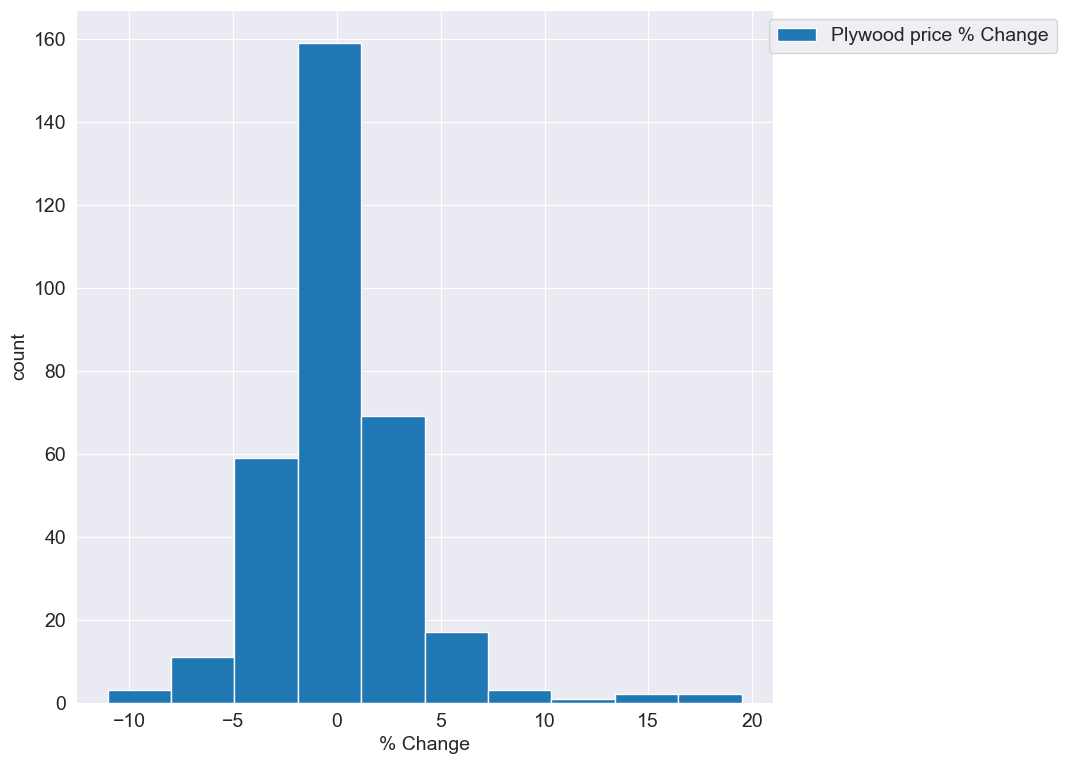

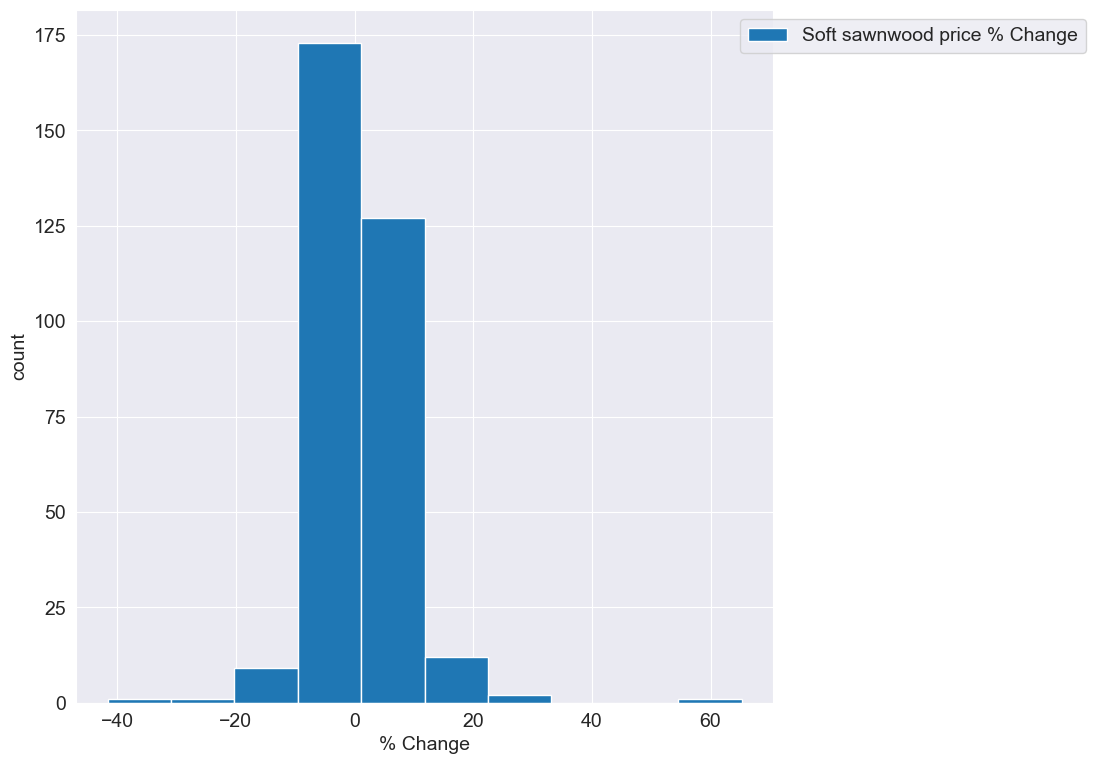

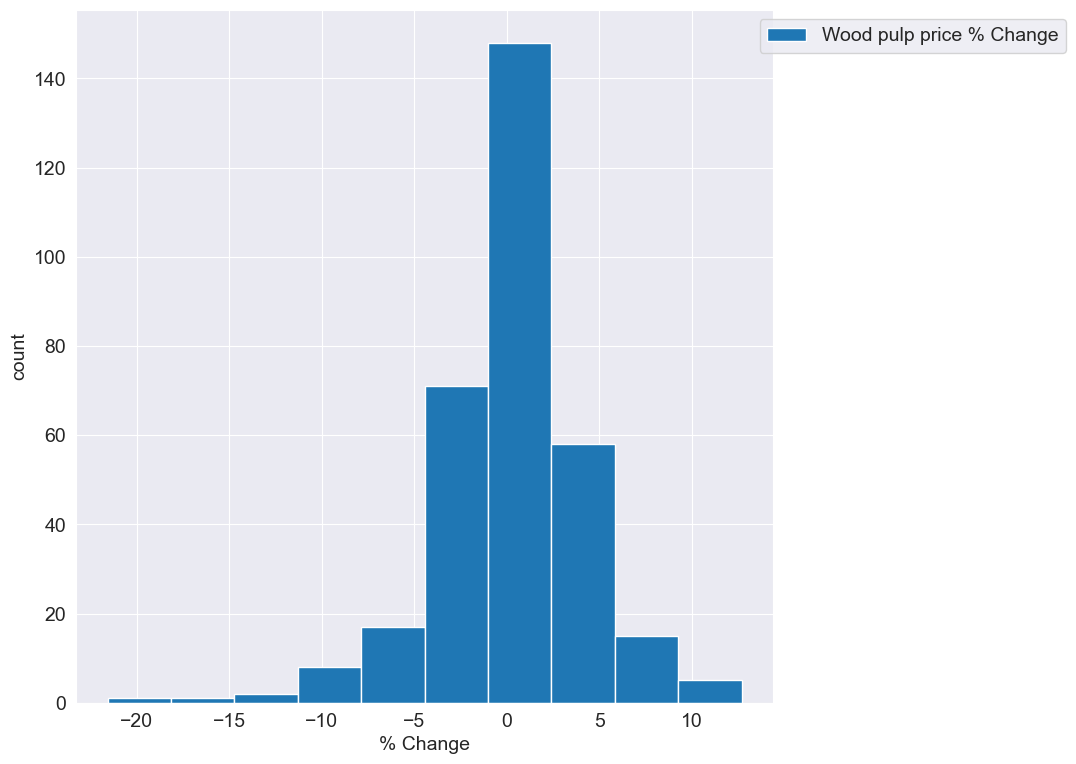

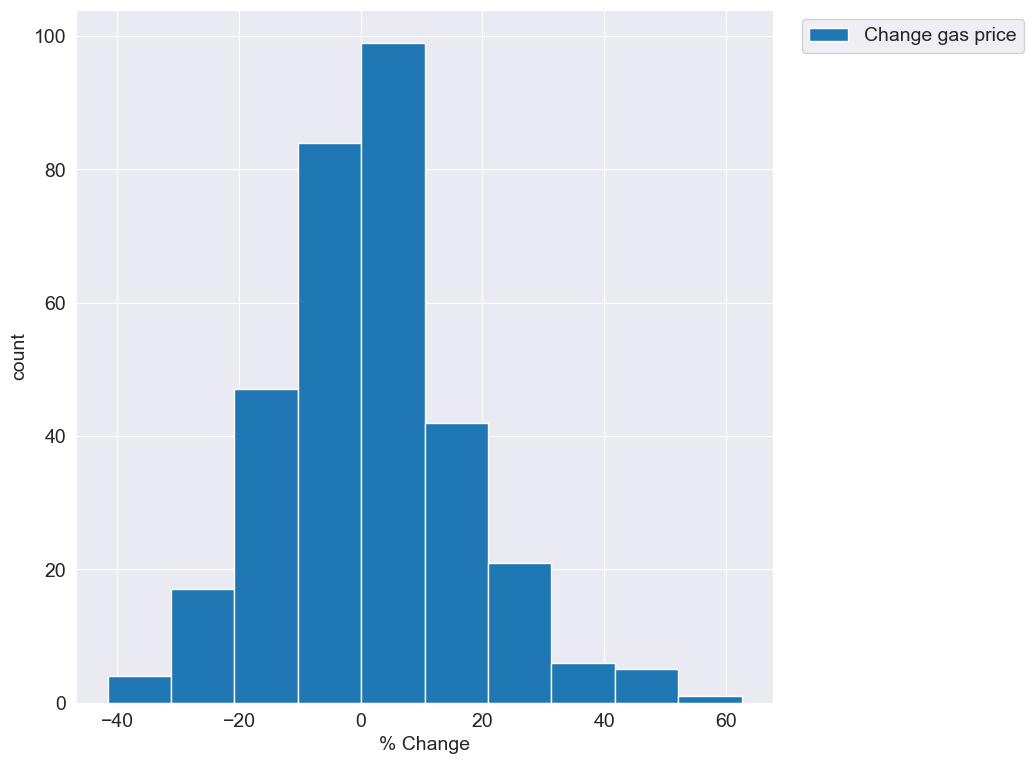

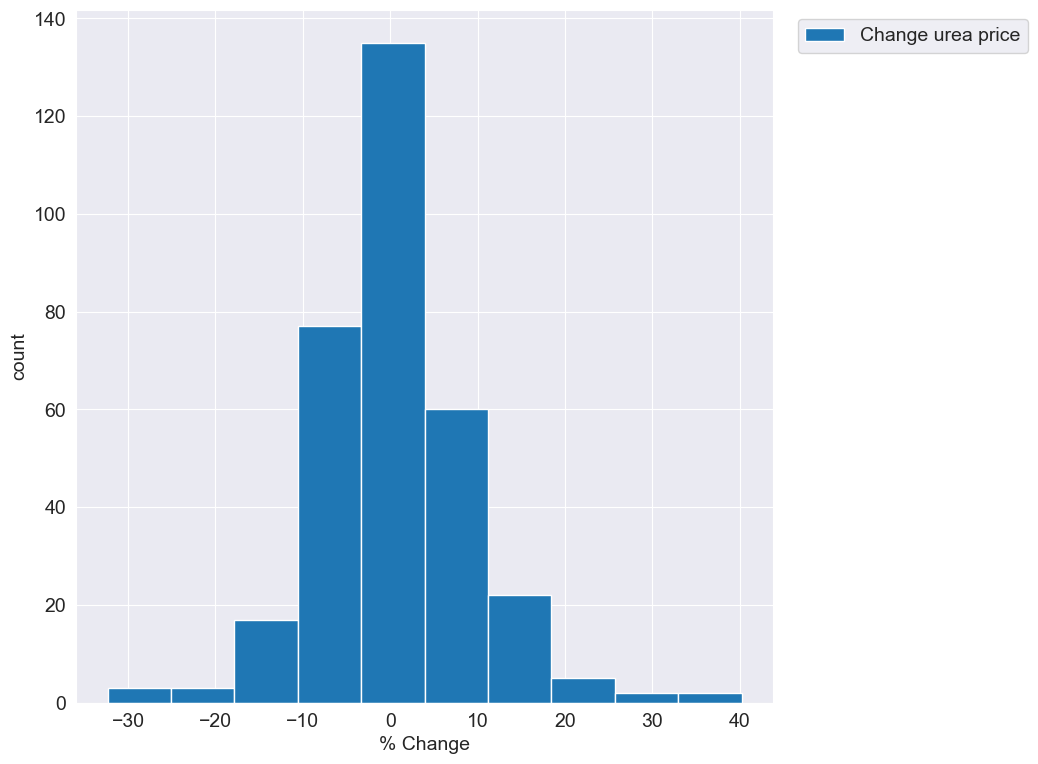

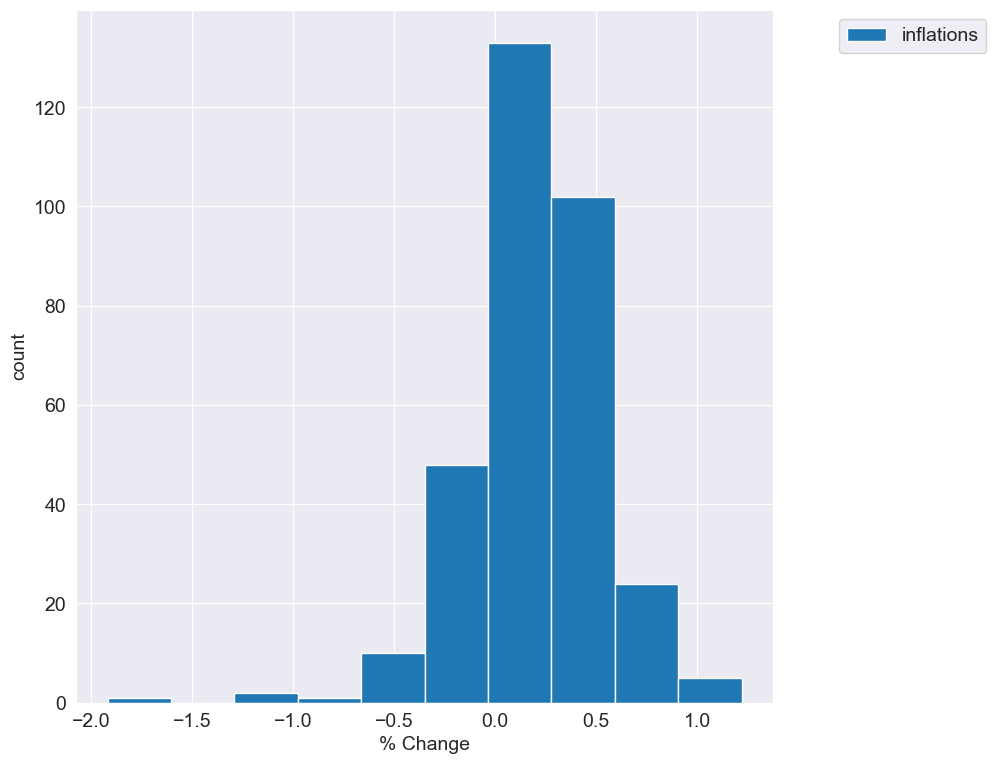

In [66]:
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change', 'Change gas price', 'Change urea price', 'inflations']
for i in range(len(changelist)):
    plt.figure(figsize=(9,9))
    df_droped_na[changelist[i]].hist(figsize=(9, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center', bbox_to_anchor=(1.2,1))

## Q2

Text(0.5, 0.98, 'Raw-Materials price comparision')

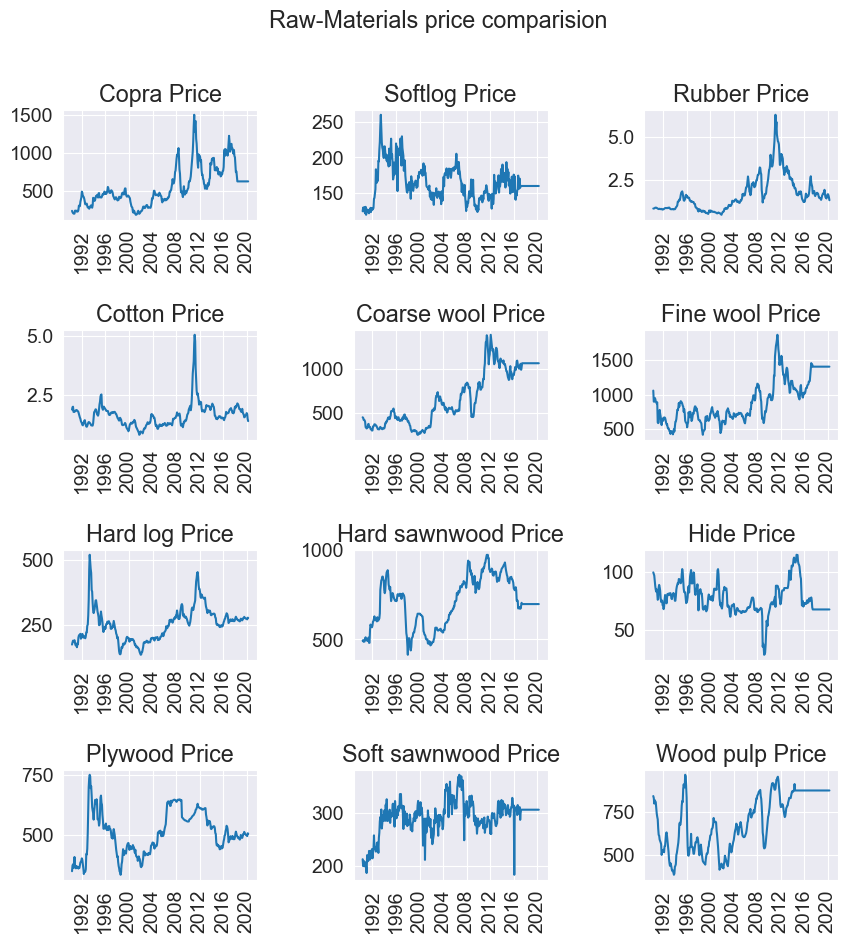

In [67]:
plt.figure(figsize=(10, 10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")

In [68]:
rubber_price_mean = df['Rubber Price'].mean()
rubber_price_mean

1.6586944444444445

In [69]:
rubber_price_median = df['Rubber Price'].median()
rubber_price_median

1.4449999999999998

In [70]:
cotton_price_mean = df['Cotton Price'].mean()
cotton_price_mean

1.6394722222222222

In [71]:
cotton_price_median = df['Cotton Price'].median()
cotton_price_median

1.6

## Q3

In [72]:
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change', 'Change gas price', 'Change urea price', 'inflations']

for i in range(len(changelist)):
    print('min', i, df_droped_na[changelist[i]].min())
    print('max', i, df_droped_na[changelist[i]].max())

min 0 -19.17
max 0 31.82
min 1 -29.12
max 1 33.21
min 2 -32.16
max 2 24.17
min 3 -23.64
max 3 22.22
min 4 -22.25
max 4 21.99
min 5 -32.84
max 5 27.07
min 6 -14.76
max 6 34.19
min 7 -12.24
max 7 21.96
min 8 -42.14
max 8 29.24
min 9 -11.05
max 9 19.5
min 10 -41.62
max 10 65.24
min 11 -21.57
max 11 12.69
min 12 -41.62
max 12 62.61
min 13 -32.34
max 13 40.21
min 14 -1.92
max 14 1.22


In [73]:
print('min', changelist[8], 'max', changelist[10])

min Hide price % change max Soft sawnwood price % Change


## Q4

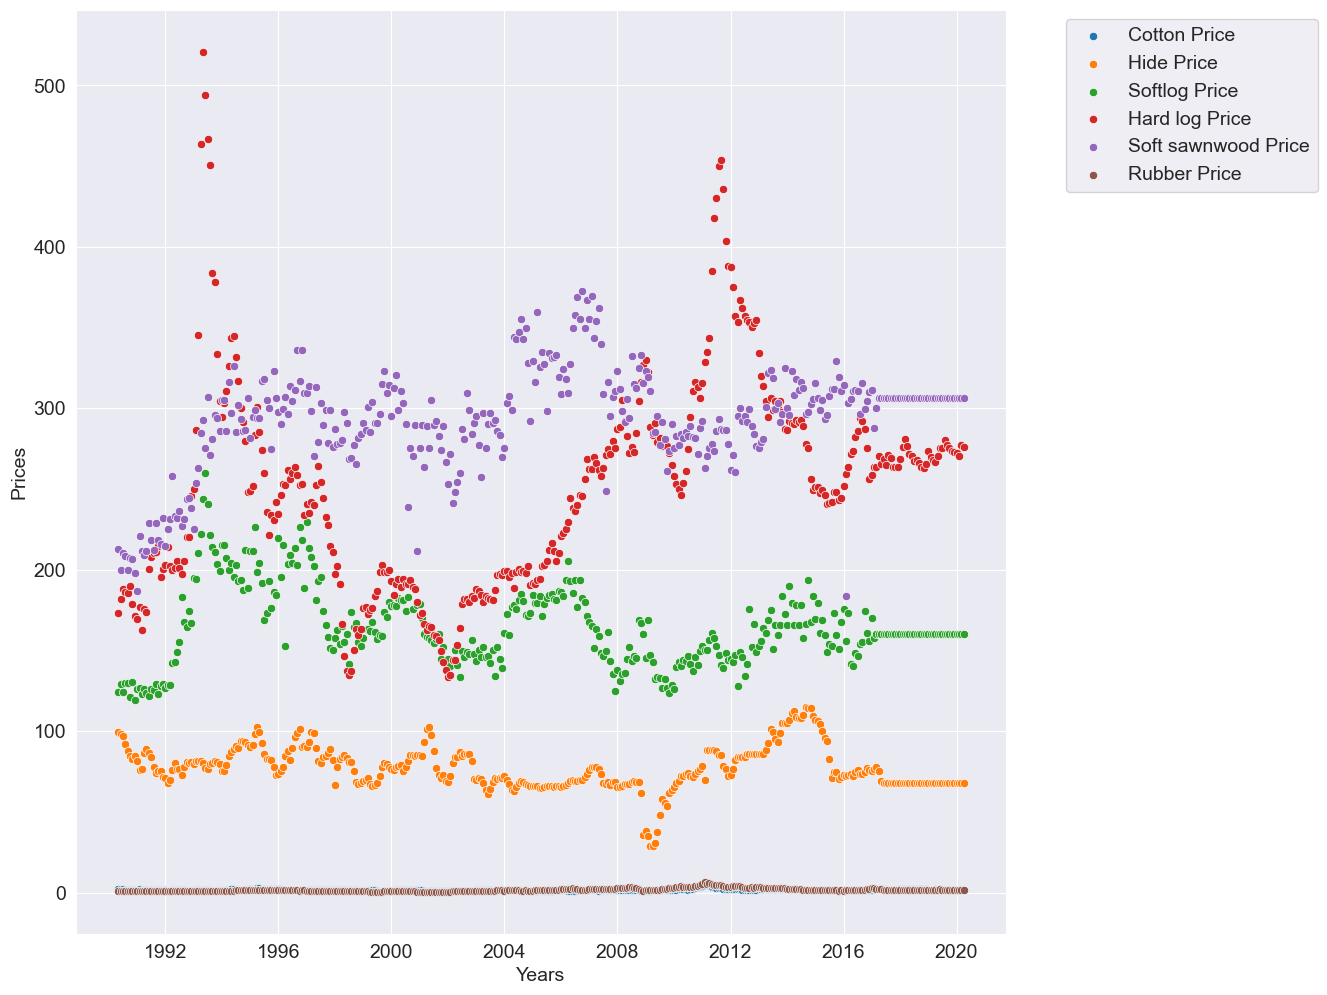

In [74]:
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]], x=df.index);
    plt.legend(lowlist,loc='upper center', bbox_to_anchor=(1.2, 1))

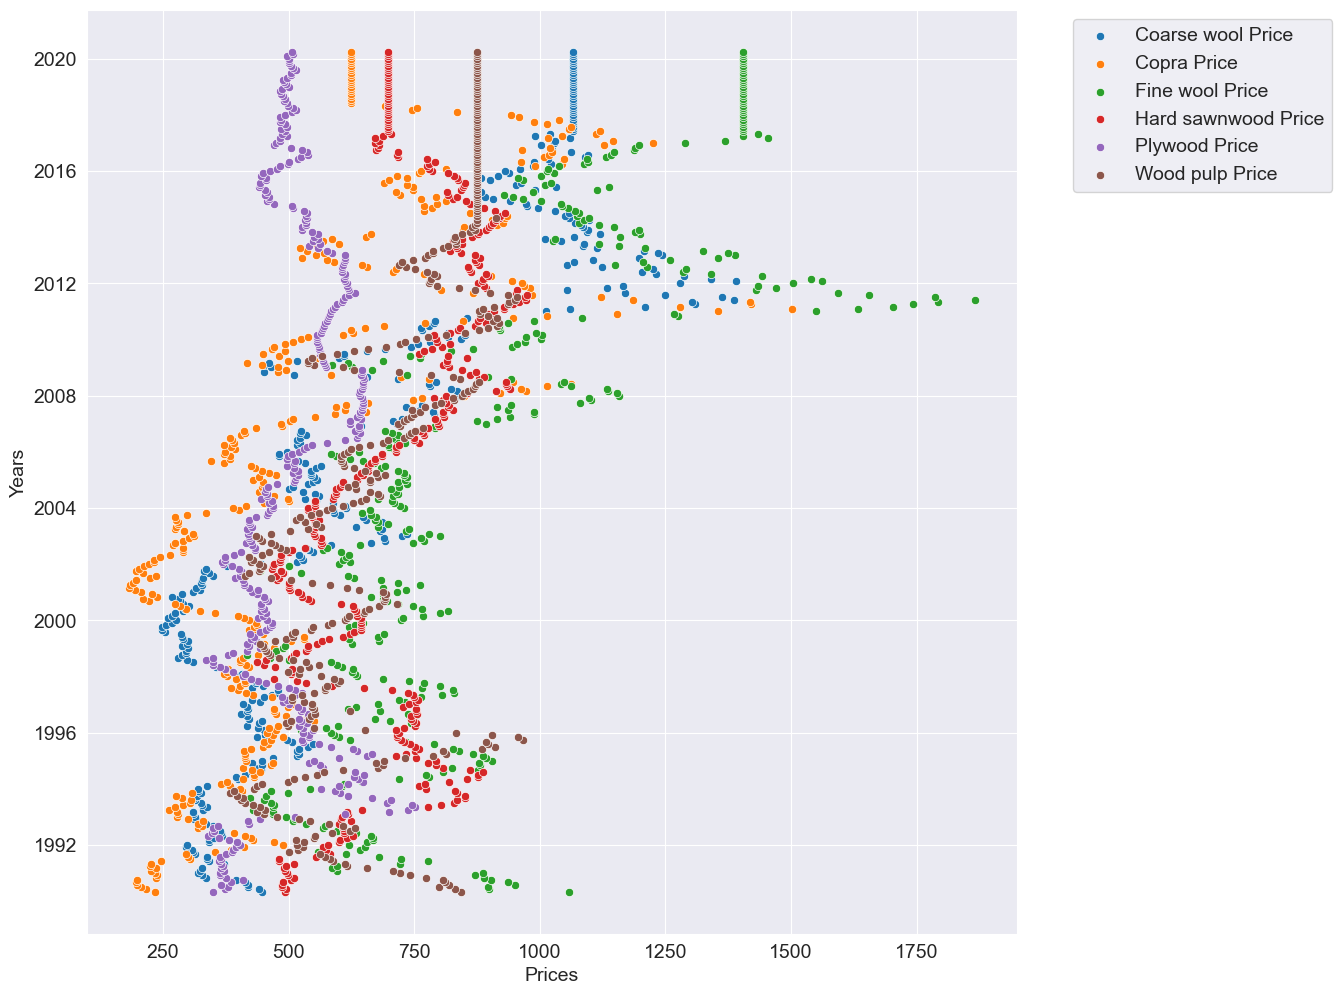

In [75]:
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]], y=df.index);
    plt.legend(highlist,loc='upper center', bbox_to_anchor=(1.2, 1))

In [76]:
diff_df = df_droped_na.diff().abs().dropna()
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']

for i in range(len(materialslist)):
    print(i, diff_df[materialslist[i]].max())

0 233.0
1 62.72999999999999
2 0.9100000000000001
3 1.1300000000000003
4 148.52999999999997
5 291.39
6 118.07000000000005
7 131.21000000000004
8 25.93
9 99.81
10 130.88
11 179.57000000000005


In [77]:
print(materialslist[5])

Fine wool Price


## Q5

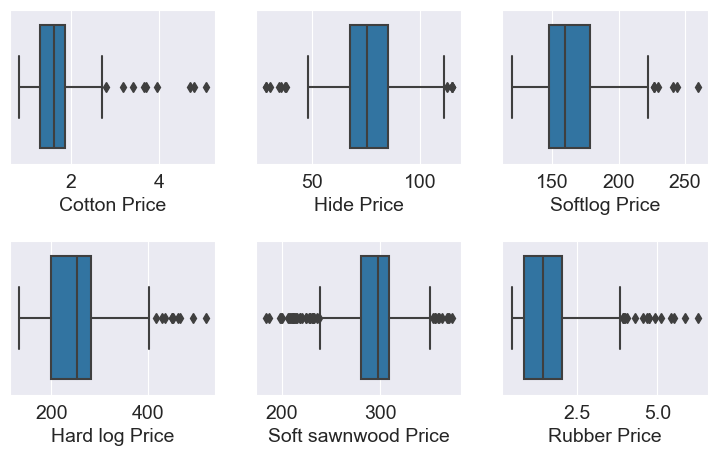

In [78]:
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

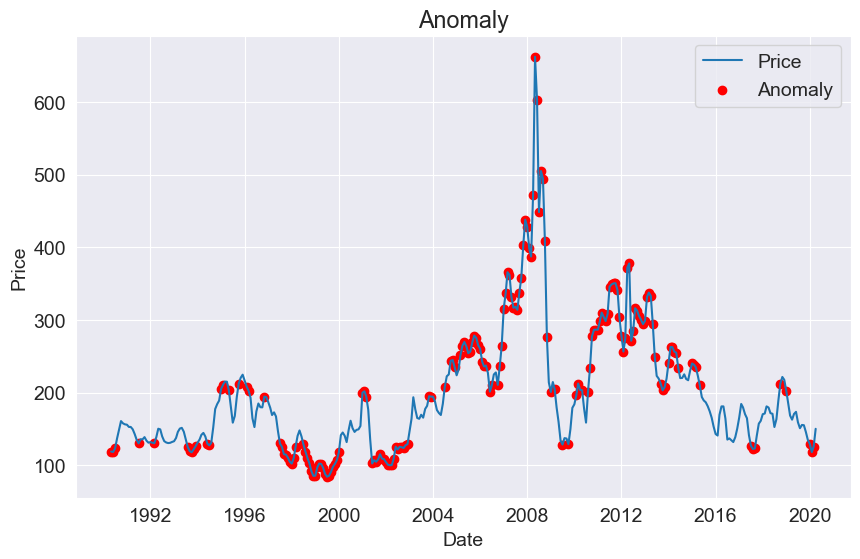

In [79]:
from sklearn.svm import OneClassSVM

time_series = df['Urea']

model = OneClassSVM()
model.fit(time_series.values.reshape(-1, 1))

anomaly_scores = model.decision_function(time_series.values.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Price')

anomalies = time_series[anomaly_scores < 0]
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomaly')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Anomaly')
plt.legend()
plt.show()

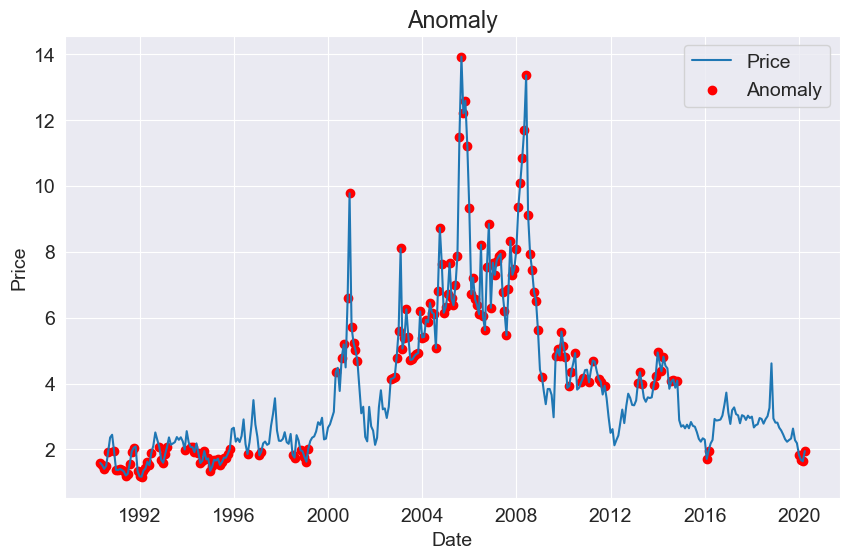

In [80]:
time_series = df['Gas']

model = OneClassSVM()
model.fit(time_series.values.reshape(-1, 1))

anomaly_scores = model.decision_function(time_series.values.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Price')

anomalies = time_series[anomaly_scores < 0]
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomaly')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Anomaly')
plt.legend()
plt.show()

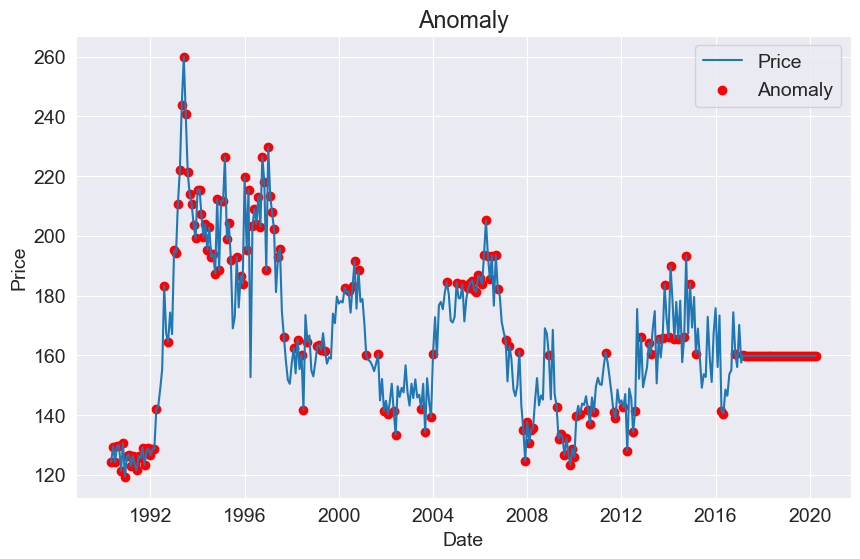

In [81]:
time_series = df['Softlog Price']

model = OneClassSVM()
model.fit(time_series.values.reshape(-1, 1))

anomaly_scores = model.decision_function(time_series.values.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Price')

anomalies = time_series[anomaly_scores < 0]
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomaly')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Anomaly')
plt.legend()
plt.show()

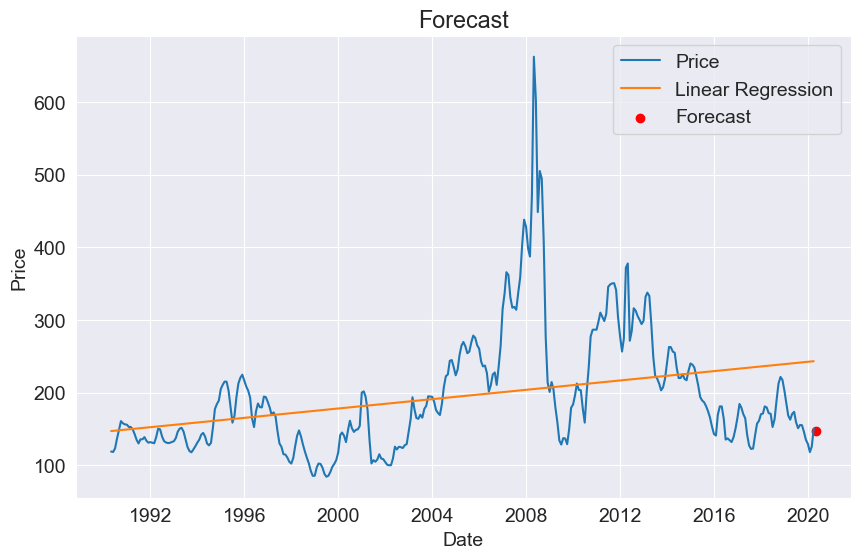

147.2496398754413


In [82]:
from sklearn.linear_model import LinearRegression

time_series = df['Urea']

X = np.arange(len(time_series)).reshape(-1, 1)
y = time_series.values

model = LinearRegression()
model.fit(X, y)

predict_date = '2020-05-01'
predict_date = pd.to_datetime(predict_date)
predict_date_num = (predict_date - df.index[0]).days

predicted_price = model.predict([[1]])

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Price')
plt.plot(df.index, model.predict(X), label='Linear Regression')
plt.scatter(predict_date, predicted_price, color='red', label='Forecast')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Forecast')
plt.legend()
plt.show()

print(predicted_price[0])